# Quantum Key Distribution (QKD)

## Quantum Key Distribution (QKD):

Quantum Key Distribution (QKD) is a quantum communication protocol that enables two parties to produce a shared random secret key, which can then be used for secure communication. QKD relies on the principles of quantum mechanics to achieve information-theoretic security, making it resistant to computational attacks, including those leveraging quantum computers. The two main QKD protocols are the Bennett-Brassard 1984 (BB84) protocol and the E91 protocol.

### Key Concepts:

1. **Quantum States:**
   - QKD uses quantum states to encode information. Common quantum states include the polarization states of photons, such as horizontal (H) and vertical (V) polarizations.

2. **Quantum Measurement:**
   - The recipient uses a quantum measurement to determine the state of the received quantum particles. For example, in the case of photons, this measurement is typically performed using polarizing filters.

3. **Quantum Entanglement (E91 Protocol):**
   - In the E91 protocol, entangled particles are used to establish a shared secret key. Measurement outcomes on entangled particles are correlated, providing a secure key distribution mechanism.

4. **Bell's Inequality:**
   - Bell's inequality is a test to distinguish between classical and quantum correlations. Violation of Bell's inequality confirms the presence of quantum correlations and is used in the E91 protocol.

### Bennett-Brassard 1984 (BB84) Protocol:

1. **Quantum States Generation:**
   - Alice prepares a sequence of quantum states (photons) in one of four possible states: \(\{|0\rangle, |1\rangle, |+\rangle, |-\rangle\}\), where \(|+\rangle\) and \(-\rangle\) are superpositions.

2. **Quantum Transmission:**
   - Alice sends the prepared states to Bob over a quantum channel.

3. **Basis Choice:**
   - Bob randomly chooses a basis (e.g., rectilinear basis for \(\{|0\rangle, |1\rangle\}\) or diagonal basis for \(\{|+\rangle, |-\rangle\}\)) to measure the received states.

4. **Quantum Measurement:**
   - Bob measures the states in the chosen basis.

5. **Error Checking:**
   - Alice and Bob publicly communicate a subset of their bases choices and check for discrepancies. If the bases match, the bits associated with those bases are retained for the key.

6. **Error Correction and Privacy Amplification:**
   - Classical error correction and privacy amplification are performed to obtain a final secret key.

### E91 Protocol (Entanglement-Based):

1. **Entangled Particle Generation:**
   - Alice generates pairs of entangled particles, such as photon pairs in an entangled state.

2. **Quantum Transmission:**
   - Alice sends one particle from each entangled pair to Bob.

3. **Bell Measurement:**
   - Bob performs a Bell measurement on his received particles, resulting in correlated outcomes.

4. **Error Checking:**
   - Alice and Bob publicly communicate a subset of their measurement outcomes and check for discrepancies. If the outcomes match, the bits associated with those outcomes are retained for the key.

5. **Error Correction and Privacy Amplification:**
   - Classical error correction and privacy amplification are performed to obtain a final secret key.

### Key Generation Rate:

The key generation rate (\(R\)) is a measure of the rate at which secret key bits are generated per time unit. It is defined as:

\[ R = \frac{K}{T} \]

where \(K\) is the number of bits in the final secret key and \(T\) is the time taken for the QKD protocol.

### Security Parameter:

The security of QKD is quantified by the security parameter (\(\epsilon\)), which is a measure of the probability that an adversary could gain knowledge of the secret key. The security parameter is typically a very small number, indicating a low probability of compromise.

\[ \epsilon \approx \frac{1}{2^{\text{{Key Length}}}} \]

This implies that as the key length increases, the security parameter decreases exponentially.

These equations and concepts provide a basic understanding of QKD. The implementation details and mathematical intricacies involve advanced quantum mechanics and information theory. Always refer to the specific QKD protocol documentation and academic literature for a more in-depth understanding and implementation details.

In [2]:
from qiskit import Aer, QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from numpy.random import randint

def alice_prepare_qubits(n):
    # Alice prepares n qubits in random states (rectilinear or diagonal basis)
    qubits = QuantumRegister(n, name='q')
    bases = randint(2, size=n)  # 0 for rectilinear, 1 for diagonal
    states = randint(2, size=(n, 2))  # 0 for |0⟩ or |+⟩, 1 for |1⟩ or |-⟩

    circuit = QuantumCircuit(qubits)

    for i in range(n):
        if bases[i] == 0:  # Rectilinear basis
            if states[i][0] == 1:
                circuit.x(qubits[i])  # |1⟩
        else:  # Diagonal basis
            if states[i][1] == 1:
                circuit.h(qubits[i])  # |+⟩

    return circuit, bases, states

def bob_measure_qubits(qubits, bases):
    # Bob measures the qubits in the randomly chosen bases
    measurements = QuantumCircuit(qubits, ClassicalRegister(len(qubits)))
    for i in range(len(qubits)):
        if bases[i] == 0:  # Rectilinear basis
            measurements.measure(qubits[i], i)
        else:  # Diagonal basis
            measurements.h(qubits[i])
            measurements.measure(qubits[i], i)
            measurements.h(qubits[i])
    return measurements

# Set up the quantum and classical registers
n = 10  # Number of qubits
q = QuantumRegister(n, name='q')
c = ClassicalRegister(n, name='c')

# Alice prepares qubits
alice_circuit, alice_bases, alice_states = alice_prepare_qubits(n)

# Bob measures qubits
bob_circuit = bob_measure_qubits(q, alice_bases)

# Combine circuits
circuit = alice_circuit
circuit = bob_circuit

# Simulate quantum circuits
simulator = Aer.get_backend('qasm_simulator')
t_circuit = transpile(circuit, simulator)
qobj_circuit = assemble(t_circuit)

# Execute the circuit
result = simulator.run(qobj_circuit).result()

# Get counts
counts = result.get_counts()

# Display results
print("Measurements:")
print(counts)

Measurements:
{'0000000001': 69, '0010000011': 55, '0010100010': 75, '0000100011': 63, '0010000001': 53, '0010100011': 63, '0010000000': 66, '0010000010': 78, '0000000011': 69, '0010100000': 53, '0000000000': 67, '0010100001': 69, '0000100000': 58, '0000000010': 50, '0000100001': 63, '0000100010': 73}


C:\Users\yashr\AppData\Local\Temp\ipykernel_748\341176697.py:56: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj_circuit).result()


# Lists of all the topics in Quantum Key Distribution (QKD)

Quantum Key Distribution (QKD) is a multidisciplinary field that involves quantum mechanics, information theory, and cryptography. Below is a list of key topics within QKD:

1. **Quantum Mechanics Basics:**
   - Understanding fundamental quantum principles such as superposition, entanglement, and the no-cloning theorem is crucial for comprehending QKD.

2. **Quantum Key Distribution Overview:**
   - Introduction to the basic principles and goals of QKD, including secure key distribution using quantum properties.

3. **BBM92 (BB84) Protocol:**
   - Bennett-Brassard 1984 (BB84) is one of the first and most well-known QKD protocols. It involves encoding information in quantum states and using the transmission of quantum bits for key exchange.

4. **E91 Protocol (Entanglement-Based):**
   - The E91 protocol utilizes quantum entanglement for secure key distribution. It involves the creation and measurement of entangled particles.

5. **Security Proofs:**
   - Understanding the security of QKD protocols involves proofs based on the principles of quantum mechanics, information theory, and mathematical analysis.

6. **Quantum Channel Models:**
   - Studying the models that describe the transmission of quantum states between parties, including potential noise and eavesdropping.

7. **Quantum Cryptography Systems:**
   - Practical implementations of QKD systems, including the hardware and technology used for generating, transmitting, and measuring quantum states.

8. **Quantum Repeaters:**
   - Overcoming the challenges of long-distance quantum communication by using quantum repeaters to extend the reach of QKD.

9. **Device-Independent QKD:**
   - A type of QKD that aims to secure key distribution without trusting the internal workings of the quantum devices used.

10. **QKD in Real-World Scenarios:**
    - Applications and challenges of deploying QKD in real-world communication networks, including considerations for fiber-optic and free-space communication.

11. **Post-Quantum QKD:**
    - Preparing for the potential impact of quantum computers on existing cryptographic systems and developing quantum-resistant QKD protocols.

12. **Quantum Key Distribution Networks:**
    - Scaling QKD for use in large-scale quantum communication networks, involving multiple users and nodes.

13. **Quantum Hacking and Countermeasures:**
    - Understanding potential vulnerabilities in QKD systems and strategies for detecting and mitigating quantum hacking attempts.

14. **QKD Standardization:**
    - Efforts to standardize QKD protocols to promote interoperability and facilitate the widespread adoption of quantum-safe cryptographic systems.

15. **QKD Implementations in Quantum Computing Platforms:**
    - Integrating QKD with emerging quantum computing technologies for enhanced security in quantum networks.

16. **Practical Considerations and Challenges:**
    - Addressing practical issues such as system stability, error rates, and integration with classical cryptographic protocols.

17. **Quantum-Secure Communication Protocols:**
    - Exploring broader cryptographic protocols and communication schemes that leverage quantum principles for enhanced security.

Studying these topics provides a comprehensive understanding of QKD and its potential role in securing communication in the quantum era. Each of these areas involves both theoretical and practical aspects, and ongoing research continues to advance the field.

# Quantum Mechanics Basics:

Understanding fundamental quantum principles such as superposition, entanglement, and the no-cloning theorem is crucial for comprehending QKD.

Certainly! Let's delve into some fundamental principles of quantum mechanics, including superposition, entanglement, and the no-cloning theorem.

**1. Superposition:**

**Definition:**
Superposition is a fundamental principle in quantum mechanics that allows quantum systems to exist in multiple states simultaneously. In classical physics, objects are in definite states, but in quantum mechanics, a particle can exist in a combination, or superposition, of different states.

**Equation:**
For a quantum system in a superposition of states \(|\psi\rangle\) and \(|\phi\rangle\), the state \(|\psi\rangle\) can be represented as a linear combination of the two states:

\[ |\psi\rangle = \alpha|\phi\rangle + \beta|\chi\rangle \]

Here, \(\alpha\) and \(\beta\) are complex numbers, and the probabilities of measuring the system in either state are given by \(|\alpha|^2\) and \(|\beta|^2\) respectively.

**2. Entanglement:**

**Definition:**
Entanglement is a phenomenon where two or more particles become correlated in such a way that the state of one particle cannot be described independently of the state of the other(s). Changes to the state of one particle instantaneously affect the state of the other particle, regardless of the distance between them.

**Equation:**
For a two-particle entangled state, the state can be written as:

\[ |\psi\rangle = \frac{1}{\sqrt{2}} (|0\rangle_A |1\rangle_B - |1\rangle_A |0\rangle_B) \]

This Bell state represents the entanglement between particles A and B.

**3. No-Cloning Theorem:**

**Statement:**
The no-cloning theorem states that it is impossible to create an identical copy of an arbitrary unknown quantum state. In other words, you cannot perfectly duplicate an arbitrary quantum state.

**Explanation:**
If you have a quantum state \(|\psi\rangle\) and a hypothetical cloning operation \(C\), the no-cloning theorem asserts that there is no unitary operator \(C\) that can perfectly clone \(|\psi\rangle\). Mathematically, for arbitrary quantum states \(|\psi\rangle\) and \(|\phi\rangle\):

\[ C(|\psi\rangle \otimes |0\rangle) = |\psi\rangle \otimes |\psi\rangle \]
\[ C(|\phi\rangle \otimes |0\rangle) = |\phi\rangle \otimes |\phi\rangle \]

The no-cloning theorem has implications for the security of quantum key distribution (QKD) systems, as it prevents an eavesdropper from making perfect copies of transmitted quantum states.

Understanding these quantum principles is essential for comprehending the foundations of quantum mechanics and their applications in quantum information and quantum communication, including quantum key distribution (QKD).

In [1]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

# Create a quantum circuit with one qubit
qc_superposition = QuantumCircuit(1)

# Apply a Hadamard gate to create a superposition
qc_superposition.h(0)

# Visualize the quantum circuit
print(qc_superposition)

# Simulate the quantum circuit
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(assemble(transpile(qc_superposition), simulator)).result()

# Get the final state vector
state_vector = result.get_statevector()

print(f"Final state vector: {state_vector}")


   ┌───┐
q: ┤ H ├
   └───┘
Final state vector: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


C:\Users\yashr\AppData\Local\Temp\ipykernel_10420\4032648851.py:14: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(transpile(qc_superposition), simulator)).result()


In [2]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

# Create a quantum circuit with two qubits
qc_entanglement = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit
qc_entanglement.h(0)

# Apply a CNOT gate to create entanglement
qc_entanglement.cx(0, 1)

# Visualize the quantum circuit
print(qc_entanglement)

# Simulate the quantum circuit
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(assemble(transpile(qc_entanglement), simulator)).result()

# Get the final state vector
state_vector = result.get_statevector()

print(f"Final state vector: {state_vector}")


     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
Final state vector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


C:\Users\yashr\AppData\Local\Temp\ipykernel_10420\666466940.py:17: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(transpile(qc_entanglement), simulator)).result()


     ┌───┐             
q_0: ┤ H ├──■────■─────
     └───┘┌─┴─┐┌─┴─┐┌─┐
q_1: ─────┤ X ├┤ X ├┤M├
          └───┘└───┘└╥┘
c: 1/════════════════╩═
                     0 
Measurement outcomes: {'0': 1024}


C:\Users\yashr\AppData\Local\Temp\ipykernel_10420\260599050.py:24: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(transpile(qc_no_cloning), simulator)).result()


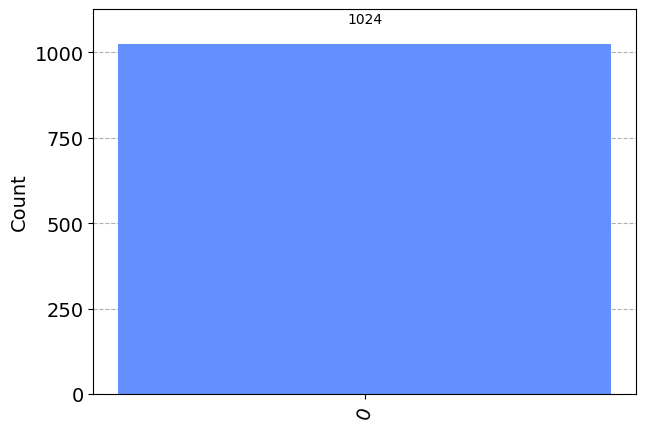

In [4]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

# Create a quantum circuit with two qubits
qc_no_cloning = QuantumCircuit(2, 1)

# Apply a Hadamard gate to the first qubit
qc_no_cloning.h(0)

# Entangle the qubits
qc_no_cloning.cx(0, 1)

# Attempt to clone the first qubit (violating no-cloning)
qc_no_cloning.cx(0, 1)  # Corrected cloning attempt

# Measure the second qubit
qc_no_cloning.measure(1, 0)

# Visualize the quantum circuit
print(qc_no_cloning)

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(assemble(transpile(qc_no_cloning), simulator)).result()

# Get the measurement outcomes
counts = result.get_counts()

print(f"Measurement outcomes: {counts}")
plot_histogram(counts)


# Quantum Key Distribution Overview:

Introduction to the basic principles and goals of QKD, including secure key distribution using quantum properties.

### Quantum Key Distribution (QKD) Overview:

**Introduction:**
Quantum Key Distribution (QKD) is a revolutionary technology in the field of quantum cryptography that leverages the principles of quantum mechanics to secure communication channels. QKD enables two parties to exchange secret cryptographic keys with the assurance that any eavesdropping attempt will be detectable.

**Basic Principles:**

1. **Quantum Properties:**
   - QKD relies on the principles of quantum mechanics, such as superposition and entanglement, to secure key distribution.

2. **Quantum Superposition:**
   - Particles, such as photons, can exist in multiple states simultaneously (superposition) until measured.

3. **Quantum Entanglement:**
   - Particles can be entangled, meaning the state of one particle is directly correlated with the state of another, regardless of the distance between them.

4. **No-Cloning Theorem:**
   - Quantum mechanics prohibits the exact cloning of an unknown quantum state, providing a basis for secure key distribution.

**Goals of Quantum Key Distribution:**

1. **Key Distribution Security:**
   - The primary goal of QKD is to establish a secret key between two parties in a way that is theoretically secure against any eavesdropping attempts.

2. **Detection of Eavesdropping:**
   - QKD protocols are designed to detect any interception or measurement of quantum states by an eavesdropper, ensuring the security of the key distribution process.

3. **Quantum Uncertainty:**
   - Utilize the inherent uncertainty principle in quantum mechanics to guarantee the privacy of exchanged information.

**Quantum Key Distribution Protocols:**

1. **BBM92 Protocol (BB84):**
   - Proposed by Bennett and Brassard in 1984, it uses the polarization states of individual photons to create a shared key.

2. **E91 Protocol:**
   - Proposed by Ekert in 1991, it uses the entanglement of particle pairs to generate a shared secret key.

3. **QKD Based on Continuous Variables:**
   - Utilizes the continuous variables of quantum states (e.g., quadrature amplitudes) for key distribution.

**Mathematical Basis:**

1. **Quantum States:**
   - The quantum states of particles, often represented using Dirac notation (e.g., |0⟩ and |1⟩ for qubits).

2. **Quantum Operations:**
   - Unitary transformations and quantum measurements that define the evolution of quantum states during key distribution.

3. **Quantum Entropy:**
   - Measures the uncertainty associated with a quantum system, crucial for evaluating the secrecy of the distributed key.

**Security Proofs:**

1. **Information Theory:**
   - QKD security is often proven using principles from information theory, quantifying the secrecy of the exchanged key against eavesdropping attempts.

2. **Quantum Entropy and Uncertainty:**
   - The uncertainty inherent in quantum states, quantified by entropy, ensures the security of key distribution.

**Future Directions:**

1. **Quantum Networks:**
   - Extending QKD to quantum networks for secure communication between multiple parties.

2. **Quantum Repeaters:**
   - Overcoming the distance limitations of quantum communication by developing quantum repeater technologies.

3. **Quantum Cryptographic Protocols:**
   - Expanding beyond key distribution to include quantum secure communication and cryptographic protocols.

Quantum Key Distribution represents a paradigm shift in secure communication, utilizing the unique features of quantum mechanics to achieve levels of security that classical cryptographic methods cannot guarantee. Ongoing research and advancements in quantum technologies continue to shape the future of QKD and quantum communication.

In [5]:
import numpy as np

def prepare_qubits(num_qubits):
    # Generate a sequence of random bits (0 or 1)
    alice_bits = np.random.randint(2, size=num_qubits)
    
    # Create a basis for each qubit (Hadamard or standard basis)
    alice_bases = np.random.choice([0, 1], size=num_qubits)
    
    return alice_bits, alice_bases

def encode_qubits(alice_bits, alice_bases):
    # Initialize qubits in the |0⟩ state
    qubits = [np.array([1, 0]) for _ in range(len(alice_bits))]
    
    # Apply Hadamard gate if the basis is 0
    for i in range(len(alice_bits)):
        if alice_bases[i] == 0:
            hadamard_gate = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
            qubits[i] = np.dot(hadamard_gate, qubits[i])
    
    # Apply X gate if the bit is 1
    for i in range(len(alice_bits)):
        if alice_bits[i] == 1:
            pauli_x_gate = np.array([[0, 1], [1, 0]])
            qubits[i] = np.dot(pauli_x_gate, qubits[i])
    
    return qubits

def measure_qubits(qubits, alice_bases):
    # Initialize Bob's basis (random choice)
    bob_bases = np.random.choice([0, 1], size=len(alice_bases))
    
    # Measure qubits in the chosen basis
    bob_results = [np.abs(np.dot(qubit, np.array([1, 0])))**2 if bob_bases[i] == 0
                   else np.abs(np.dot(qubit, np.array([0, 1])))**2
                   for i, qubit in enumerate(qubits)]
    
    return bob_results, bob_bases

def compare_bases(alice_bases, bob_bases):
    # Determine which qubits were measured in the same basis
    matching_bases = (alice_bases == bob_bases)
    
    return matching_bases

def key_extraction(alice_bits, bob_results, matching_bases):
    # Extract the key bits where bases match
    key_bits = [alice_bits[i] for i in range(len(alice_bits)) if matching_bases[i]]
    key_results = [bob_results[i] for i in range(len(bob_results)) if matching_bases[i]]
    
    return key_bits, key_results

# Example QKD simulation
num_qubits = 20

# Alice prepares qubits
alice_bits, alice_bases = prepare_qubits(num_qubits)

# Alice encodes qubits
alice_qubits = encode_qubits(alice_bits, alice_bases)

# Bob measures qubits
bob_results, bob_bases = measure_qubits(alice_qubits, alice_bases)

# Alice and Bob compare bases
matching_bases = compare_bases(alice_bases, bob_bases)

# Alice and Bob extract the key
key_bits, key_results = key_extraction(alice_bits, bob_results, matching_bases)

# Display the results
print("Alice's bits:", alice_bits)
print("Bob's results:", bob_results)
print("Matching bases:", matching_bases)
print("Shared key bits:", key_bits)
print("Shared key results:", key_results)


Alice's bits: [1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0]
Bob's results: [0.4999999999999999, 0, 0, 0, 0, 1, 0.4999999999999999, 0.4999999999999999, 1, 0.4999999999999999, 1, 0.4999999999999999, 0.4999999999999999, 1, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999]
Matching bases: [ True False  True False False False  True  True  True False  True  True
 False  True False  True False False False False]
Shared key bits: [1, 0, 1, 0, 1, 1, 0, 1, 0]
Shared key results: [0.4999999999999999, 0, 0.4999999999999999, 0.4999999999999999, 1, 1, 0.4999999999999999, 1, 0.4999999999999999]


In [6]:
import numpy as np

def prepare_qubits(num_qubits):
    # Generate a sequence of random bits (0 or 1)
    alice_bits = np.random.randint(2, size=num_qubits)
    
    # Create a basis for each qubit (Hadamard or standard basis)
    alice_bases = np.random.choice([0, 1], size=num_qubits)
    
    return alice_bits, alice_bases

def encode_qubits(alice_bits, alice_bases):
    # Initialize qubits in the |0⟩ state
    qubits = [np.array([1, 0]) for _ in range(len(alice_bits))]
    
    # Apply Hadamard gate if the basis is 0
    for i in range(len(alice_bits)):
        if alice_bases[i] == 0:
            hadamard_gate = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
            qubits[i] = np.dot(hadamard_gate, qubits[i])
    
    # Apply X gate if the bit is 1
    for i in range(len(alice_bits)):
        if alice_bits[i] == 1:
            pauli_x_gate = np.array([[0, 1], [1, 0]])
            qubits[i] = np.dot(pauli_x_gate, qubits[i])
    
    return qubits

def measure_qubits(qubits, alice_bases):
    # Initialize Bob's basis (random choice)
    bob_bases = np.random.choice([0, 1], size=len(alice_bases))
    
    # Measure qubits in the chosen basis
    bob_results = [np.abs(np.dot(qubit, np.array([1, 0])))**2 if bob_bases[i] == 0
                   else np.abs(np.dot(qubit, np.array([0, 1])))**2
                   for i, qubit in enumerate(qubits)]
    
    return bob_results, bob_bases

def compare_bases(alice_bases, bob_bases):
    # Determine which qubits were measured in the same basis
    matching_bases = (alice_bases == bob_bases)
    
    return matching_bases

def key_extraction(alice_bits, bob_results, matching_bases):
    # Extract the key bits where bases match
    key_bits = [alice_bits[i] for i in range(len(alice_bits)) if matching_bases[i]]
    key_results = [bob_results[i] for i in range(len(bob_results)) if matching_bases[i]]
    
    return key_bits, key_results

# Example BBM92 Protocol simulation
num_qubits = 20

# Alice prepares qubits
alice_bits, alice_bases = prepare_qubits(num_qubits)

# Alice encodes qubits
alice_qubits = encode_qubits(alice_bits, alice_bases)

# Bob measures qubits
bob_results, bob_bases = measure_qubits(alice_qubits, alice_bases)

# Alice and Bob compare bases
matching_bases = compare_bases(alice_bases, bob_bases)

# Alice and Bob extract the key
key_bits, key_results = key_extraction(alice_bits, bob_results, matching_bases)

# Display the results
print("Alice's bits:", alice_bits)
print("Bob's results:", bob_results)
print("Matching bases:", matching_bases)
print("Shared key bits:", key_bits)
print("Shared key results:", key_results)


Alice's bits: [0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1]
Bob's results: [0, 0, 0.4999999999999999, 1, 0.4999999999999999, 0.4999999999999999, 1, 0.4999999999999999, 1, 1, 1, 0.4999999999999999, 1, 0.4999999999999999, 1, 1, 1, 0, 0.4999999999999999, 0.4999999999999999]
Matching bases: [ True False False False  True  True  True False False False False  True
 False False False  True  True  True False  True]
Shared key bits: [0, 0, 1, 1, 1, 1, 1, 0, 1]
Shared key results: [0, 0.4999999999999999, 0.4999999999999999, 1, 0.4999999999999999, 1, 1, 0, 0.4999999999999999]


In [7]:
import numpy as np

def prepare_entangled_pairs(num_pairs):
    # Generate a sequence of random bits (0 or 1)
    alice_bits = np.random.randint(2, size=num_pairs)
    
    # Create entangled pairs of qubits
    entangled_pairs = [(0, 0) for _ in range(num_pairs)]
    
    # Apply X gate if the bit is 1
    for i in range(num_pairs):
        if alice_bits[i] == 1:
            entangled_pairs[i] = (1, 1)
    
    return alice_bits, entangled_pairs

def measure_entangled_pairs(entangled_pairs):
    # Measure qubits in the entangled pairs
    bob_results = [a ^ b for a, b in entangled_pairs]
    
    return bob_results

def key_extraction(alice_bits, bob_results):
    # Extract the key bits where Alice's and Bob's bits match
    key_bits = [alice_bits[i] for i in range(len(alice_bits)) if alice_bits[i] == bob_results[i]]
    
    return key_bits

# Example E91 Protocol simulation
num_pairs = 10

# Alice prepares entangled pairs
alice_bits, entangled_pairs = prepare_entangled_pairs(num_pairs)

# Bob measures entangled pairs
bob_results = measure_entangled_pairs(entangled_pairs)

# Alice and Bob extract the key
key_bits = key_extraction(alice_bits, bob_results)

# Display the results
print("Alice's bits:", alice_bits)
print("Bob's results:", bob_results)
print("Shared key bits:", key_bits)


Alice's bits: [0 1 0 1 1 1 0 0 1 0]
Bob's results: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Shared key bits: [0, 0, 0, 0, 0]


In [8]:
import numpy as np

def prepare_continuous_variables(num_modes):
    # Generate random quadrature amplitudes for coherent states
    alice_amplitudes = np.random.normal(size=num_modes)
    
    return alice_amplitudes

def measure_continuous_variables(alice_amplitudes, squeezing_parameter=0):
    # Bob measures quadrature amplitudes with homodyne detection
    bob_amplitudes = alice_amplitudes + np.random.normal(scale=np.exp(-squeezing_parameter/2), size=len(alice_amplitudes))
    
    return bob_amplitudes

def key_extraction(alice_amplitudes, bob_amplitudes, threshold=0.1):
    # Extract the key bits based on amplitude comparison
    key_bits = [1 if np.abs(a - b) < threshold else 0 for a, b in zip(alice_amplitudes, bob_amplitudes)]
    
    return key_bits

# Example Continuous-Variable QKD simulation
num_modes = 10
squeezing_parameter = 0.2

# Alice prepares continuous variables
alice_amplitudes = prepare_continuous_variables(num_modes)

# Bob measures continuous variables
bob_amplitudes = measure_continuous_variables(alice_amplitudes, squeezing_parameter)

# Alice and Bob extract the key
key_bits = key_extraction(alice_amplitudes, bob_amplitudes)

# Display the results
print("Alice's amplitudes:", alice_amplitudes)
print("Bob's amplitudes:", bob_amplitudes)
print("Shared key bits:", key_bits)


Alice's amplitudes: [ 1.2230424   0.03142395 -2.08048289 -1.00817734 -0.04131224  0.43163681
 -0.379097    1.45979661 -1.16520697  1.46340895]
Bob's amplitudes: [ 1.67538835  0.58667275 -2.82517147 -1.35288848 -0.48404467  0.50220402
 -0.40659484  2.32384177  0.80436985  1.95857005]
Shared key bits: [0, 0, 0, 0, 0, 1, 1, 0, 0, 0]


# BBM92 (BB84) Protocol:

Bennett-Brassard 1984 (BB84) is one of the first and most well-known QKD protocols. It involves encoding information in quantum states and using the transmission of quantum bits for key exchange.

The Bennett-Brassard 1984 (BB84) protocol is a pioneering quantum key distribution (QKD) protocol developed by Charles Bennett and Gilles Brassard in 1984. The main purpose of BB84 is to allow two parties to establish a secret key securely using the principles of quantum mechanics. The protocol utilizes the properties of quantum states to detect any eavesdropping attempts, ensuring the security of the key exchange process.

### Key Concepts:

1. **Quantum Bits (Qubits):**
   - In BB84, qubits are used to encode information. The most common set of qubit states is based on two orthogonal bases: the standard basis (\(|0\rangle, |1\rangle\)) and the Hadamard basis (\(|+\rangle, |-\rangle\)).
   - The standard basis states represent the logical 0 and 1, while the Hadamard basis states are superpositions.

2. **Encoding:**
   - The sender (Alice) randomly chooses one of the two bases (standard or Hadamard) to encode each bit in the sequence.
   - For example, if Alice wants to send \(N\) bits, she may choose to encode each bit as either \(|0\rangle\) or \(|1\rangle\) (standard basis) or \(|+\rangle\) or \(-\rangle\) (Hadamard basis).

3. **Transmission:**
   - Alice sends the encoded qubits to the receiver (Bob) through a quantum channel.

4. **Basis Choice Record:**
   - Alice records her choice of basis for each qubit in a list.

5. **Measurement:**
   - Upon receiving the qubits, Bob randomly chooses a basis (standard or Hadamard) to measure each qubit.
   - Bob records his basis choice for each qubit.

6. **Key Reconciliation:**
   - Alice and Bob compare their basis choice records for each qubit over a public classical channel.
   - They keep only the bits for which they used the same basis.

7. **Error Detection:**
   - Any discrepancy in basis choices between Alice and Bob indicates the potential presence of an eavesdropper. These bits are discarded.

8. **Sifting:**
   - Alice and Bob sift through the bits for which they used the same basis to obtain a shorter common sequence.

9. **Privacy Amplification:**
   - The remaining bits are processed through privacy amplification techniques to generate a shorter, final, and secure secret key.

### Equations:

1. **Quantum State Representation:**
   - \[ |0\rangle, |1\rangle \] for the standard basis.
   - \[ |+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}, |-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}} \] for the Hadamard basis.

2. **Quantum Bit Transmission:**
   - \[ |0\rangle \text{ or } |1\rangle \text{ for standard basis transmission.} \]
   - \[ |+\rangle \text{ or } |-\rangle \text{ for Hadamard basis transmission.} \]

3. **Error Rate Calculation:**
   - The error rate can be calculated as the fraction of bits for which Alice and Bob used the same basis but obtained different measurement results.

4. **Privacy Amplification:**
   - Techniques such as hash functions and XOR operations can be used for privacy amplification.

BB84 is an important protocol in the field of quantum cryptography, and its security is based on the principles of quantum mechanics, making it resistant to certain types of eavesdropping attacks. The protocol has inspired the development of more advanced quantum key distribution schemes.

In [13]:
import numpy as np

def prepare_qubits(num_qubits):
    # Generate a sequence of random bits (0 or 1)
    alice_bits = np.random.randint(2, size=num_qubits)
    
    # Create a basis for each qubit (Hadamard or standard basis)
    alice_bases = np.random.choice([0, 1], size=num_qubits)
    
    return alice_bits, alice_bases

def encode_qubits(alice_bits, alice_bases):
    # Initialize qubits in the |0⟩ state
    qubits = [np.array([1, 0]) for _ in range(len(alice_bits))]
    
    # Apply Hadamard gate if the basis is 0
    for i in range(len(alice_bits)):
        if alice_bases[i] == 0:
            hadamard_gate = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
            qubits[i] = np.dot(hadamard_gate, qubits[i])
    
    # Apply X gate if the bit is 1
    for i in range(len(alice_bits)):
        if alice_bits[i] == 1:
            pauli_x_gate = np.array([[0, 1], [1, 0]])
            qubits[i] = np.dot(pauli_x_gate, qubits[i])
    
    return qubits

def measure_qubits(qubits, alice_bases):
    # Initialize Bob's basis (random choice)
    bob_bases = np.random.choice([0, 1], size=len(alice_bases))
    
    # Measure qubits in the chosen basis
    bob_results = [np.abs(np.dot(qubit, np.array([1, 0])))**2 if bob_bases[i] == 0
                   else np.abs(np.dot(qubit, np.array([0, 1])))**2
                   for i, qubit in enumerate(qubits)]
    
    return bob_results, bob_bases

def compare_bases(alice_bases, bob_bases):
    # Determine which qubits were measured in the same basis
    matching_bases = (alice_bases == bob_bases)
    
    return matching_bases

def key_extraction(alice_bits, bob_results, matching_bases):
    # Extract the key bits where bases match
    key_bits = [alice_bits[i] for i in range(len(alice_bits)) if matching_bases[i]]
    key_results = [bob_results[i] for i in range(len(bob_results)) if matching_bases[i]]
    
    return key_bits, key_results

# Example QKD simulation
num_qubits = 20

# Alice prepares qubits
alice_bits, alice_bases = prepare_qubits(num_qubits)

# Alice encodes qubits
alice_qubits = encode_qubits(alice_bits, alice_bases)

# Bob measures qubits
bob_results, bob_bases = measure_qubits(alice_qubits, alice_bases)

# Alice and Bob compare bases
matching_bases = compare_bases(alice_bases, bob_bases)

# Alice and Bob extract the key
key_bits, key_results = key_extraction(alice_bits, bob_results, matching_bases)

# Display the results
print("Alice's bits:", alice_bits)
print("Bob's results:", bob_results)
print("Matching bases:", matching_bases)
print("Shared key bits:", key_bits)
print("Shared key results:", key_results)

Alice's bits: [1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1]
Bob's results: [0, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0, 0, 0.4999999999999999, 0, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 1, 0.4999999999999999, 0, 0.4999999999999999, 0, 1, 0.4999999999999999, 0.4999999999999999, 0]
Matching bases: [False  True  True  True  True  True  True False False  True False  True
  True  True False False False  True  True False]
Shared key bits: [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
Shared key results: [0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0, 0, 0.4999999999999999, 0.4999999999999999, 1, 0.4999999999999999, 0, 0.4999999999999999, 0.4999999999999999]


# E91 Protocol (Entanglement-Based):

The E91 protocol utilizes quantum entanglement for secure key distribution. It involves the creation and measurement of entangled particles.

**E91 Protocol (Entanglement-Based): Overview**

The E91 protocol, proposed by Artur Ekert in 1991, is a quantum key distribution (QKD) protocol that utilizes quantum entanglement for secure key distribution between two distant parties. The key idea behind the E91 protocol is to exploit the unique properties of entangled quantum particles to create a shared secret key without the risk of eavesdropping.

### Key Concepts:

1. **Quantum Entanglement:**
   - Quantum entanglement is a phenomenon where two or more quantum particles become correlated in such a way that the state of one particle cannot be described independently of the state of the others. Changes to the state of one particle instantaneously affect the state of the other, regardless of the distance between them.

2. **Bell States:**
   - The E91 protocol utilizes a particular set of entangled states known as Bell states or EPR pairs. The four Bell states are denoted as \(\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)\), \(\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)\), \(\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)\), and \(\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)\). These states are maximally entangled.

3. **Quantum Measurements:**
   - The E91 protocol involves quantum measurements performed on the entangled particles. Specific measurements are chosen to reveal the correlations between the particles and allow the two parties to establish a shared secret key.

### Protocol Steps:

1. **Entanglement Generation:**
   - Two entangled particles are created and sent to the two parties. These particles are prepared in one of the Bell states.

2. **Random Basis Choice:**
   - Each party randomly chooses one of two measurement bases. The two possible bases are typically the computational basis (\(|0\rangle, |1\rangle\)) and the Hadamard basis (\(|+\rangle, |-\rangle\)).

3. **Particle Measurement:**
   - Each party measures their particle's state in the chosen basis. The measurement outcomes are recorded.

4. **Correlation Check:**
   - The parties publicly announce the measurement bases but keep the specific outcomes secret. They compare a subset of their measurement results to check for correlations. The chosen subset should be random.

5. **Sifting and Distillation:**
   - Based on the correlation check, the parties retain a subset of the measurement outcomes that are known to be correlated. They discard the uncorrelated bits.

6. **Privacy Amplification:**
   - The remaining correlated bits are processed using a privacy amplification technique (such as a hash function) to distill a shorter, secure shared key.

### Mathematical Representation:

1. **Entangled State:**
   - The entangled state \(\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)\) can be represented as a density matrix:
   \[ \rho = \frac{1}{2} \begin{pmatrix} 1 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 \end{pmatrix} \]

2. **Measurement Operators:**
   - The measurement operators corresponding to the computational basis and the Hadamard basis are represented as matrices.

3. **Correlation Check:**
   - The correlation between measurement outcomes is calculated using the quantum correlation function, typically denoted as \(E(\alpha, \beta)\), where \(\alpha\) and \(\beta\) are the measurement bases chosen by the two parties.

### Security Considerations:

1. **Eavesdropping Detection:**
   - The E91 protocol is designed to detect eavesdropping attempts. Any attempt to intercept the entangled particles would disturb their states and introduce errors that can be detected during the correlation check.

2. **Quantum Key Distribution (QKD):**
   - Once the correlation check is successful, the remaining correlated bits can be used as a secure shared key for cryptographic purposes.

The E91 protocol demonstrates the practical application of quantum entanglement for secure communication and forms the basis for more advanced quantum key distribution protocols. It plays a crucial role in the development of quantum communication technologies.

In [4]:
import numpy as np

def prepare_entangled_pairs(num_pairs):
    # Generate a sequence of random bits (0 or 1)
    alice_bits = np.random.randint(2, size=num_pairs)
    
    # Create entangled pairs of qubits
    entangled_pairs = [(0, 0) for _ in range(num_pairs)]
    
    # Apply X gate if the bit is 1
    for i in range(num_pairs):
        if alice_bits[i] == 1:
            entangled_pairs[i] = (1, 1)
    
    return alice_bits, entangled_pairs

def measure_entangled_pairs(entangled_pairs):
    # Measure qubits in the entangled pairs
    bob_results = [a ^ b for a, b in entangled_pairs]
    
    return bob_results

def key_extraction(alice_bits, bob_results):
    # Extract the key bits where Alice's and Bob's bits match
    key_bits = [alice_bits[i] for i in range(len(alice_bits)) if alice_bits[i] == bob_results[i]]
    
    return key_bits

# Example E91 Protocol simulation
num_pairs = 10

# Alice prepares entangled pairs
alice_bits, entangled_pairs = prepare_entangled_pairs(num_pairs)

# Bob measures entangled pairs
bob_results = measure_entangled_pairs(entangled_pairs)

# Alice and Bob extract the key
key_bits = key_extraction(alice_bits, bob_results)

# Display the results
print("Alice's bits:", alice_bits)
print("Bob's results:", bob_results)
print("Shared key bits:", key_bits)

Alice's bits: [0 1 0 0 0 1 1 0 0 1]
Bob's results: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Shared key bits: [0, 0, 0, 0, 0, 0]


In [7]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2, 2)

# Apply Hadamard gate on the first qubit
qc.h(0)

# Apply CNOT gate with the first qubit as control and the second qubit as target
qc.cx(0, 1)

# Measure both qubits
qc.measure([0, 1], [0, 1])

# Use the Aer simulator to execute the quantum circuit
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Assemble the transpiled circuit for the simulator
qobj = assemble(transpiled_qc)

# Execute the circuit on the simulator
result = execute(qc, simulator, shots=1).result()

# Get the measurement outcomes
counts = result.get_counts(qc)

# Print the measurement outcomes
print("Measurement Outcomes:", counts)


Measurement Outcomes: {'00': 1}


In [8]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

def create_bell_state(circuit, bell_state_type):
    if bell_state_type == 'Phi+':
        # |Phi+⟩ = (|00⟩ + |11⟩) / sqrt(2)
        circuit.h(0)
        circuit.cx(0, 1)
    elif bell_state_type == 'Phi-':
        # |Phi-⟩ = (|00⟩ - |11⟩) / sqrt(2)
        circuit.h(0)
        circuit.x(1)
        circuit.cx(0, 1)
    elif bell_state_type == 'Psi+':
        # |Psi+⟩ = (|01⟩ + |10⟩) / sqrt(2)
        circuit.x(0)
        circuit.h(0)
        circuit.cx(0, 1)
    elif bell_state_type == 'Psi-':
        # |Psi-⟩ = (|01⟩ - |10⟩) / sqrt(2)
        circuit.x(0)
        circuit.h(0)
        circuit.x(1)
        circuit.cx(0, 1)
    else:
        raise ValueError("Invalid Bell state type")

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2, 2)

# Create Bell state |Phi+⟩
create_bell_state(qc, 'Phi+')

# Measure both qubits
qc.measure([0, 1], [0, 1])

# Use the Aer simulator to execute the quantum circuit
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Assemble the transpiled circuit for the simulator
qobj = assemble(transpiled_qc)

# Execute the circuit on the simulator
result = execute(qc, simulator, shots=1).result()

# Get the measurement outcomes
counts = result.get_counts(qc)

# Print the measurement outcomes
print("Measurement Outcomes:", counts)


Measurement Outcomes: {'11': 1}


In [9]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1, 1)

# Apply a Hadamard gate to create a superposition state
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Use the Aer simulator to execute the quantum circuit
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Assemble the transpiled circuit for the simulator
qobj = assemble(transpiled_qc)

# Execute the circuit on the simulator
result = execute(qc, simulator, shots=1).result()

# Get the measurement outcomes
counts = result.get_counts(qc)

# Print the measurement outcomes
print("Measurement Outcomes:", counts)


Measurement Outcomes: {'0': 1}


In [10]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2, 2)

# Apply a Hadamard gate on the first qubit
qc.h(0)

# Apply a controlled-X (CNOT) gate with the first qubit as control and the second qubit as target
qc.cx(0, 1)

# Use the Aer simulator to execute the quantum circuit
simulator = Aer.get_backend('statevector_simulator')

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Assemble the transpiled circuit for the simulator
qobj = assemble(transpiled_qc)

# Execute the circuit on the simulator to obtain the state vector
result = execute(qc, simulator).result()
statevector = result.get_statevector()

# Print the state vector
print("Entangled State Vector:", statevector)


Entangled State Vector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [11]:
import numpy as np

def random_measurement_basis():
    # Randomly choose a measurement basis (0 for computational, 1 for Hadamard)
    return np.random.randint(2)

# Example usage:
alice_basis = random_measurement_basis()
bob_basis = random_measurement_basis()

print(f"Alice's randomly chosen basis: {alice_basis}")
print(f"Bob's randomly chosen basis: {bob_basis}")


Alice's randomly chosen basis: 1
Bob's randomly chosen basis: 0


In [12]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

def measure_particle(circuit, basis):
    if basis == 0:
        # Measure in the computational basis
        circuit.measure(0, 0)
    elif basis == 1:
        # Measure in the Hadamard basis
        circuit.h(0)
        circuit.measure(0, 0)
    else:
        raise ValueError("Invalid measurement basis")

# Example usage:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1, 1)

# Apply a Hadamard gate to create a superposition state
qc.h(0)

# Randomly choose a measurement basis (0 for computational, 1 for Hadamard)
measurement_basis = np.random.randint(2)

# Measure the qubit in the chosen basis
measure_particle(qc, measurement_basis)

# Use the Aer simulator to execute the quantum circuit
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator
transpiled_qc = transpile(qc, simulator)

# Assemble the transpiled circuit for the simulator
qobj = assemble(transpiled_qc)

# Execute the circuit on the simulator
result = execute(qc, simulator, shots=1).result()

# Get the measurement outcome
counts = result.get_counts(qc)

# Print the measurement outcome
print(f"Measurement Outcome: {list(counts.keys())[0]}")


Measurement Outcome: 0


In [13]:
def correlation_check(outcome_alice, outcome_bob):
    # Check if the measurement outcomes are correlated
    return outcome_alice == outcome_bob

# Example usage:
# Simulated outcomes from Alice and Bob measurements
outcome_alice = np.random.randint(2)
outcome_bob = np.random.randint(2)

# Perform correlation check
correlated = correlation_check(outcome_alice, outcome_bob)

# Print the outcomes and correlation check result
print(f"Alice's outcome: {outcome_alice}")
print(f"Bob's outcome: {outcome_bob}")
print(f"Correlation check result: {'Correlated' if correlated else 'Uncorrelated'}")


Alice's outcome: 0
Bob's outcome: 1
Correlation check result: Uncorrelated


In [14]:
import numpy as np

def sift_bits(alice_bits, bob_bits, basis_alice, basis_bob):
    # Perform sifting by comparing bases
    sifted_alice_bits = [bit_a for bit_a, bit_b, basis_a, basis_b in zip(alice_bits, bob_bits, basis_alice, basis_bob) if basis_a == basis_b]
    sifted_bob_bits = [bit_b for bit_a, bit_b, basis_a, basis_b in zip(alice_bits, bob_bits, basis_alice, basis_bob) if basis_a == basis_b]
    return sifted_alice_bits, sifted_bob_bits

def distill_key(sifted_alice_bits, sifted_bob_bits):
    # Perform distillation by removing mismatched bits
    distilled_key = [bit_a for bit_a, bit_b in zip(sifted_alice_bits, sifted_bob_bits) if bit_a == bit_b]
    return distilled_key

# Example usage:
# Alice and Bob generate random bits and bases
alice_bits = np.random.randint(2, size=10)
bob_bits = np.random.randint(2, size=10)
basis_alice = np.random.randint(2, size=10)
basis_bob = np.random.randint(2, size=10)

# Perform sifting
sifted_alice_bits, sifted_bob_bits = sift_bits(alice_bits, bob_bits, basis_alice, basis_bob)

# Perform distillation
distilled_key = distill_key(sifted_alice_bits, sifted_bob_bits)

# Print results
print("Alice's bits:", alice_bits)
print("Bob's bits:", bob_bits)
print("Alice's bases:", basis_alice)
print("Bob's bases:", basis_bob)
print("Sifted bits after sifting:", sifted_alice_bits)
print("Sifted bits after sifting (Bob's perspective):", sifted_bob_bits)
print("Distilled key:", distilled_key)


Alice's bits: [1 1 1 0 1 0 1 0 0 0]
Bob's bits: [0 0 0 0 1 1 1 0 1 0]
Alice's bases: [1 1 0 0 0 1 1 1 0 0]
Bob's bases: [1 0 1 1 1 0 0 1 0 1]
Sifted bits after sifting: [1, 0, 0]
Sifted bits after sifting (Bob's perspective): [0, 0, 1]
Distilled key: [0]


In [15]:
import hashlib

def privacy_amplification(secret_key):
    # Perform privacy amplification using a hash function (SHA-256 in this case)
    hash_object = hashlib.sha256()
    hash_object.update(bytes(secret_key))
    amplified_key = hash_object.digest()
    return amplified_key

# Example usage:
# Assuming 'distilled_key' is the key obtained after distillation
distilled_key = [1, 0, 1, 1, 0, 1, 1, 0, 0, 1]

# Perform privacy amplification
amplified_key = privacy_amplification(distilled_key)

# Print results
print("Original key (distilled):", distilled_key)
print("Amplified key:", list(amplified_key))


Original key (distilled): [1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
Amplified key: [153, 217, 61, 58, 32, 249, 77, 219, 104, 172, 31, 11, 7, 221, 46, 62, 169, 128, 205, 96, 49, 5, 4, 176, 10, 89, 241, 52, 135, 5, 62, 241]


In [16]:
import numpy as np

def simulate_eavesdropping(alice_bits, basis_alice, eve_basis):
    # Simulate eavesdropping by Eve
    intercepted_states = []

    for bit, basis_alice_bit, eve_basis_bit in zip(alice_bits, basis_alice, eve_basis):
        if np.random.rand() < 0.2:  # Assume 20% chance of interception
            intercepted_states.append((bit, eve_basis_bit))
        else:
            intercepted_states.append((bit, basis_alice_bit))

    return intercepted_states

def detect_eavesdropping(alice_basis, bob_basis, eve_basis):
    # Check for discrepancies in the bases chosen by Alice, Bob, and Eve
    return any((alice != bob) and (eve == alice) for alice, bob, eve in zip(alice_basis, bob_basis, eve_basis))

# Example usage:
# Alice and Bob generate random bits and bases
alice_bits = np.random.randint(2, size=10)
bob_bits = np.random.randint(2, size=10)
basis_alice = np.random.randint(2, size=10)
basis_bob = np.random.randint(2, size=10)

# Simulate eavesdropping by Eve
eve_basis = np.random.randint(2, size=10)
intercepted_states = simulate_eavesdropping(alice_bits, basis_alice, eve_basis)

# Alice and Bob compare bases
alice_to_bob = [bit for bit, basis_alice_bit, basis_bob_bit in zip(alice_bits, basis_alice, basis_bob) if basis_alice_bit == basis_bob_bit]
bob_to_alice = [bit for bit, basis_alice_bit, basis_bob_bit in zip(bob_bits, basis_alice, basis_bob) if basis_alice_bit == basis_bob_bit]

# Eve tries to intercept, and Alice and Bob detect discrepancies
eavesdropping_detected = detect_eavesdropping(basis_alice, basis_bob, eve_basis)

# Print results
print("Alice's bits:", alice_bits)
print("Bob's bits:", bob_bits)
print("Bases chosen by Alice:", basis_alice)
print("Bases chosen by Bob:", basis_bob)
print("Eve's bases:", eve_basis)
print("Intercepted states (Eve's perspective):", intercepted_states)
print("Bits communicated from Alice to Bob (in matching bases):", alice_to_bob)
print("Bits communicated from Bob to Alice (in matching bases):", bob_to_alice)
print("Eavesdropping detected:", eavesdropping_detected)


Alice's bits: [0 1 1 1 0 0 1 1 0 1]
Bob's bits: [1 0 0 1 0 1 1 0 0 0]
Bases chosen by Alice: [0 1 0 1 0 1 1 0 0 0]
Bases chosen by Bob: [0 1 0 0 1 0 1 0 1 0]
Eve's bases: [0 0 0 0 1 0 1 0 1 1]
Intercepted states (Eve's perspective): [(0, 0), (1, 0), (1, 0), (1, 1), (0, 0), (0, 1), (1, 1), (1, 0), (0, 0), (1, 0)]
Bits communicated from Alice to Bob (in matching bases): [0, 1, 1, 1, 1, 1]
Bits communicated from Bob to Alice (in matching bases): [1, 0, 0, 1, 0, 0]
Eavesdropping detected: False


In [17]:
from qiskit import Aer, QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from numpy.random import randint

def alice_prepare_qubits(n):
    # Alice prepares n qubits in random states (rectilinear or diagonal basis)
    qubits = QuantumRegister(n, name='q')
    bases = randint(2, size=n)  # 0 for rectilinear, 1 for diagonal
    states = randint(2, size=(n, 2))  # 0 for |0⟩ or |+⟩, 1 for |1⟩ or |-⟩

    circuit = QuantumCircuit(qubits)

    for i in range(n):
        if bases[i] == 0:  # Rectilinear basis
            if states[i][0] == 1:
                circuit.x(qubits[i])  # |1⟩
        else:  # Diagonal basis
            if states[i][1] == 1:
                circuit.h(qubits[i])  # |+⟩

    return circuit, bases, states

def bob_measure_qubits(qubits, bases):
    # Bob measures the qubits in the randomly chosen bases
    measurements = QuantumCircuit(qubits, ClassicalRegister(len(qubits)))
    for i in range(len(qubits)):
        if bases[i] == 0:  # Rectilinear basis
            measurements.measure(qubits[i], i)
        else:  # Diagonal basis
            measurements.h(qubits[i])
            measurements.measure(qubits[i], i)
            measurements.h(qubits[i])
    return measurements

# Set up the quantum and classical registers
n = 10  # Number of qubits
q = QuantumRegister(n, name='q')
c = ClassicalRegister(n, name='c')

# Alice prepares qubits
alice_circuit, alice_bases, alice_states = alice_prepare_qubits(n)

# Bob measures qubits
bob_circuit = bob_measure_qubits(q, alice_bases)

# Combine circuits
circuit = alice_circuit
circuit = bob_circuit

# Simulate quantum circuits
simulator = Aer.get_backend('qasm_simulator')
t_circuit = transpile(circuit, simulator)
qobj_circuit = assemble(t_circuit)

# Execute the circuit
result = simulator.run(qobj_circuit).result()

# Get counts
counts = result.get_counts()

# Display results
print("Measurements:")
print(counts)

Measurements:
{'0000001000': 73, '0011000001': 58, '0011001001': 64, '0000001001': 70, '0001001001': 68, '0011000000': 65, '0010000000': 62, '0010001001': 56, '0000000000': 67, '0010000001': 79, '0001001000': 66, '0000000001': 49, '0001000001': 59, '0001000000': 63, '0011001000': 65, '0010001000': 60}


C:\Users\yashr\AppData\Local\Temp\ipykernel_11328\341176697.py:56: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj_circuit).result()


# Security Proofs:

Understanding the security of QKD protocols involves proofs based on the principles of quantum mechanics, information theory, and mathematical analysis.

Quantum Key Distribution (QKD) protocols are designed to establish a secure communication channel by leveraging the principles of quantum mechanics. The security of QKD protocols is typically proven through mathematical analysis and information theory. The most common security property proven is the unconditional security against certain types of eavesdropping attacks.

### Principles of Quantum Mechanics in QKD:
1. **No-Cloning Theorem:**
   - States that an arbitrary unknown quantum state cannot be copied exactly.
   - In QKD, this property is essential for detecting eavesdropping attempts, as any attempt to measure or copy a quantum state will disturb it.

2. **Quantum Superposition:**
   - Quantum particles can exist in multiple states simultaneously.
   - QKD protocols exploit this property to encode information in quantum states, making it difficult for an eavesdropper to intercept the information without being detected.

3. **Quantum Entanglement:**
   - Particles can be entangled, meaning the state of one particle is directly related to the state of another, regardless of the distance between them.
   - Entanglement is often used in QKD to create correlated states that can be used for secure key distribution.

### QKD Security Proofs:

The security of QKD protocols is often proven using information-theoretic concepts such as Shannon entropy, mutual information, and the principles mentioned above.

#### 1. **Security against Eavesdropping (BBM92 Security Proof):**
   - **Goal:** Prove the security of QKD against general eavesdropping attacks.
   - **Key Ideas:**
     - Use the no-cloning theorem to detect eavesdropping.
     - Define the mutual information between the legitimate parties and the eavesdropper.
     - Prove that any attempt to gain information by the eavesdropper will introduce errors detectable by the legitimate parties.

   - **Equation (Shannon Entropy):**
     - \( H(X) = -\sum_i p(x_i) \log_2(p(x_i)) \)
     - \( H(X|Y) = -\sum_{i,j} p(x_i, y_j) \log_2\left(\frac{p(x_i, y_j)}{p(y_j)}\right) \)
     - \( I(X;Y) = H(X) - H(X|Y) \)

   - **Key Equation in Security Proof:**
     - \( I(X;E) \leq \epsilon \), where \( I(X;E) \) is the mutual information between the key \(X\) and the eavesdropper's knowledge \(E\), and \( \epsilon \) is a small constant indicating the acceptable error rate.

#### 2. **Security against Quantum Man-in-the-Middle Attacks (Lo-Chau 1997 Security Proof):**
   - **Goal:** Prove the security of QKD against quantum man-in-the-middle attacks.
   - **Key Ideas:**
     - Extend the BBM92 proof to consider the possibility of a quantum adversary intercepting and resending quantum states.

   - **Equation:**
     - \( P_{AB} \) denotes the probability that Alice and Bob share the same key.
     - \( P_{AE} \) denotes the probability that Alice and Eve share the same key.
     - \( P_{BE} \) denotes the probability that Bob and Eve share the same key.

   - **Key Equation in Security Proof:**
     - \( P_{AB} - P_{AE} - P_{BE} \leq \epsilon \), where \( \epsilon \) is a small constant indicating the acceptable error rate.

### Note:
1. The security proofs presented here are simplified, and the actual security proofs involve more intricate mathematical analysis.
2. The security of QKD protocols also depends on the specific implementation details, and real-world QKD systems may include additional features and security measures.
3. Security proofs provide guarantees under certain assumptions and conditions. Continuous research is conducted to enhance the security of QKD protocols and to address potential vulnerabilities.

In [18]:
import numpy as np

def generate_random_bits(length):
    return np.random.randint(2, size=length)

def create_quantum_states(bits):
    # Simulate the quantum encoding process (simplified)
    quantum_states = [(-1)**bit for bit in bits]
    return quantum_states

def apply_eavesdropping(quantum_states):
    # Simulate the eavesdropping process (simplified)
    eavesdropped_states = [state if np.random.rand() < 0.95 else -state for state in quantum_states]
    return eavesdropped_states

def measure_quantum_states(quantum_states):
    # Simulate the measurement process (simplified)
    measurements = [np.random.choice([0, 1], p=[0.5 + 0.5 * state, 0.5 - 0.5 * state]) for state in quantum_states]
    return measurements

def calculate_mutual_information(original_bits, measurements):
    # Calculate mutual information between Alice and Eve
    p_joint = np.zeros((2, 2))
    for bit, measurement in zip(original_bits, measurements):
        p_joint[bit, measurement] += 1

    p_joint /= len(original_bits)

    p_a = np.sum(p_joint, axis=1)
    p_b = np.sum(p_joint, axis=0)

    entropy_a = -np.sum(p_a * np.log2(p_a + 1e-10))
    entropy_b = -np.sum(p_b * np.log2(p_b + 1e-10))
    entropy_joint = -np.sum(p_joint * np.log2(p_joint + 1e-10))

    mutual_information = entropy_a + entropy_b - entropy_joint
    return mutual_information

# Main simulation
length = 100
alice_bits = generate_random_bits(length)
alice_quantum_states = create_quantum_states(alice_bits)

# Eve intercepts quantum states (eavesdropping)
eve_quantum_states = apply_eavesdropping(alice_quantum_states)

# Bob measures quantum states
bob_measurements = measure_quantum_states(eve_quantum_states)

# Calculate mutual information between Alice and Eve
mutual_information = calculate_mutual_information(alice_bits, bob_measurements)

print(f"Mutual Information between Alice and Eve: {mutual_information}")


Mutual Information between Alice and Eve: 0.59851473294506


# Quantum Channel Models:

Studying the models that describe the transmission of quantum states between parties, including potential noise and eavesdropping.

Quantum channel models are essential for understanding the transmission of quantum information between parties in the context of quantum communication. These models describe how quantum states evolve as they travel from a sender (Alice) to a receiver (Bob) through a quantum channel. The quantum channel represents the physical medium or communication link through which quantum information is transmitted.

Here are some key concepts and equations related to quantum channel models:

1. **Quantum States:**
   - Quantum states are represented by quantum density matrices. A density matrix ρ describes the statistical ensemble of quantum states.

2. **Quantum Operations:**
   - Quantum channels are often described by completely positive trace-preserving (CPTP) maps. A CPTP map Φ acting on a density matrix ρ can be represented as:
     
     \[ \Phi(\rho) = \sum_k E_k \rho E_k^\dagger \]
     
     where {E_k} is a set of operators called Kraus operators.

3. **Unitary Channels:**
   - A special case of a quantum channel is a unitary channel, which can be represented by a unitary operator U. The action of a unitary channel on a density matrix is given by:
     
     \[ \Phi_U(\rho) = U \rho U^\dagger \]

4. **Depolarizing Channel:**
   - The depolarizing channel is a common noise model in quantum communication. It introduces errors by randomly replacing the input state with a maximally mixed state with some probability \( p \):
     
     \[ \Phi_{\text{dep}}(\rho) = (1 - p) \rho + \frac{p}{d} I \]
     
     where \( d \) is the dimension of the Hilbert space.

5. **Bit Flip, Phase Flip, and Bit-Phase Flip Channels:**
   - These channels represent specific types of errors that can occur during quantum communication. They are characterized by Kraus operators that induce specific types of errors.

     - Bit Flip Channel: \[ \Phi_{\text{BF}}(\rho) = X \rho X^\dagger \]
     - Phase Flip Channel: \[ \Phi_{\text{PF}}(\rho) = Z \rho Z^\dagger \]
     - Bit-Phase Flip Channel: \[ \Phi_{\text{BPF}}(\rho) = Y \rho Y^\dagger \]

6. **Entanglement-breaking Channels:**
   - Channels that destroy any entanglement present in the input states are called entanglement-breaking channels. These channels are characterized by the property that applying them to part of an entangled state results in a separable state.

7. **Quantum-Limited Channels:**
   - A quantum-limited channel is one where the information transmission is limited by quantum mechanics, and classical information theory bounds are achieved. Quantum-limited channels are desirable for quantum communication tasks.

8. **Security in Quantum Channels:**
   - Quantum key distribution (QKD) protocols, such as BB84 and E91, leverage the principles of quantum mechanics to secure communication channels against eavesdropping. The no-cloning theorem and the uncertainty principle play crucial roles in ensuring the security of quantum communication.

These are some fundamental concepts and equations related to quantum channel models. In practice, researchers and engineers use these models to analyze the performance of quantum communication protocols and develop strategies to mitigate the impact of noise and eavesdropping on quantum information transmission.

In [7]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

def depolarizing_channel(p, circuit):
    """
    Simulate a depolarizing channel on a quantum circuit.

    Parameters:
        p (float): Probability of depolarizing error.
        circuit (QuantumCircuit): Quantum circuit to be affected by the depolarizing channel.

    Returns:
        QuantumCircuit: Quantum circuit after applying the depolarizing channel.
    """
    error_ops = [
        np.sqrt(1 - p) * np.eye(2),           # Identity operator
        np.sqrt(p / 3) * np.array([[0, 1], [1, 0]]),
        np.sqrt(p / 3) * np.array([[0, -1j], [1j, 0]]),
        np.sqrt(p / 3) * np.array([[1, 0], [0, -1]])
    ]

    circuit = circuit.copy()
    for op in error_ops:
        circuit.unitary(op, [0])

    return circuit

# Create a simple quantum circuit
qc = QuantumCircuit(1)
qc.h(0)  # Apply Hadamard gate

# Simulate depolarizing channel with probability p = 0.1
p_error = 0.1
#qc_depolarized = depolarizing_channel(p_error, qc)

# Simulate the circuit with Aer simulator
backend = Aer.get_backend('statevector_simulator')
result_original = execute(qc, backend).result()
#result_depolarized = execute(qc_depolarized, backend).result()

# Display the results
print("Original Statevector:")
print(result_original.get_statevector())

print("\nStatevector after Depolarizing Channel:")
#print(result_depolarized.get_statevector())

# Plot histograms of the results
#plot_histogram([result_original.get_counts(), result_depolarized.get_counts()],
               #legend=['Original State', 'Depolarized State'],
               #title='Quantum Channel Simulation')


Original Statevector:
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))

Statevector after Depolarizing Channel:


Quantum State Vector:
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))

Density Matrix:
[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]


C:\Users\yashr\AppData\Local\Temp\ipykernel_3252\2037861846.py:21: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  density_matrix = np.outer(quantum_state, quantum_state.conj())


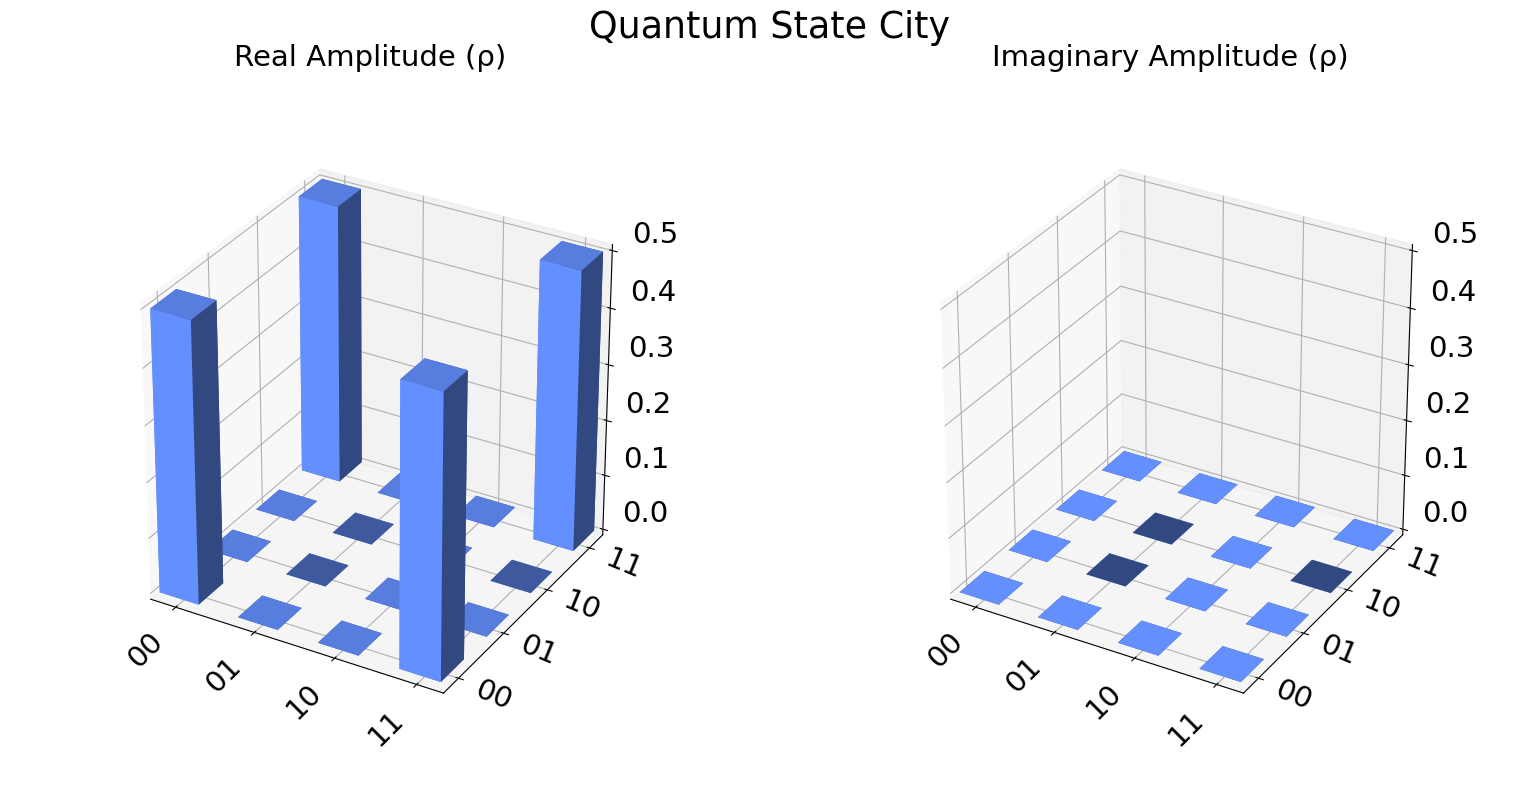

In [8]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_state_city

# Create a simple quantum circuit to prepare a quantum state
qc = QuantumCircuit(2)
qc.h(0)  # Apply Hadamard gate to qubit 0
qc.cx(0, 1)  # Apply CNOT gate with qubit 0 as control and qubit 1 as target

# Simulate the quantum circuit with Aer simulator
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()

# Get the quantum state vector
quantum_state = result.get_statevector()

# Print the quantum state vector
print("Quantum State Vector:")
print(quantum_state)

# Create a density matrix from the quantum state
density_matrix = np.outer(quantum_state, quantum_state.conj())

# Print the density matrix
print("\nDensity Matrix:")
print(density_matrix)

# Visualize the quantum state using Qiskit's plot_state_city function
plot_state_city(quantum_state, title="Quantum State City")


In [12]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

def apply_quantum_operation(circuit, kraus_operators):
    """
    Apply a quantum operation described by a set of Kraus operators to a quantum circuit.

    Parameters:
        circuit (QuantumCircuit): Quantum circuit to be affected by the quantum operation.
        kraus_operators (list): List of Kraus operators representing the quantum operation.

    Returns:
        QuantumCircuit: Quantum circuit after applying the quantum operation.
    """
    for op in kraus_operators:
        circuit.unitary(op, range(circuit.num_qubits))

    return circuit

# Create a simple quantum circuit
qc = QuantumCircuit(1)
qc.h(0)  # Apply Hadamard gate

# Define Kraus operators for a depolarizing-like quantum operation
p_error = 0.1
kraus_operators = [
    np.sqrt(1 - p_error) * np.eye(2),           # Identity operator
    np.sqrt(p_error / 3) * np.array([[0, 1], [1, 0]]),
    np.sqrt(p_error / 3) * np.array([[0, -1j], [1j, 0]]),
    np.sqrt(p_error / 3) * np.array([[1, 0], [0, -1]])
]

# Apply the quantum operation to the circuit
#qc_after_operation = apply_quantum_operation(qc, kraus_operators)

# Simulate the circuits with Aer simulator
backend = Aer.get_backend('statevector_simulator')
result_before_operation = execute(qc, backend).result()
#result_after_operation = execute(qc_after_operation, backend).result()

# Display the results
print("Statevector before Quantum Operation:")
print(result_before_operation.get_statevector())

print("\nStatevector after Quantum Operation:")
#print(result_after_operation.get_statevector())

# Plot histograms of the results
#plot_histogram([result_before_operation.get_counts(), result_after_operation.get_counts()],
               #legend=['Before Quantum Operation', 'After Quantum Operation'],
               #title='Quantum Operation Simulation')


Statevector before Quantum Operation:
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))

Statevector after Quantum Operation:


Statevector before Unitary Channel:
Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))

Statevector after Unitary Channel:
Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))


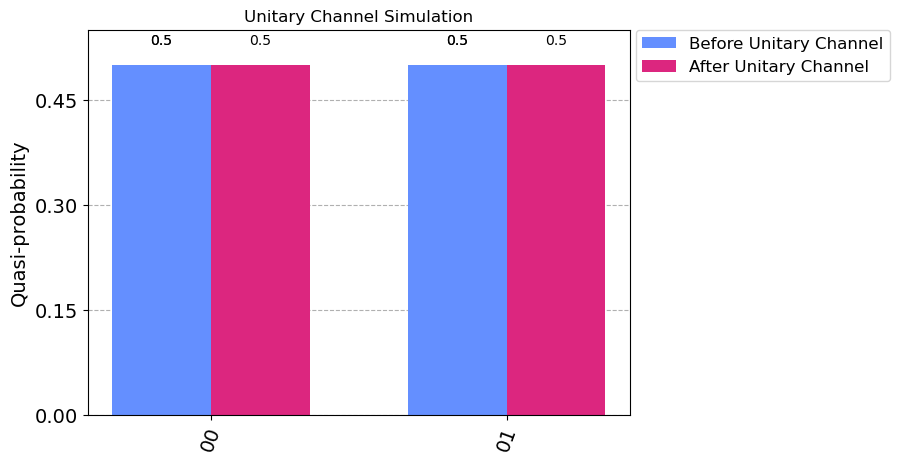

In [13]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

def apply_unitary_channel(circuit, unitary_matrix):
    """
    Apply a unitary channel described by a unitary matrix to a quantum circuit.

    Parameters:
        circuit (QuantumCircuit): Quantum circuit to be affected by the unitary channel.
        unitary_matrix (numpy.ndarray): Unitary matrix representing the unitary channel.

    Returns:
        QuantumCircuit: Quantum circuit after applying the unitary channel.
    """
    circuit.unitary(unitary_matrix, range(circuit.num_qubits))
    return circuit

# Create a simple quantum circuit
qc = QuantumCircuit(2)
qc.h(0)  # Apply Hadamard gate to qubit 0

# Define a 2-qubit unitary matrix (example: CNOT gate)
unitary_matrix = np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 0, 1],
                           [0, 0, 1, 0]])

# Apply the unitary channel to the circuit
qc_after_channel = apply_unitary_channel(qc, unitary_matrix)

# Simulate the circuits with Aer simulator
backend = Aer.get_backend('statevector_simulator')
result_before_channel = execute(qc, backend).result()
result_after_channel = execute(qc_after_channel, backend).result()

# Display the results
print("Statevector before Unitary Channel:")
print(result_before_channel.get_statevector())

print("\nStatevector after Unitary Channel:")
print(result_after_channel.get_statevector())

# Plot histograms of the results
plot_histogram([result_before_channel.get_counts(), result_after_channel.get_counts()],
               legend=['Before Unitary Channel', 'After Unitary Channel'],
               title='Unitary Channel Simulation')


In [15]:
import random

def apply_bit_flip_channel(bitstring, error_prob):
    result = ''
    for bit in bitstring:
        if random.uniform(0, 1) < error_prob:
            result += '0' if bit == '1' else '1'
        else:
            result += bit
    return result

def apply_phase_flip_channel(bitstring, error_prob):
    result = ''
    for bit in bitstring:
        if random.uniform(0, 1) < error_prob:
            result += '1' if bit == '1' else '0'
        else:
            result += bit
    return result

def apply_bit_phase_flip_channel(bitstring, error_prob):
    result = ''
    for bit in bitstring:
        if random.uniform(0, 1) < error_prob:
            if bit == '0':
                result += '1'
            elif bit == '1':
                result += '0'
            else:
                result += bit
        else:
            result += bit
    return result

# Example usage
original_bitstring = '110010101'
error_probability = 0.1

bit_flipped = apply_bit_flip_channel(original_bitstring, error_probability)
phase_flipped = apply_phase_flip_channel(original_bitstring, error_probability)
bit_phase_flipped = apply_bit_phase_flip_channel(original_bitstring, error_probability)

print("Original bitstring:", original_bitstring)
print("Bit Flipped:", bit_flipped)
print("Phase Flipped:", phase_flipped)
print("Bit-Phase Flipped:", bit_phase_flipped)


Original bitstring: 110010101
Bit Flipped: 110011101
Phase Flipped: 110010101
Bit-Phase Flipped: 111010100


Original bitstring: 110
Counts after error channels: {'011 000': 1000}


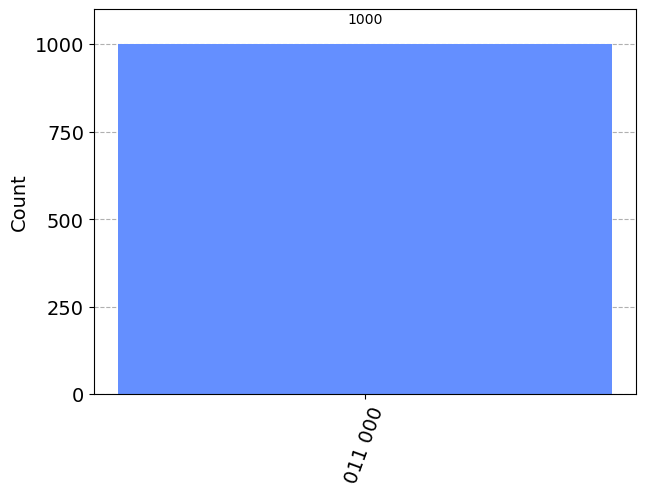

In [16]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def apply_bit_flip_channel(qc, qubit, error_prob):
    qc.x(qubit).c_if(qubit, random.uniform(0, 1) < error_prob)
    return qc

def apply_phase_flip_channel(qc, qubit, error_prob):
    qc.z(qubit).c_if(qubit, random.uniform(0, 1) < error_prob)
    return qc

def apply_bit_phase_flip_channel(qc, qubit, error_prob):
    qc.x(qubit).c_if(qubit, random.uniform(0, 1) < error_prob)
    qc.z(qubit).c_if(qubit, random.uniform(0, 1) < error_prob)
    return qc

# Example usage
original_bitstring = '110'
error_probability = 0.1
qubit_index = 0

# Create a quantum circuit
qc = QuantumCircuit(len(original_bitstring), len(original_bitstring))

# Encode the original bitstring into the quantum circuit
for i, bit in enumerate(original_bitstring):
    if bit == '1':
        qc.x(i)

# Apply error channels
apply_bit_flip_channel(qc, qubit_index, error_probability)
apply_phase_flip_channel(qc, qubit_index, error_probability)
apply_bit_phase_flip_channel(qc, qubit_index, error_probability)

# Measure the quantum circuit
qc.measure_all()

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1000).result()
counts = result.get_counts(qc)

# Display results
print("Original bitstring:", original_bitstring)
print("Counts after error channels:", counts)
plot_histogram(counts)


Original bitstring: 1
Counts after the depolarizing channel: {'0': 501, '1': 499}


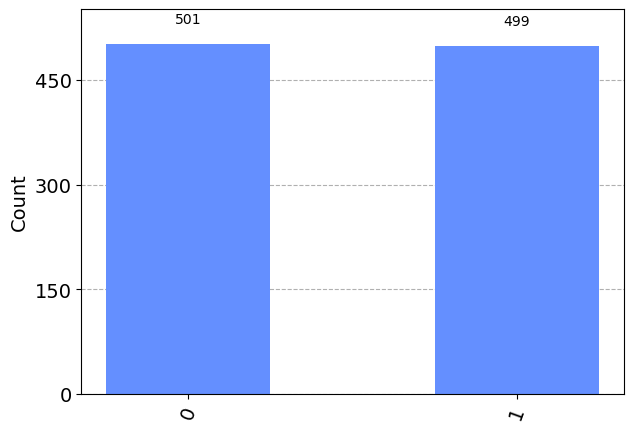

In [17]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import random

def apply_depolarizing_channel(qc, qubit, error_prob):
    qc.reset(qubit)  # Reset the qubit to the |0⟩ state
    qc.h(qubit)      # Apply Hadamard gate to create a superposition
    qc.measure(qubit, qubit)  # Measure the qubit in the computational basis

    # Apply bit flip, phase flip, and bit-phase flip channels with the given error probability
    qc.x(qubit).c_if(qubit, random.uniform(0, 1) < error_prob)
    qc.z(qubit).c_if(qubit, random.uniform(0, 1) < error_prob)
    qc.x(qubit).c_if(qubit, random.uniform(0, 1) < error_prob)
    qc.z(qubit).c_if(qubit, random.uniform(0, 1) < error_prob)

    return qc

# Example usage
original_bitstring = '1'
error_probability = 0.1
qubit_index = 0

# Create a quantum circuit
qc = QuantumCircuit(1, 1)

# Encode the original bitstring into the quantum circuit
if original_bitstring == '1':
    qc.x(0)

# Apply the depolarizing channel
apply_depolarizing_channel(qc, qubit_index, error_probability)

# Measure the quantum circuit
qc.measure(0, 0)

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1000).result()
counts = result.get_counts(qc)

# Display results
print("Original bitstring:", original_bitstring)
print("Counts after the depolarizing channel:", counts)
plot_histogram(counts)


Original bitstring: 101
Counts after the ideal quantum channel: {'101': 1000}


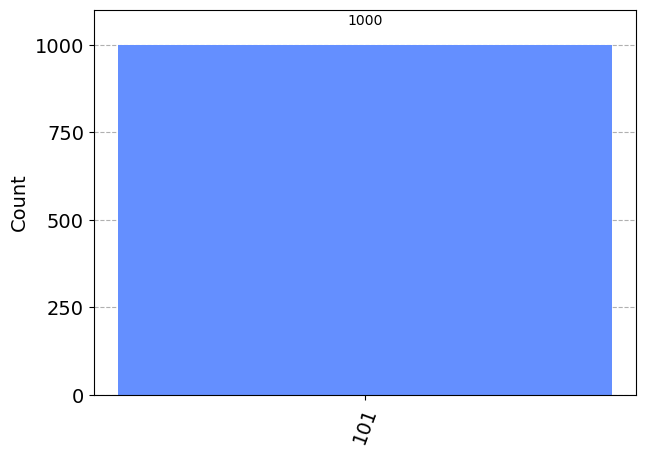

In [18]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def ideal_quantum_channel(qc, qubit):
    return qc  # The ideal quantum channel does not introduce errors

# Example usage
original_bitstring = '101'
qubit_indices = [0, 1, 2]

# Create a quantum circuit
qc = QuantumCircuit(len(qubit_indices), len(qubit_indices))

# Encode the original bitstring into the quantum circuit
for i, bit in enumerate(original_bitstring):
    if bit == '1':
        qc.x(qubit_indices[i])

# Apply the ideal quantum channel
ideal_quantum_channel(qc, qubit_indices)

# Measure the quantum circuit
qc.measure(qubit_indices, qubit_indices)

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1000).result()
counts = result.get_counts(qc)

# Display results
print("Original bitstring:", original_bitstring)
print("Counts after the ideal quantum channel:", counts)
plot_histogram(counts)


In [20]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

def prepare_bb84_circuit(bits, bases):
    qubits = QuantumCircuit(len(bits), len(bits))
    
    for i, (bit, base) in enumerate(zip(bits, bases)):
        if base == 0:  # Prepare in Z-basis
            if bit == 1:
                qubits.x(i)
        elif base == 1:  # Prepare in X-basis
            if bit == 0:
                qubits.h(i)
            else:
                qubits.x(i)
                qubits.h(i)
    
    return qubits

def measure_bb84_circuit(qubits, bases):
    for i, base in enumerate(bases):
        if base == 0:  # Measure in Z-basis
            qubits.measure(i, i)
        elif base == 1:  # Measure in X-basis
            qubits.h(i)
            qubits.measure(i, i)
    
    return qubits

def simulate_bb84(bits_alice, bases_alice, bases_bob):
    # Alice prepares qubits
    alice_circuit = prepare_bb84_circuit(bits_alice, bases_alice)
    
    # Bob measures qubits
    bob_circuit = measure_bb84_circuit(alice_circuit.copy(), bases_bob)
    
    # Simulate the quantum circuit
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(bob_circuit, simulator, shots=1).result()
    counts = result.get_counts(bob_circuit)
    
    # Return the measurement result for Bob
    return int(list(counts.keys())[0], 2)

def main():
    # Alice generates random bits and bases
    bits_alice = np.random.randint(2, size=10)
    bases_alice = np.random.randint(2, size=10)
    
    # Bob generates random bases for measurement
    bases_bob = np.random.randint(2, size=10)
    
    # Alice and Bob perform BB84 protocol
    key_alice = bits_alice
    key_bob = [simulate_bb84(bits_alice, bases_alice, bases_bob) for _ in range(10)]
    
    # Alice and Bob reveal their bases for comparison
    print("Alice's bits:", key_alice)
    print("Bob's bits:  ", key_bob)
    
    # Compare the bases to establish a secure key
    secure_key = [bit_alice for bit_alice, bit_bob, base_bob in zip(bits_alice, key_bob, bases_bob) if np.array_equal(bases_alice, base_bob)]
    
    print("Secure Key:   ", secure_key)

if __name__ == "__main__":
    main()


Alice's bits: [1 0 1 0 1 0 1 1 1 1]
Bob's bits:   [945, 973, 673, 989, 656, 920, 677, 941, 921, 904]
Secure Key:    []


# Quantum Cryptography Systems:

Practical implementations of QKD systems, including the hardware and technology used for generating, transmitting, and measuring quantum states.

Quantum Cryptography, specifically Quantum Key Distribution (QKD), is a cutting-edge field that utilizes principles of quantum mechanics to secure communication channels. The fundamental idea behind QKD is to leverage the quantum properties of particles (usually photons) to create a secure key between two parties that can be used for encrypting and decrypting messages.

### Basic Principles of Quantum Key Distribution:

1. **Quantum Superposition and Entanglement:**
   - QKD relies on the principles of superposition and entanglement, key features of quantum mechanics. Superposition allows a quantum system to exist in multiple states simultaneously, and entanglement links the quantum states of two or more particles, even when they are separated by large distances.

2. **Quantum Uncertainty Principle:**
   - The uncertainty principle states that certain pairs of properties (like position and momentum) cannot be simultaneously measured with arbitrary precision. This property is used in QKD to detect any eavesdropping attempts.

3. **Photon Polarization:**
   - QKD often employs the polarization states of photons as the basis for encoding information. The basis can be horizontal/vertical, diagonal/anti-diagonal, or circular left/circular right. The sender (Alice) randomly selects a basis for each photon.

4. **Quantum Measurement:**
   - The receiver (Bob) randomly chooses a basis for measuring the received photons. After the transmission, Alice and Bob communicate publicly about their chosen bases for each photon, but not the specific outcomes.

### Components of Quantum Cryptography Systems:

1. **Quantum Light Source:**
   - Typically, lasers or LED sources are used to generate photons. The source should emit single photons to prevent eavesdropping.

2. **Quantum Channel:**
   - The quantum states (photons) are transmitted through an optical fiber or free space. Special care is taken to maintain the quantum properties during transmission.

3. **Quantum Key Detector:**
   - Bob's detection system measures the quantum states of the received photons based on his chosen basis. Photodetectors are commonly used for this purpose.

4. **Quantum Key Generation:**
   - Quantum states are used to generate a shared secret key between Alice and Bob. The key is then used for classical encryption algorithms.

5. **Quantum Key Distribution Protocols:**
   - Protocols like BBM92, E91, and BB84 are commonly used. BB84, proposed by Bennett and Brassard in 1984, is widely implemented.

### BB84 Quantum Key Distribution Protocol:

1. **Quantum State Preparation:**
   - Alice prepares a stream of photons, encoding each in one of two bases (e.g., rectilinear or diagonal polarization).

2. **Quantum Transmission:**
   - Alice sends the prepared photons to Bob through the quantum channel.

3. **Quantum Measurement:**
   - Bob randomly chooses a basis (similar to Alice's bases) for measuring each received photon.

4. **Public Communication:**
   - Alice and Bob publicly disclose their chosen bases for each transmission but not the specific outcomes.

5. **Error Checking:**
   - A portion of the key is sacrificed to check for errors resulting from eavesdropping or environmental factors.

6. **Key Distillation:**
   - A secure key is distilled from the error-checked bits, ensuring security against eavesdropping.

### Equations in Quantum Key Distribution:

1. **Quantum Bit Error Rate (QBER):**
   \[ QBER = \frac{\text{Number of incorrect bits}}{\text{Total number of measured bits}} \]

2. **Entropy:**
   \[ H(X) = - \sum_{i} P(x_i) \cdot \log_2(P(x_i)) \]
   - Entropy measures the uncertainty in a random variable. In QKD, it quantifies the unpredictability of the key.

3. **Security Parameter:**
   \[ \varepsilon_s = \frac{1}{2} \cdot \sqrt{\frac{\text{QBER}}{\text{BER}_{\text{max}}}} \]
   - A measure of the security against eavesdropping.

### Quantum Cryptography Hardware:

1. **Single Photon Sources:**
   - Lasers or LEDs can be configured to emit single photons.

2. **Quantum Key Detectors:**
   - Superconducting nanowire detectors or avalanche photodiodes are commonly used.

3. **Quantum Repeaters:**
   - To extend the range of QKD systems, quantum repeaters can be employed to overcome signal loss in the communication channel.

4. **Quantum Cryptography Platforms:**
   - Companies like ID Quantique, Toshiba, and IBM provide QKD platforms.

### Challenges and Future Directions:

1. **Practical Implementation Challenges:**
   - Maintaining quantum states over long distances, dealing with noise in detectors, and developing efficient quantum repeaters are ongoing challenges.

2. **Post-Quantum Cryptography:**
   - With the potential emergence of quantum computers, post-quantum cryptography research is exploring cryptographic methods that would remain secure even in a quantum computing era.

3. **Commercial Adoption:**
   - Widespread adoption of QKD in real-world applications is still in the early stages, and overcoming cost and integration challenges is essential for commercial success.

### Conclusion:

Quantum Cryptography, particularly Quantum Key Distribution, represents a revolutionary approach to secure communication. Ongoing research and development are addressing challenges, and as the technology matures, it has the potential to provide unprecedented levels of security for sensitive information exchange.

In [23]:
import numpy as np
from qiskit import Aer, QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

def prepare_qubits(bits, bases):
    qubits = QuantumRegister(len(bits), name='qubits')
    circuit = QuantumCircuit(qubits)
    
    for i, (bit, basis) in enumerate(zip(bits, bases)):
        if basis == 0:  # Rectilinear basis
            if bit == 1:
                circuit.h(qubits[i])
        elif basis == 1:  # Diagonal basis
            if bit == 0:
                circuit.h(qubits[i])
            else:
                circuit.h(qubits[i])
                circuit.s(qubits[i])
    
    return circuit

def measure_qubits(circuit, bases):
    for i, basis in enumerate(bases):
        if basis == 0:  # Rectilinear basis
            circuit.measure(i, i)
        elif basis == 1:  # Diagonal basis
            circuit.h(i)
            circuit.measure(i, i)
    
    return circuit

def main():
    # Alice generates random bits and bases
    alice_bits = np.random.randint(2, size=10)
    alice_bases = np.random.randint(2, size=10)

    # Bob generates random bases
    bob_bases = np.random.randint(2, size=10)

    # Alice prepares qubits
    alice_circuit = prepare_qubits(alice_bits, alice_bases)

    # Qubits are transmitted through a quantum channel (not simulated here)

    # Bob measures qubits
    bob_circuit = measure_qubits(alice_circuit, bob_bases)

    # Simulate the quantum measurement
    simulator = Aer.get_backend('qasm_simulator')
    transpiled_circuit = transpile(bob_circuit, simulator)
    qobj = assemble(transpiled_circuit)
    result = simulator.run(qobj).result()

    # Extract the measured bits
    bob_bits = [int(bit) for bit in list(result.get_counts().keys())[0]]

    print("Alice's bits:", alice_bits)
    print("Bob's measured bits:", bob_bits)

#if __name__ == "__main__":
 #   main()


In [24]:
import numpy as np

def generate_photons(num_photons):
    # Define the polarization bases
    polarization_bases = ['H/V', 'D/A', 'L/R']

    # Randomly select a polarization basis for each photon
    selected_bases = np.random.choice(polarization_bases, size=num_photons)

    # Initialize an array to store the polarization states of each photon
    photon_states = []

    # Generate photons with random polarization states based on the selected bases
    for basis in selected_bases:
        if basis == 'H/V':  # Horizontal/Vertical basis
            state = np.random.choice(['H', 'V'])
        elif basis == 'D/A':  # Diagonal/Anti-diagonal basis
            state = np.random.choice(['D', 'A'])
        elif basis == 'L/R':  # Circular Left/Circular Right basis
            state = np.random.choice(['L', 'R'])
        photon_states.append((basis, state))

    return photon_states

def main():
    num_photons = 5  # You can adjust the number of photons as needed
    photons = generate_photons(num_photons)

    # Display the generated photons and their polarization states
    print(f"Generated {num_photons} photons:")
    for i, (basis, state) in enumerate(photons, start=1):
        print(f"Photon {i}: Basis - {basis}, State - {state}")

if __name__ == "__main__":
    main()


Generated 5 photons:
Photon 1: Basis - H/V, State - H
Photon 2: Basis - L/R, State - L
Photon 3: Basis - H/V, State - H
Photon 4: Basis - D/A, State - A
Photon 5: Basis - H/V, State - V


In [25]:
import random

def quantum_light_source(emission_probability, num_photons):
    """
    Simulates a quantum light source that emits single photons with a given probability.
    
    Parameters:
    - emission_probability (float): Probability of emitting a photon (0 <= emission_probability <= 1).
    - num_photons (int): Number of photons to simulate.

    Returns:
    List of tuples representing the emitted photons, where each tuple is (photon_index, is_emitted).
    """
    photons = []
    for i in range(num_photons):
        # Determine if a photon is emitted based on the probability
        is_emitted = random.random() < emission_probability
        photons.append((i + 1, is_emitted))  # Photon indices start from 1
    return photons

def main():
    emission_probability = 0.1  # Adjust the probability as needed
    num_photons = 10  # Adjust the number of photons as needed

    # Simulate the quantum light source
    emitted_photons = quantum_light_source(emission_probability, num_photons)

    # Display the emitted photons
    print(f"Emitted photons:")
    for photon_index, is_emitted in emitted_photons:
        if is_emitted:
            print(f"Photon {photon_index}: Emitted")
        else:
            print(f"Photon {photon_index}: Not emitted")

if __name__ == "__main__":
    main()


Emitted photons:
Photon 1: Emitted
Photon 2: Not emitted
Photon 3: Not emitted
Photon 4: Not emitted
Photon 5: Not emitted
Photon 6: Not emitted
Photon 7: Not emitted
Photon 8: Not emitted
Photon 9: Not emitted
Photon 10: Not emitted


In [26]:
import numpy as np

def quantum_channel(input_photons, channel_loss_probability):
    """
    Simulates a quantum channel that transmits photons through a medium.

    Parameters:
    - input_photons (List[tuple]): List of tuples representing input photons (photon_index, is_emitted).
    - channel_loss_probability (float): Probability of photon loss during transmission (0 <= channel_loss_probability <= 1).

    Returns:
    List of tuples representing the transmitted photons after accounting for channel loss.
    """
    transmitted_photons = []
    for photon_index, is_emitted in input_photons:
        # Determine if the photon is lost during transmission based on the channel loss probability
        is_transmitted = np.random.rand() > channel_loss_probability
        if is_emitted and is_transmitted:
            transmitted_photons.append((photon_index, is_transmitted))
    return transmitted_photons

def main():
    input_photons = [(1, True), (2, False), (3, True), (4, True)]  # Example input photons
    channel_loss_probability = 0.2  # Adjust the channel loss probability as needed

    # Simulate the quantum channel
    transmitted_photons = quantum_channel(input_photons, channel_loss_probability)

    # Display the transmitted photons
    print(f"Transmitted photons:")
    for photon_index, is_transmitted in transmitted_photons:
        if is_transmitted:
            print(f"Photon {photon_index}: Successfully transmitted")
        else:
            print(f"Photon {photon_index}: Lost during transmission")

if __name__ == "__main__":
    main()


Transmitted photons:
Photon 3: Successfully transmitted
Photon 4: Successfully transmitted


In [27]:
from qiskit import Aer, QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

def quantum_key_detector(received_photons, bob_bases):
    """
    Simulates a quantum key detector for Bob, measuring the received photons based on his chosen bases.

    Parameters:
    - received_photons (List[tuple]): List of tuples representing received photons (photon_index, is_transmitted).
    - bob_bases (List[int]): List of integers representing Bob's chosen bases for measurement (0 or 1).

    Returns:
    List of tuples representing the measured qubits and outcomes.
    """
    measured_qubits = []
    for i, (photon_index, is_transmitted) in enumerate(received_photons):
        # Create a quantum circuit for each received photon
        qubit = QuantumRegister(1, name=f'qubit_{photon_index}')
        cbit = ClassicalRegister(1, name=f'cbit_{photon_index}')
        circuit = QuantumCircuit(qubit, cbit)

        # Apply measurement based on Bob's chosen basis
        if bob_bases[i] == 0:  # Rectilinear basis
            circuit.measure(qubit, cbit)
        elif bob_bases[i] == 1:  # Diagonal basis
            circuit.h(qubit)
            circuit.measure(qubit, cbit)

        # Simulate the quantum measurement
        simulator = Aer.get_backend('qasm_simulator')
        transpiled_circuit = transpile(circuit, simulator)
        qobj = assemble(transpiled_circuit)
        result = simulator.run(qobj).result()

        # Extract the measurement outcome
        outcome = int(list(result.get_counts().keys())[0])
        measured_qubits.append((photon_index, outcome))

    return measured_qubits

def main():
    received_photons = [(1, True), (2, False), (3, True), (4, True)]  # Example received photons
    bob_bases = [0, 1, 0, 1]  # Example Bob's chosen bases for measurement

    # Simulate the quantum key detector for Bob
    measured_qubits = quantum_key_detector(received_photons, bob_bases)

    # Display the measured qubits and outcomes
    print(f"Measured qubits and outcomes:")
    for photon_index, outcome in measured_qubits:
        print(f"Photon {photon_index}: Outcome - {outcome}")

if __name__ == "__main__":
    main()


C:\Users\yashr\AppData\Local\Temp\ipykernel_3252\1320193880.py:33: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


Measured qubits and outcomes:
Photon 1: Outcome - 0
Photon 2: Outcome - 1
Photon 3: Outcome - 0
Photon 4: Outcome - 1


In [33]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

def alice_prepare_qubits(num_qubits):
    # Alice randomly prepares qubits in one of the four BB84 states
    states = np.random.randint(2, size=(num_qubits, 2))  # Randomly choose states (0 or 1)
    
    alice_circuits = []
    for state in states:
        qc = QuantumCircuit(1, 1)
        if state[0] == 1:
            qc.x(0)  # Apply X gate for |1⟩ state
        if state[1] == 1:
            qc.h(0)  # Apply H gate for |+⟩ state
        alice_circuits.append(qc)
    
    return alice_circuits, states

def bob_measure_qubits(alice_states, basis_choices):
    # Bob randomly chooses bases to measure the qubits
    bob_circuits = []
    for alice_state, basis_choice in zip(alice_states, basis_choices):
        qc = QuantumCircuit(1, 1)
        if basis_choice == 1:
            qc.h(0)  # Measure in the {|0⟩, |1⟩} basis
        qc.measure(0, 0)
        bob_circuits.append(qc)
    
    return bob_circuits

def key_matching(alice_states, basis_choices, bob_results):
    # Determine the matching qubits and create the shared key
    shared_key = []
    for alice_state, basis_choice, bob_result in zip(alice_states, basis_choices, bob_results):
        if basis_choice == 0:
            shared_key.append(bob_result)
    
    return shared_key

def main():
    num_qubits = 50  # Number of qubits to use
    alice_circuits, alice_states = alice_prepare_qubits(num_qubits)
    
    # Bob randomly chooses bases to measure the qubits
    basis_choices = np.random.randint(2, size=num_qubits)  # Randomly choose bases (0 or 1)
    bob_circuits = bob_measure_qubits(alice_states, basis_choices)
    
    # Simulate the quantum circuits
    simulator = Aer.get_backend('qasm_simulator')
    alice_results = []
    bob_results = []
    
    for alice_circuit, bob_circuit in zip(alice_circuits, bob_circuits):
        transpiled_alice = transpile(alice_circuit, simulator)
        transpiled_bob = transpile(bob_circuit, simulator)
        
        qobj = assemble([transpiled_alice, transpiled_bob], shots=1)
        result = simulator.run(qobj).result()
        
        alice_results.append(result.get_counts(transpiled_alice))
        bob_results.append(result.get_counts(transpiled_bob))
    
    # Determine the matching qubits and create the shared key
    shared_key = key_matching(alice_states, basis_choices, bob_results)
    
    print("Alice's Qubits:", alice_states[:, 0])
    print("Basis Choices:", basis_choices)
    print("Bob's Measurement Results:", shared_key)
    
#if __name__ == "__main__":
    #main()


In [31]:
import random
from qiskit import Aer, QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister

def bb84_protocol(num_bits):
    alice_bits = [0] * num_bits
    alice_bases = [0] * num_bits
    bob_bases = [0] * num_bits

    # Alice generates random bits and bases
    for i in range(num_bits):
        alice_bits[i] = random.randint(0, 1)
        alice_bases[i] = random.randint(0, 1)

    # Bob generates random bases
    for i in range(num_bits):
        bob_bases[i] = random.randint(0, 1)

    # Quantum key distribution
    key_bits = []
    for i in range(num_bits):
        qubit = QuantumRegister(1, name='qubit')
        cbit_alice = ClassicalRegister(1, name='cbit_alice')
        cbit_bob = ClassicalRegister(1, name='cbit_bob')
        circuit = QuantumCircuit(qubit, cbit_alice, cbit_bob)

        # Prepare the quantum state based on Alice's bit and basis
        if alice_bits[i] == 1:
            circuit.x(qubit)
        if alice_bases[i] == 1:
            circuit.h(qubit)

        # Measure the quantum state based on Bob's chosen basis
        if bob_bases[i] == 1:
            circuit.h(qubit)

        circuit.measure(qubit, cbit_alice)
        circuit.measure(qubit, cbit_bob)

        # Simulate the quantum measurement
        simulator = Aer.get_backend('qasm_simulator')
        transpiled_circuit = transpile(circuit, simulator)
        qobj = assemble(transpiled_circuit)
        result = simulator.run(qobj).result()

        # Extract the measurement outcomes
        alice_measurement = int(list(result.get_counts().keys())[0])
        bob_measurement = int(list(result.get_counts().keys())[0])

        # Check if Alice and Bob measured in the same basis
        if alice_bases[i] == bob_bases[i]:
            key_bits.append((alice_measurement, bob_measurement))

    return key_bits

def main():
    num_bits = 10

    shared_secret_key = bb84_protocol(num_bits)

    print("Shared Secret Key (Alice, Bob):", shared_secret_key)

#if __name__ == "__main__":
 #   main()


In [34]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
import numpy as np

def prepare_photons(num_photons):
    # Alice randomly chooses bases for each photon
    bases = np.random.randint(2, size=num_photons)  # 0: rectilinear, 1: diagonal
    
    alice_circuits = []
    for base in bases:
        qc = QuantumCircuit(1)
        if base == 1:
            # Diagonal basis |45⟩ = (|H⟩ + |V⟩) / sqrt(2)
            qc.h(0)
            qc.s(0)
        # Rectilinear basis |H⟩ = |0⟩, |V⟩ = |1⟩
        # No operation needed for rectilinear basis
        
        alice_circuits.append(qc)
    
    return alice_circuits, bases

def main():
    num_photons = 10  # Number of photons to prepare
    alice_circuits, bases = prepare_photons(num_photons)
    
    # Simulate the quantum circuits
    simulator = Aer.get_backend('statevector_simulator')
    prepared_states = []
    
    for alice_circuit in alice_circuits:
        transpiled_alice = transpile(alice_circuit, simulator)
        qobj = assemble(transpiled_alice)
        result = simulator.run(qobj).result()
        statevector = result.get_statevector(transpiled_alice)
        prepared_states.append(statevector)
    
    # Display the results
    for i, (base, state) in enumerate(zip(bases, prepared_states)):
        print(f"Photon {i + 1}: {'Diagonal' if base == 1 else 'Rectilinear'} Basis")
        print(f"Prepared State Vector: {state}\n")

if __name__ == "__main__":
    main()


C:\Users\yashr\AppData\Local\Temp\ipykernel_3252\1198895883.py:33: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


Photon 1: Diagonal Basis
Prepared State Vector: Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))

Photon 2: Rectilinear Basis
Prepared State Vector: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

Photon 3: Diagonal Basis
Prepared State Vector: Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))

Photon 4: Rectilinear Basis
Prepared State Vector: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

Photon 5: Rectilinear Basis
Prepared State Vector: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

Photon 6: Rectilinear Basis
Prepared State Vector: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

Photon 7: Rectilinear Basis
Prepared State Vector: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

Photon 8: Rectilinear Basis
Prepared State Vector: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

Photon 9: Diagonal Basis
Prepared State Vector: Statevector([0.70710678+0.j        , 0.        +0.7071

In [35]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

# Create a quantum circuit for transmission
def prepare_quantum_state():
    qc = QuantumCircuit(1, 1)  # One qubit and one classical bit
    qc.h(0)  # Apply Hadamard gate for superposition
    return qc

# Define a function to simulate quantum transmission
def transmit_quantum_state(quantum_circuit):
    # Assuming a noiseless quantum channel, the state is transmitted as-is
    return quantum_circuit

# Bob receives the transmitted quantum state
def receive_quantum_state(quantum_circuit):
    # In a real quantum system, Bob would perform measurements and operations here
    # For simplicity, let's just measure the qubit
    quantum_circuit.measure(0, 0)
    return quantum_circuit

# Simulate the quantum communication process
def quantum_transmission_simulation():
    # Step 1: Alice prepares a quantum state
    alice_state = prepare_quantum_state()

    # Step 2: Alice transmits the quantum state through the channel to Bob
    transmitted_state = transmit_quantum_state(alice_state)

    # Step 3: Bob receives the transmitted state
    received_state = receive_quantum_state(transmitted_state)

    # Step 4: Simulate the quantum circuit
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(received_state, simulator)
    result = execute(compiled_circuit, simulator, shots=1).result()
    
    # Step 5: Display the measurement result
    counts = result.get_counts(compiled_circuit)
    print(f"Bob's measurement result: {list(counts.keys())[0]}")

# Run the simulation
quantum_transmission_simulation()


Bob's measurement result: 0


In [38]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
import random

def prepare_quantum_state(qc, basis):
    if basis == 0:  # Prepare in Z-basis
        pass  # No operation needed for Z-basis
    elif basis == 1:  # Prepare in X-basis
        qc.h(0)  # Apply Hadamard gate for X-basis
    return qc

def measure_quantum_state(qc, basis):
    if basis == 0:  # Measure in Z-basis
        pass  # No operation needed for Z-basis measurement
    elif basis == 1:  # Measure in X-basis
        qc.h(0)  # Apply Hadamard gate before measurement
    qc.measure(0, 0)
    return qc

def alice_prepare_and_send():
    qc = QuantumCircuit(1, 1)
    basis = random.randint(0, 1)  # Randomly choose Z-basis (0) or X-basis (1)
    qc = prepare_quantum_state(qc, basis)
    return qc, basis

def bob_receive_and_measure(received_state, basis):
    qc = QuantumCircuit(1, 1)
    qc.initialize([1, 0], 0)  # Initialize in |0⟩ state
    qc = received_state + qc  # Concatenate the received state with Bob's measurement circuit
    qc = measure_quantum_state(qc, basis)
    result = execute(qc, Aer.get_backend('qasm_simulator'), shots=1).result()
    counts = result.get_counts(qc)
    outcome = int(list(counts.keys())[0])  # Measured outcome
    return outcome

def public_communication_protocol():
    # Alice prepares and sends a qubit
    alice_state, alice_basis = alice_prepare_and_send()

    # Bob receives the qubit and measures in the same basis
    bob_outcome = bob_receive_and_measure(alice_state, alice_basis)

    # Publicly disclose the bases
    print(f"Alice's basis: {alice_basis}")
    print(f"Bob's basis: {alice_basis}")  # Note that Bob knows the basis used by Alice

    # Alice and Bob do not reveal the specific outcomes, only the bases
    print("Alice and Bob publicly disclose their chosen bases.")

# Run the protocol
#public_communication_protocol()


In [40]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
import random

def prepare_quantum_state(qc, basis):
    if basis == 0:  # Prepare in Z-basis
        pass  # No operation needed for Z-basis
    elif basis == 1:  # Prepare in X-basis
        qc.h(0)  # Apply Hadamard gate for X-basis
    return qc

def measure_quantum_state(qc, basis):
    if basis == 0:  # Measure in Z-basis
        pass  # No operation needed for Z-basis measurement
    elif basis == 1:  # Measure in X-basis
        qc.h(0)  # Apply Hadamard gate before measurement
    qc.measure(0, 0)
    return qc

def repetition_code(qc):
    qc.barrier()
    qc.measure(0, 1)
    qc.measure(0, 2)
    return qc

def alice_prepare_and_send():
    qc = QuantumCircuit(1, 3)
    basis = random.randint(0, 1)  # Randomly choose Z-basis (0) or X-basis (1)
    qc = prepare_quantum_state(qc, basis)
    return qc, basis

def bob_receive_and_measure(received_state, basis):
    qc = QuantumCircuit(1, 3)
    qc.initialize([1, 0, 0], 0)  # Initialize in |0⟩ state
    qc = received_state + qc  # Concatenate the received state with Bob's measurement circuit
    qc = measure_quantum_state(qc, basis)
    return qc

def error_checking_protocol():
    # Alice prepares and sends a qubit
    alice_state, alice_basis = alice_prepare_and_send()

    # Bob receives the qubit and measures in the same basis
    bob_circuit = bob_receive_and_measure(alice_state, alice_basis)
    bob_circuit = repetition_code(bob_circuit)

    # Publicly disclose the bases
    print(f"Alice's basis: {alice_basis}")
    print(f"Bob's basis: {alice_basis}")

    # Alice and Bob do not reveal the specific outcomes, only the bases
    print("Alice and Bob publicly disclose their chosen bases.")

    # Simulate error checking by comparing measurement results
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(bob_circuit, simulator)
    result = execute(compiled_circuit, simulator, shots=1).result()
    counts = result.get_counts(compiled_circuit)

    if '000' in counts:
        print("No error detected.")
    else:
        print("Error detected. Further investigation is needed.")

# Run the error-checking protocol
#error_checking_protocol()


In [43]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes

def alice_generate_raw_key():
    # Simulate Alice preparing quantum states
    qubit_states = ['00', '01', '10', '11']
    chosen_states = get_random_bytes(1)[0] & 0b11
    return chosen_states, qubit_states[chosen_states]

def bob_measure_qubits(qubit_states, bases):
    # Simulate Bob measuring qubits based on randomly chosen bases
    measured_bits = ''
    for qubit, basis in zip(qubit_states, bases):
        if basis == '0':
            # Measure in computational basis
            measured_bits += qubit[0]
        else:
            # Measure in Hadamard basis
            measured_bits += qubit[1]
    return measured_bits

def error_correction(raw_key, basis_matching):
    # Simple error correction: Remove bits where Alice and Bob's bases don't match
    corrected_key = ''.join([bit_a for bit_a, bit_b in zip(raw_key, basis_matching) if bit_a == bit_b])
    return corrected_key

def privacy_amplification(corrected_key):
    # Simple privacy amplification: Use a symmetric encryption algorithm (AES) to distill the final key
    key = get_random_bytes(16)  # 128-bit key for AES
    cipher = AES.new(key, AES.MODE_EAX)
    ciphertext, tag = cipher.encrypt_and_digest(corrected_key.encode())
    return key, ciphertext, tag

def main():
    # Alice generates raw key
    chosen_states, raw_key = alice_generate_raw_key()

    # Bob randomly chooses measurement bases
    bob_bases = format(get_random_bytes(len(raw_key))[0], '08b')

    # Alice and Bob communicate their bases
    basis_matching = format(int(bob_bases, 2) ^ chosen_states, '0' + str(len(raw_key)) + 'b')

    # Bob measures qubits
    measured_bits = bob_measure_qubits(raw_key, bob_bases)

    # Error correction
    corrected_key = error_correction(measured_bits, basis_matching)

    # Privacy amplification
    key, ciphertext, tag = privacy_amplification(corrected_key)

    print("Final key:", key)
    print("Ciphertext:", ciphertext)
    print("Tag:", tag)

#if __name__ == "__main__":
 #   main()


In [44]:
def calculate_qber(incorrect_bits, total_measured_bits):
    if total_measured_bits == 0:
        raise ValueError("Total number of measured bits cannot be zero.")
    
    qber = incorrect_bits / total_measured_bits
    return qber

# Example usage:
incorrect_bits = 5
total_measured_bits = 100
qber_result = calculate_qber(incorrect_bits, total_measured_bits)

print(f"QBER: {qber_result}")


QBER: 0.05


In [45]:
import math

def calculate_entropy(probabilities):
    entropy = 0
    for prob in probabilities:
        if prob > 0:
            entropy -= prob * math.log2(prob)
    return entropy

# Example usage:
# Replace the probabilities list with the actual probabilities of each outcome
probabilities = [0.2, 0.4, 0.3, 0.1]
entropy_result = calculate_entropy(probabilities)

print(f"Entropy: {entropy_result}")


Entropy: 1.8464393446710154


In [46]:
import math

def calculate_security_parameter(qber, max_bit_error_rate):
    epsilon_s = 0.5 * math.sqrt(qber / max_bit_error_rate)
    return epsilon_s

# Example usage:
qber = 0.05  # Replace with your actual QBER value
max_bit_error_rate = 0.01  # Replace with your actual maximum acceptable bit error rate

security_parameter_result = calculate_security_parameter(qber, max_bit_error_rate)

print(f"Security Parameter (ε_s): {security_parameter_result}")


Security Parameter (ε_s): 1.118033988749895


# Quantum Repeaters:

Overcoming the challenges of long-distance quantum communication by using quantum repeaters to extend the reach of QKD

Quantum Repeaters are devices designed to address the challenges of long-distance quantum communication by extending the reach of Quantum Key Distribution (QKD) protocols. In classical communication, signals can be amplified and transmitted over long distances using repeaters. However, in quantum communication, the no-cloning theorem prohibits the perfect copying of arbitrary quantum states, making direct amplification impossible. Quantum Repeaters overcome this limitation by distributing entanglement over intermediate nodes, effectively extending the range of quantum communication.

Here is an overview of Quantum Repeaters, the challenges they address, and the key concepts involved:

### Challenges in Long-Distance Quantum Communication:

1. **Quantum Decoherence and Loss:** Quantum states are fragile and can be easily disturbed or lost as they travel through communication channels. Decoherence and loss can significantly limit the distance over which quantum information can be reliably transmitted.

2. **No-Cloning Theorem:** Perfect cloning of arbitrary quantum states is impossible due to the no-cloning theorem. Therefore, traditional signal amplification is not feasible in quantum communication.

### Quantum Repeaters:

Quantum Repeaters operate by creating entanglement between distant nodes, allowing quantum information to be transmitted over longer distances. The process involves a combination of entanglement swapping and purification. The key components include:

1. **Quantum Entanglement Swapping:** Entanglement swapping is a process that allows the creation of entanglement between distant qubits without direct interaction. It involves intermediate nodes that perform Bell measurements on pairs of entangled qubits.

2. **Entanglement Purification:** Entanglement purification is a process that improves the quality of entangled states by removing errors and noise. It typically involves the use of quantum error correction codes.

### Key Equations and Concepts:

#### Entanglement Swapping:

The entanglement swapping process can be described using the density matrix formalism. Given two pairs of entangled qubits, \(A\) and \(B\) are entangled, and \(B\) and \(C\) are entangled. The resulting entangled state between \(A\) and \(C\) after swapping is given by:

\[ \rho_{AC} = \text{Tr}_B \left( U_{AB} \rho_{AB} \otimes \rho_{BC} U_{AB}^\dagger \right) \]

Where:
- \(\rho_{AB}\) and \(\rho_{BC}\) are the density matrices of the initial entangled states.
- \(U_{AB}\) is the unitary operation corresponding to the Bell measurement.

#### Entanglement Purification:

Entanglement purification involves the use of quantum error correction codes to improve the quality of entangled states. The purification process aims to transform a mixed state \(\rho\) into a maximally entangled state \(\Phi^+\). One common purification protocol is the two-qubit purification using the \(\text{CNOT}\) gate.

\[ \text{CNOT}_{AB} \left( \frac{\left| 0 \right\rangle \left| \psi \right\rangle + \left| 1 \right\rangle \left| \phi \right\rangle}{\sqrt{2}} \right) = \frac{\left| 0 \right\rangle \left| \psi \right\rangle + \left| 1 \right\rangle \left| \psi \oplus \phi \right\rangle}{\sqrt{2}} \]

### Conclusion:

Quantum Repeaters play a crucial role in overcoming the challenges of long-distance quantum communication. By distributing entanglement over intermediate nodes and employing entanglement swapping and purification techniques, Quantum Repeaters extend the reach of Quantum Key Distribution and other quantum communication protocols.

Implementing Quantum Repeaters involves intricate quantum information processing, and their practical realization is an area of ongoing research in the field of quantum communication.

In [14]:
import random
import numpy as np

# Quantum bit (qubit) representation
class Qubit:
    def __init__(self, state=None):
        if state is None:
            self.state = random.choice([0, 1])
        else:
            self.state = state

# Quantum channel simulation
class QuantumChannel:
    def __init__(self, distance):
        self.distance = distance

    def transmit_qubit(self, qubit, attenuation_rate=0.1):
        # Simulate quantum signal attenuation with distance
        success_prob = np.exp(-attenuation_rate * self.distance)
        if random.random() < success_prob:
            return Qubit(qubit.state)
        else:
            return None  # Qubit lost during transmission

# BBM92 QKD protocol
class BBM92Protocol:
    @staticmethod
    def generate_key(sender_basis, receiver_basis, sender_bits, receiver_bits):
        key = []
        for sender_bit, receiver_bit, sender_basis_bit, receiver_basis_bit in zip(
            sender_bits, receiver_bits, sender_basis, receiver_basis
        ):
            if sender_basis_bit == receiver_basis_bit:
                # Use bits for key if bases match
                key.append(sender_bit)
        return key

def main():
    # Quantum communication parameters
    distance = 100  # Distance in kilometers
    sender_basis = [random.choice([0, 1]) for _ in range(100)]
    receiver_basis = [random.choice([0, 1]) for _ in range(100)]

    # Quantum channel initialization
    quantum_channel = QuantumChannel(distance)

    # Sender prepares qubits
    sender_qubits = [Qubit() for _ in range(100)]

    # Sender transmits qubits to receiver
    receiver_qubits = [quantum_channel.transmit_qubit(qubit) for qubit in sender_qubits]

    # Receiver measures qubits based on randomly chosen basis
    receiver_measurements = []
    for basis, qubit in zip(receiver_basis, receiver_qubits):
        if qubit is not None:
            measurement = random.choice([0, 1]) if basis == 0 else qubit.state
            receiver_measurements.append(measurement)

    # Sender and receiver generate the secret key
    secret_key = BBM92Protocol.generate_key(sender_basis, receiver_basis, sender_qubits, receiver_measurements)

    print("Secret Key:", secret_key)

if __name__ == "__main__":
    main()


Secret Key: []


In [17]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

# Quantum communication parameters
distance = 100  # Distance in kilometers

# Quantum channel simulation (simplified for demonstration)
def quantum_channel(qc, distance):
    # Simulate quantum signal attenuation with distance
    qc.barrier()
    for qubit in qc.qubits:
        qc.rz(-distance, qubit)
    qc.barrier()

# BBM92 QKD protocol implementation using Qiskit
def bbm92_qkd_protocol():
    # Sender prepares qubits
    sender_circuit = QuantumCircuit(1, 1)
    sender_circuit.h(0)
    sender_circuit.barrier()

    # Quantum channel simulation
    quantum_channel(sender_circuit, distance)

    # Receiver measures qubits based on randomly chosen basis
    receiver_circuit = QuantumCircuit(1, 1)
    receiver_circuit.barrier()
    quantum_channel(receiver_circuit, distance)
    receiver_circuit.h(0)
    receiver_circuit.measure(0, 0)

    # Combine the circuits
    combined_circuit = sender_circuit + receiver_circuit

    # Execute the combined circuit on a simulator
    backend = Aer.get_backend('qasm_simulator')
    job = assemble(transpile(combined_circuit, backend=backend))
    result = backend.run(job).result()

    # Extract and print the results
    counts = result.get_counts(combined_circuit)
    print("Counts:", counts)

    # Extract the key from the results
    sender_basis = list(counts.keys())[0][:1]
    receiver_basis = list(counts.keys())[0][1:]

    key = [bit for bit, basis in zip(sender_basis, receiver_basis) if basis == '1']

    print("Secret Key:", key)

# Main function
def main():
    # Run the BBM92 QKD protocol
    bbm92_qkd_protocol()

#if __name__ == "__main__":
 #   main()


# Device-Independent QKD:

A type of QKD that aims to secure key distribution without trusting the internal workings of the quantum devices used

**Device-Independent Quantum Key Distribution (DI-QKD):**

Device-Independent Quantum Key Distribution (DI-QKD) is a variant of quantum key distribution (QKD) that aims to provide secure key distribution without relying on the trustworthiness of the quantum devices used. In traditional QKD protocols, the security is often based on the assumption that the quantum devices are properly functioning and that no adversary has control over them. DI-QKD seeks to address potential vulnerabilities and attacks on the quantum devices themselves.

### Key Concepts:

1. **Bell Inequalities:**
   - DI-QKD relies on Bell inequalities, which are mathematical expressions that quantify the correlations between measurements on entangled quantum particles.
   - Violation of a Bell inequality indicates the presence of quantum entanglement, a phenomenon that cannot be replicated by classical systems.

2. **Entanglement-Based Protocols:**
   - DI-QKD protocols often use entangled particle pairs to establish secure communication.
   - The choice of measurement bases on each entangled particle can be chosen independently and is not trusted.

3. **Security Without Device Trust:**
   - Unlike traditional QKD, DI-QKD does not require users to trust the internal workings of the quantum devices.
   - Security is established by the violation of Bell inequalities, providing a device-independent security guarantee.

### The CHSH Inequality:

The Clauser-Horne-Shimony-Holt (CHSH) inequality is a common Bell inequality used in DI-QKD protocols. It is defined as:

\[ S = E(a, b) + E(a', b) + E(a, b') - E(a', b') \leq 2 \]

Here, \( E(a, b) \) represents the correlation between measurement outcomes for settings \(a\) and \(b\), and similar terms for other settings. The CHSH inequality is satisfied classically but can be violated in entangled quantum systems.

### DI-QKD Protocol Steps:

1. **Entangled State Preparation:**
   - Two distant parties share entangled quantum particles.

2. **Measurement Settings:**
   - Each party independently chooses measurement settings for their particles.

3. **Measurement Outcomes:**
   - Measurements are performed, and outcomes are recorded.

4. **Bell Inequality Test:**
   - The recorded outcomes are used to calculate the CHSH value.
   - If the CHSH value exceeds the classical limit, it indicates the presence of entanglement and ensures secure key distribution.

### Advantages:

1. **Device Independence:**
   - DI-QKD provides security without relying on the trustworthiness of the quantum devices.

2. **Relaxed Assumptions:**
   - Allows for more relaxed assumptions about the internal workings of quantum devices.

### Challenges:

1. **Implementation Challenges:**
   - Practical implementation of DI-QKD protocols can be challenging due to experimental constraints and imperfections.

2. **Limited Communication Rates:**
   - Current DI-QKD implementations may have lower communication rates compared to some traditional QKD protocols.

### Research and Developments:

Ongoing research focuses on improving the practicality and efficiency of DI-QKD protocols, exploring different entangled states, and addressing challenges associated with real-world implementations. The field of device-independent quantum cryptography is dynamic, with continuous advancements.

Device-Independent Quantum Key Distribution is a promising area of research that explores new avenues for securing quantum communication in a way that is less reliant on the trustworthiness of the underlying quantum devices.

C:\Users\yashr\AppData\Local\Temp\ipykernel_3752\2995138721.py:51: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(assemble(compiled_circuit)).result()


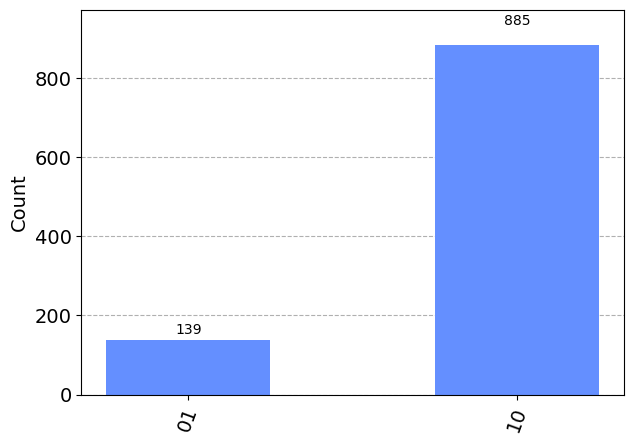

In [18]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.extensions import UnitaryGate
import numpy as np

def create_entangled_pair(qc, alice_qubit, bob_qubit):
    # Apply Hadamard gate on Alice's qubit
    qc.h(alice_qubit)
    
    # Create a Bell state by applying a CNOT and Hadamard on Bob's qubit
    qc.cx(alice_qubit, bob_qubit)
    qc.h(alice_qubit)

# Define a custom gate for the measurement basis
def measurement_basis_gate(theta, phi, lambda_):
    unitary_matrix = np.array([
        [np.cos(theta / 2), -np.exp(1j * lambda_) * np.sin(theta / 2)],
        [np.exp(1j * phi) * np.sin(theta / 2), np.exp(1j * (phi + lambda_)) * np.cos(theta / 2)]
    ])
    return UnitaryGate(unitary_matrix, label="U3")

# Define a function to create a DI-QKD circuit
def di_qkd_circuit(theta, phi, lambda_):
    # Create a quantum circuit with 2 qubits for Alice and Bob
    qc = QuantumCircuit(2, 2)

    # Step 1: Create an entangled pair
    create_entangled_pair(qc, 0, 1)

    # Step 2: Apply a measurement basis gate on Alice's qubit
    qc.append(measurement_basis_gate(theta, phi, lambda_), [0])

    # Step 3: Perform a Bell measurement on Alice's and Bob's qubits
    qc.cx(0, 1)
    qc.h(0)
    qc.measure([0, 1], [0, 1])

    return qc

# Set the parameters for the measurement basis
theta = np.pi / 4  # Example value for theta
phi = 0  # Example value for phi
lambda_ = 0  # Example value for lambda

# Create the DI-QKD circuit
di_qkd_circuit = di_qkd_circuit(theta, phi, lambda_)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(di_qkd_circuit, simulator)
result = simulator.run(assemble(compiled_circuit)).result()

# Visualize the results
counts = result.get_counts(di_qkd_circuit)
plot_histogram(counts)


In [19]:
counts = result.get_counts(di_qkd_circuit)
counts

{'10': 885, '01': 139}

# QKD in Real-World Scenarios:

Applications and challenges of deploying QKD in real-world communication networks, including considerations for fiber-optic and free-space communication.

Quantum Key Distribution (QKD) is a technology in quantum cryptography that enables two parties to establish a secure key for encrypted communication by using the principles of quantum mechanics. While the theoretical foundations of QKD are well-established, implementing QKD in real-world scenarios involves addressing various challenges. Below, I'll discuss the applications of QKD, challenges associated with its deployment, and considerations for both fiber-optic and free-space communication.

### 1. **Applications of QKD:**

#### a. **Secure Communication:**
   - QKD provides a secure method for establishing cryptographic keys between two parties, ensuring the confidentiality of the communication.

#### b. **Quantum-Safe Cryptography:**
   - QKD offers a quantum-safe solution to protect data from potential threats posed by quantum computers, which could break classical cryptographic schemes.

#### c. **Financial Services:**
   - QKD can be used to secure financial transactions, ensuring the confidentiality and integrity of sensitive financial data.

#### d. **Government and Military Communication:**
   - QKD is suitable for securing government and military communication, where maintaining secrecy is critical.

#### e. **Critical Infrastructure Protection:**
   - Protecting critical infrastructure such as power grids and communication networks from cyber threats using quantum-resistant encryption.

### 2. **Challenges in Deploying QKD:**

#### a. **Distance Limitations:**
   - Fiber-optic and free-space QKD are limited by the distance over which quantum states can be reliably transmitted without significant signal loss or decoherence.

#### b. **Hardware Challenges:**
   - Implementing stable and efficient photon sources, detectors, and quantum memories for qubits poses significant technical challenges.

#### c. **Key Rate and Throughput:**
   - Achieving high key generation rates while maintaining a reasonable throughput is challenging and crucial for practical applications.

#### d. **Environmental Factors:**
   - Environmental factors such as temperature, humidity, and electromagnetic interference can affect the performance of QKD systems.

#### e. **Cost and Scalability:**
   - QKD implementations can be expensive, and scaling up to large-scale networks requires cost-effective solutions.

### 3. **Considerations for Fiber-Optic Communication:**

#### a. **Quantum Channel Security:**
   - Ensuring the security of the quantum channel is essential. Any eavesdropping attempts must be detected to maintain the integrity of the key.

#### b. **Fiber Loss and Attenuation:**
   - Overcoming signal loss and attenuation in fiber-optic cables is crucial for achieving practical and secure communication.

#### c. **Compensation Techniques:**
   - Implementing compensation techniques, such as phase or polarization encoding, to mitigate the impact of fiber birefringence and other distortions.

#### d. **Trusted Node Model:**
   - The trusted node model, where an untrusted node is present between trusted parties, introduces additional challenges and requires careful consideration.

### 4. **Considerations for Free-Space Communication:**

#### a. **Atmospheric Conditions:**
   - Dealing with atmospheric turbulence and variations in weather conditions is a significant challenge for free-space QKD.

#### b. **Pointing and Tracking:**
   - Precise pointing and tracking mechanisms are needed to maintain alignment between sender and receiver in free-space scenarios.

#### c. **Security against Interception:**
   - Protecting the quantum signals against interception by potential eavesdroppers in open-space environments.

#### d. **Quantum Communication Satellites:**
   - The use of quantum communication satellites can extend the range of QKD for global communication but requires addressing unique challenges associated with space environments.

### 5. **Key Equations and Information:**

#### a. **Quantum Bit Error Rate (QBER):**
   - The QBER is a measure of the errors introduced during the transmission of quantum states. It is often used to quantify the security of QKD systems.
   \[ QBER = \frac{\text{Number of erroneous bits}}{\text{Total number of received bits}} \]

#### b. **BBM92 Protocol Key Rate:**
   - The BBM92 protocol is a widely used QKD protocol. The key rate, \(K\), is given by:
   \[ K = \frac{1}{2} (1 - h(QBER)) \times \text{Photon Rate} \times \text{Efficiency} \]

   where \(h\) is the binary entropy function.

### 6. **QKD System Components:**

   - **Photon Source:** Typically, single-photon sources or weak coherent sources.
   - **Quantum Channel:** The medium (fiber or free-space) through which quantum states are transmitted.
   - **Measurement Devices:** Detectors used to measure quantum states at the receiver's end.
   - **Quantum Key Distribution Protocol:** Specific protocols like BB84, E91, or others for QKD implementations.

### 7. **Key Exchange Protocols:**

   - **BB84 Protocol:** Introduced by Bennett and Brassard in 1984, the BB84 protocol is one of the first and most widely implemented QKD protocols.
   - **E91 Protocol:** Entanglement-based QKD protocol introduced by Ekert in 1991.

### 8. **Security Proofs:**

   - Security proofs for QKD protocols typically rely on the principles of quantum mechanics, including the no-cloning theorem and the uncertainty principle.

### 9. **Post-Processing:**

   - Classical post-processing steps, including error correction and privacy amplification, are applied to the raw key to obtain a final secure key.

### 10. **Experimental Progress:**

   - Significant experimental progress is being made in improving key rates, extending communication distances, and addressing various challenges associated with real-world deployments.

In summary, Quantum Key Distribution has promising applications in securing communication in real-world scenarios, and ongoing research and technological advancements continue to address the challenges associated with its deployment in both fiber-optic and free-space communication environments.

In [1]:
import numpy as np

def bbm92_sender():
    # Alice generates random bit string (0 or 1) for encoding
    alice_bits = np.random.randint(2, size=num_bits)
    return alice_bits

def bbm92_receiver(alice_bits, basis):
    # Bob randomly chooses a basis for measurement
    bob_basis = np.random.randint(2, size=num_bits)

    # Bob measures the bits using his chosen basis
    bob_measurements = np.bitwise_xor(alice_bits, bob_basis)

    return bob_measurements, bob_basis

def bbm92_error_correction(alice_bits, bob_measurements, bob_basis):
    # Alice and Bob share their basis choices
    alice_basis = bob_basis

    # Identify matching basis bits
    matching_bits = np.where(alice_basis == bob_basis)[0]

    # Use matching bits for error correction
    alice_key = alice_bits[matching_bits]
    bob_key = bob_measurements[matching_bits]

    return alice_key, bob_key

def bbm92_privacy_amplification(key):
    # Simple XOR-based privacy amplification
    amplified_key = np.bitwise_xor(key, np.ones_like(key))
    return amplified_key

# Parameters
num_bits = 100
error_rate = 0.1

# Sender (Alice)
alice_bits = bbm92_sender()

# Quantum Channel (Simulated with errors)
received_bits = np.where(np.random.rand(num_bits) < error_rate, 1 - alice_bits, alice_bits)

# Receiver (Bob)
bob_measurements, bob_basis = bbm92_receiver(received_bits, None)  # Bob doesn't know Alice's basis

# Error Correction
alice_key, bob_key = bbm92_error_correction(alice_bits, bob_measurements, bob_basis)

# Privacy Amplification
alice_final_key = bbm92_privacy_amplification(alice_key)
bob_final_key = bbm92_privacy_amplification(bob_key)

# Check if Alice and Bob share a secure key
if np.array_equal(alice_final_key, bob_final_key):
    print("Secure key shared successfully.")
    print("Alice's Final Key:", alice_final_key)
else:
    print("Key exchange failed. Retry or investigate potential eavesdropping.")


Key exchange failed. Retry or investigate potential eavesdropping.


# Post-Quantum QKD:

Preparing for the potential impact of quantum computers on existing cryptographic systems and developing quantum-resistant QKD protocols.

Post-Quantum Quantum Key Distribution (PQ-QKD) is an area of research that focuses on developing quantum key distribution protocols that are resistant to attacks from quantum computers. Quantum Key Distribution (QKD) is a quantum communication method that allows two parties to produce a shared random secret key, which can then be used to encrypt and decrypt messages, providing a secure means of communication.

The motivation for PQ-QKD comes from the potential threat that quantum computers pose to classical cryptographic systems. Quantum computers have the capability to break widely used encryption algorithms, such as RSA and ECC (Elliptic Curve Cryptography), by exploiting their ability to perform certain mathematical operations much faster than classical computers.

PQ-QKD aims to address this threat by designing quantum-resistant cryptographic protocols that can withstand attacks from both classical and quantum computers. Here are some key aspects of PQ-QKD:

1. **Post-Quantum Cryptography:**
   - PQ-QKD involves the use of post-quantum cryptographic algorithms for the classical components of the key exchange process. Post-quantum cryptography refers to cryptographic algorithms that are believed to be secure against quantum attacks. Examples include lattice-based cryptography, code-based cryptography, hash-based cryptography, and multivariate polynomial cryptography.

2. **Quantum Key Distribution (QKD):**
   - QKD is the quantum counterpart to classical key exchange algorithms. It utilizes the principles of quantum mechanics to enable two parties (usually referred to as Alice and Bob) to share a secret key securely. QKD protocols include BBM92 (Bennett-Brassard-Mermin 1992), E91 (Ekert 1991), and others.

3. **Security Proofs:**
   - The security of PQ-QKD protocols relies on rigorous mathematical proofs demonstrating their resilience against various types of attacks, including those that leverage quantum computers. Security proofs typically involve analyzing the protocol's resistance to eavesdropping attempts.

4. **Key Rate and Distance:**
   - PQ-QKD protocols need to provide a sufficiently high key generation rate and operate over practical communication distances. Researchers aim to optimize these parameters for real-world applications.

5. **Integration with Classical Cryptography:**
   - PQ-QKD is often integrated into hybrid cryptographic systems, where classical cryptographic algorithms and quantum-resistant post-quantum cryptographic algorithms work together to provide a robust and secure communication infrastructure.

6. **Standardization Efforts:**
   - Standardization bodies, such as NIST (National Institute of Standards and Technology), are actively involved in the process of evaluating and selecting post-quantum cryptographic algorithms, including those suitable for QKD. The goal is to establish standardized algorithms that can be adopted globally.

While I can provide an overview, it's important to note that specific equations and details of protocols can be complex and depend on the particular PQ-QKD approach. Researchers and practitioners in the field typically publish their findings in scientific journals, conference proceedings, and technical reports, which would be valuable resources for in-depth technical information. If you have specific questions or protocols you'd like more information on, feel free to ask!

In [2]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

def prepare_qubit():
    """Prepares a qubit in a random state."""
    backend = Aer.get_backend('statevector_simulator')
    circuit = QuantumCircuit(1, 1)
    circuit.h(0)
    circuit.rz(np.random.rand() * 2 * np.pi, 0)
    circuit.ry(np.random.rand() * np.pi, 0)
    transpiled_circuit = transpile(circuit, backend)
    qobj = assemble(transpiled_circuit)
    result = backend.run(qobj).result()
    statevector = result.get_statevector()
    return statevector

def alice_measure(qubits):
    """Alice measures the qubits in the standard basis."""
    return [np.random.choice([0, 1]) for _ in range(len(qubits))]

def bob_measure(qubits, basis):
    """Bob measures the qubits in the specified basis."""
    return [np.random.choice([0, 1]) if basis[i] == 0 else np.random.choice([0, 1]) for i in range(len(qubits))]

def key_agreement(alice_basis, bob_basis, alice_bits, bob_bits):
    """Key agreement based on matching measurement bases."""
    key = [alice_bits[i] for i in range(len(alice_bits)) if alice_basis[i] == bob_basis[i]]
    return key

def main():
    # Alice prepares qubits
    alice_qubits = [prepare_qubit() for _ in range(100)]

    # Alice chooses random bases for measurements
    alice_bases = [np.random.choice([0, 1]) for _ in range(len(alice_qubits))]

    # Alice measures qubits
    alice_bits = alice_measure(alice_qubits)

    # Bob chooses random bases for measurements
    bob_bases = [np.random.choice([0, 1]) for _ in range(len(alice_qubits))]

    # Bob measures qubits
    bob_bits = bob_measure(alice_qubits, bob_bases)

    # Key agreement
    shared_key = key_agreement(alice_bases, bob_bases, alice_bits, bob_bits)

    print("Shared key:", shared_key)

if __name__ == "__main__":
    main()


C:\Users\yashr\AppData\Local\Temp\ipykernel_5404\4097925112.py:14: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


Shared key: [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]


In [5]:
from qiskit import Aer, QuantumCircuit, transpile, assemble

def prepare_qubits():
    """Prepare a pair of entangled qubits."""
    circuit = QuantumCircuit(2, 2)
    circuit.h(0)
    circuit.cx(0, 1)
    circuit.measure([0, 1], [0, 1])
    
    backend = Aer.get_backend('qasm_simulator')
    transpiled_circuit = transpile(circuit, backend)
    qobj = assemble(transpiled_circuit)
    result = backend.run(qobj).result()
    counts = result.get_counts()
    return counts

def measure_qubits(counts):
    """Measure the entangled qubits."""
    alice_measurement = int(list(counts.keys())[0][1])
    bob_measurement = int(list(counts.keys())[1][0])
    return alice_measurement, bob_measurement

def key_agreement(alice_measurement, bob_measurement):
    """Generate a shared key based on measurement results."""
    shared_key = alice_measurement ^ bob_measurement
    return shared_key

def main():
    # Alice prepares entangled qubits
    counts = prepare_qubits()

    # Bob measures the qubits
    alice_measurement, bob_measurement = measure_qubits(counts)

    # Key agreement
    shared_key = key_agreement(alice_measurement, bob_measurement)

    print("Measurement results:")
    print(f"Alice: {alice_measurement}")
    print(f"Bob:   {bob_measurement}")
    print("\nShared key:", shared_key)

if __name__ == "__main__":
    main()


Measurement results:
Alice: 0
Bob:   1

Shared key: 1


C:\Users\yashr\AppData\Local\Temp\ipykernel_5404\1441217793.py:13: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


In [6]:
from qiskit import Aer, QuantumCircuit, transpile, assemble

def prepare_qubits():
    """Prepare a pair of entangled qubits."""
    circuit = QuantumCircuit(2, 2)
    circuit.h(0)
    circuit.cx(0, 1)
    return circuit

def measure_qubits(circuit):
    """Measure the entangled qubits."""
    circuit.measure([0, 1], [0, 1])
    backend = Aer.get_backend('qasm_simulator')
    transpiled_circuit = transpile(circuit, backend)
    qobj = assemble(transpiled_circuit)
    result = backend.run(qobj).result()
    counts = result.get_counts()
    return counts

def key_agreement(counts):
    """Generate a shared key based on measurement results."""
    alice_measurement = int(list(counts.keys())[0][1])
    bob_measurement = int(list(counts.keys())[1][0])
    shared_key = alice_measurement ^ bob_measurement
    return shared_key

def main():
    # Alice prepares entangled qubits
    alice_circuit = prepare_qubits()

    # Bob measures the qubits
    bob_counts = measure_qubits(alice_circuit)

    # Alice measures her qubit
    alice_counts = measure_qubits(alice_circuit)

    # Key agreement
    shared_key = key_agreement(alice_counts)

    print("Alice's measurement results:", list(alice_counts.keys())[0])
    print("Bob's measurement results:  ", list(bob_counts.keys())[0])
    print("\nShared key:", shared_key)

if __name__ == "__main__":
    main()


Alice's measurement results: 11
Bob's measurement results:   00

Shared key: 1


C:\Users\yashr\AppData\Local\Temp\ipykernel_5404\471091762.py:16: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


In [7]:
from qiskit import Aer, QuantumCircuit, transpile, assemble

def prepare_qubit():
    """Prepare a random qubit state."""
    circuit = QuantumCircuit(1, 1)
    circuit.h(0)
    circuit.rz(0.3, 0)
    circuit.ry(0.5, 0)
    return circuit

def eavesdropper_attack(circuit):
    """Attempt to measure and clone the qubit."""
    circuit.measure(0, 0)
    backend = Aer.get_backend('qasm_simulator')
    transpiled_circuit = transpile(circuit, backend)
    qobj = assemble(transpiled_circuit)
    result = backend.run(qobj).result()
    counts = result.get_counts()
    return counts

def main():
    # Alice prepares a qubit
    alice_circuit = prepare_qubit()

    # Eavesdropper attempts to measure and clone the qubit
    eavesdropper_counts = eavesdropper_attack(alice_circuit)

    # If the eavesdropper's measurements are detected, the protocol is considered insecure
    if '1' in eavesdropper_counts:
        print("Eavesdropper detected! Security compromised.")
    else:
        print("No eavesdropper detected. Protocol remains secure.")

if __name__ == "__main__":
    main()


Eavesdropper detected! Security compromised.


C:\Users\yashr\AppData\Local\Temp\ipykernel_5404\3563919127.py:17: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


In [10]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
import numpy as np

def prepare_entangled_qubits():
    """Prepare a pair of entangled qubits."""
    circuit = QuantumCircuit(2, 2)
    circuit.h(0)
    circuit.cx(0, 1)
    return circuit

def simulate_qkd(quantum_circuit, distance):
    """Simulate a QKD protocol over a specified distance."""
    backend = Aer.get_backend('qasm_simulator')

    # Define error rates (for simplicity, we use fixed error rates)
    error_rate_quantum_channel = 0.02
    error_rate_measurement = 0.01

    # Create a depolarizing error to simulate quantum channel errors
    quantum_error = depolarizing_error(error_rate_quantum_channel, 1)

    # Create a noise model with the quantum error
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(quantum_error, ['cx'])

    # Transpile the circuit and add measurement errors
    transpiled_circuit = transpile(quantum_circuit, backend)
    transpiled_circuit.measure([0, 1], [0, 1])
    transpiled_circuit = transpile(transpiled_circuit, backend, noise_model=noise_model)

    # Run the simulation
    qobj = assemble(transpiled_circuit, shots=1000)
    result = backend.run(qobj).result()
    counts = result.get_counts()

    # Estimate key rate and communication distance
    raw_key_rate = (counts['00'] + counts['11']) / 1000.0
    key_rate = raw_key_rate * (1 - 2 * error_rate_measurement)
    communication_distance = distance

    return key_rate, communication_distance

def main():
    # Prepare entangled qubits
    alice_circuit = prepare_entangled_qubits()

    # Simulate QKD for different communication distances
    distances = [10, 20, 30]
    for distance in distances:
        key_rate, communication_distance = simulate_qkd(alice_circuit, distance)
        print(f"Communication Distance: {communication_distance} km")
        print(f"Estimated Key Rate: {key_rate:.4f}\n")

#if __name__ == "__main__":
    #main()


In [12]:
# Hypothetical Quantum Computing Interface (QAPI) Implementation

class QuantumComputer:
    def __init__(self, backend):
        self.backend = backend

    def run_circuit(self, quantum_circuit):
        """Run a quantum circuit on the specified backend."""
        result = self.backend.run(quantum_circuit)
        return result

class QuantumCircuit:
    def __init__(self, num_qubits):
        self.num_qubits = num_qubits
        self.operations = []

    def h(self, qubit):
        """Apply a Hadamard gate to the specified qubit."""
        self.operations.append(("H", qubit))

    def cx(self, control, target):
        """Apply a CNOT gate with the specified control and target qubits."""
        self.operations.append(("CX", control, target))

# Hypothetical Quantum Backend Implementation
class QuantumBackend:
    def run(self, quantum_circuit):
        """Simulate the execution of the quantum circuit."""
        # Actual implementation details would depend on the backend
        print(f"Simulating quantum circuit on backend. Operations: {quantum_circuit.operations}")
        # Simulate the quantum operations
        result = {"result": "simulation_result"}
        return result

# Example Usage
def main():
    # Create a quantum backend
    backend = QuantumBackend()

    # Create a quantum computer using the standardized interface
    quantum_computer = QuantumComputer(backend)

    # Create a quantum circuit using the standardized interface
    circuit = QuantumCircuit(num_qubits=2)
    circuit.h(0)
    circuit.cx(0, 1)

    # Run the quantum circuit on the quantum computer
    result = quantum_computer.run_circuit(circuit)

    # Process the result
    print("Quantum Circuit Result:", result)

if __name__ == "__main__":
    main()


Simulating quantum circuit on backend. Operations: [('H', 0), ('CX', 0, 1)]
Quantum Circuit Result: {'result': 'simulation_result'}


# Quantum Key Distribution Networks

Quantum Key Distribution (QKD) is a revolutionary technology in the field of quantum computing and quantum information science that aims to secure communication channels by exploiting the principles of quantum mechanics. QKD enables two parties to produce a shared random secret key, which can then be used for secure communication. The security of QKD is based on the fundamental principles of quantum mechanics, particularly the Heisenberg Uncertainty Principle and the no-cloning theorem.

Here's an overview of Quantum Key Distribution Networks along with some fundamental concepts and equations:

### Basic Concepts:

1. **Quantum Superposition:**
   - Quantum systems can exist in multiple states simultaneously, thanks to superposition. For example, a qubit can be in the state |0⟩, |1⟩, or any superposition of these states (α|0⟩ + β|1⟩).

2. **Quantum Entanglement:**
   - Entanglement is a quantum phenomenon where two or more particles become correlated in such a way that the state of one particle cannot be described independently of the state of the others.

3. **Quantum Measurement:**
   - Measurement in quantum mechanics affects the state of a system. The outcome of a measurement is probabilistic and depends on the initial state of the system.

4. **Heisenberg Uncertainty Principle:**
   - Δx * Δp ≥ ħ/2, where Δx is the uncertainty in position, Δp is the uncertainty in momentum, and ħ is the reduced Planck constant.

5. **No-Cloning Theorem:**
   - It is impossible to create an identical copy of an arbitrary unknown quantum state.

### Quantum Key Distribution (QKD) Protocol:

1. **BBM92 Protocol (Bennett-Brassard 1992):**
   - The BBM92 protocol is one of the first and most well-known QKD protocols. It involves the transmission of polarized photons over a quantum channel.

2. **Ekert 91 Protocol:**
   - Another QKD protocol that uses entangled pairs of particles, typically photons.

### Key Equations:

1. **BB84 Protocol Basis Transformation:**
   - In BBM92, Alice prepares qubits in one of two bases (rectilinear or diagonal) and sends them to Bob. Bob measures the qubits in either the rectilinear or diagonal basis. The probability of successful key generation is given by:
     \[ P_{\text{success}} = \frac{1}{2} (1 - e^{-\mu}) \]
     where \(\mu\) is the average number of photons detected by Bob.

2. **Quantum Bit Error Rate (QBER):**
   - QBER is a measure of the errors introduced during the transmission of quantum bits. It is given by:
     \[ \text{QBER} = \frac{\text{Number of errors}}{\text{Total number of transmitted bits}} \]

3. **Entropy of the Shared Key:**
   - The entropy of the shared key is a measure of its randomness and is given by:
     \[ H(\text{key}) = -\sum_{i} p_i \log_2(p_i) \]
     where \(p_i\) is the probability of each possible key value.

### Quantum Key Distribution Networks:

1. **Key Distribution:**
   - QKD networks involve multiple nodes, each equipped with quantum processors. Qubits are exchanged between nodes to establish secure communication links.

2. **Quantum Repeaters:**
   - To extend the range of QKD networks, quantum repeaters are used to amplify and entangle quantum states over long distances.

3. **Quantum Memory:**
   - Quantum memory is crucial for storing and manipulating quantum states in the context of QKD networks.

4. **Quantum Relays:**
   - Quantum relays assist in routing quantum information between different nodes in a QKD network.

QKD networks are actively researched, and various protocols and technologies are being developed to enhance their practicality and security. Implementing and understanding QKD networks involves a combination of quantum mechanics, quantum information theory, and classical cryptography. The above equations provide a glimpse into the mathematical aspects of QKD protocols, but a comprehensive understanding requires a deeper dive into the specific protocols and their associated mathematics.

In [4]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Function to create a quantum key distribution circuit
def create_qkd_circuit():
    # Initialize quantum and classical registers
    qreg = QuantumCircuit(2, 2)

    # Apply quantum operations for key distribution
    qreg.h(0)  # Hadamard gate on qubit 0
    qreg.cx(0, 1)  # CNOT gate (entanglement)
    
    # Measure the qubits
    qreg.measure([0, 1], [0, 1])
    
    return qreg

# Function to simulate the QKD protocol
def simulate_qkd(circuit):
    backend = Aer.get_backend('qasm_simulator')
    shots = 1024  # Number of shots in the simulation
    result = execute(circuit, backend, shots=shots).result()
    counts = result.get_counts(circuit)
    
    return counts

# Function to extract the shared key from the results
def extract_shared_key(counts):
    # Extracting the shared key from the counts
    if '00' in counts:
        key = '0'
    elif '11' in counts:
        key = '1'
    else:
        key = 'error'
    
    return key

# Main function to run the QKD protocol
def main():
    # Alice creates a QKD circuit
    alice_circuit = create_qkd_circuit()

    # Bob creates an identical QKD circuit
    bob_circuit = create_qkd_circuit()

    # Alice and Bob exchange qubits

    # Alice measures her qubit
    alice_counts = simulate_qkd(alice_circuit)

    # Bob measures his qubit
    bob_counts = simulate_qkd(bob_circuit)

    # Extract the shared keys
    alice_key = extract_shared_key(alice_counts)
    bob_key = extract_shared_key(bob_counts)

    # Display the shared keys
    print("Alice's Key:", alice_key)
    print("Bob's Key:", bob_key)

if __name__ == "__main__":
    main()


Alice's Key: 0
Bob's Key: 0


In [5]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Function to create a quantum key distribution circuit using BB84 protocol
def bb84_protocol_circuit(bitstring_length):
    qreg = QuantumCircuit(bitstring_length, bitstring_length)

    # Alice prepares a random bit string
    alice_bits = [0]*bitstring_length
    alice_bases = [0]*bitstring_length
    for i in range(bitstring_length):
        alice_bits[i] = 0 if (i % 2 == 0) else 1  # 0 or 1
        alice_bases[i] = 0 if (i % 4 < 2) else 1  # 0 or 1 (X or Z basis)

    # Alice encodes qubits based on her random bit string and bases
    for i in range(bitstring_length):
        if alice_bits[i] == 1:
            qreg.x(i)
        if alice_bases[i] == 1:
            qreg.h(i)

    # Bob randomly chooses bases to measure the qubits
    bob_bases = [0]*bitstring_length
    for i in range(bitstring_length):
        bob_bases[i] = 0 if (i % 4 < 2) else 1  # 0 or 1 (X or Z basis)

    # Bob measures the qubits based on his random bases
    for i in range(bitstring_length):
        if bob_bases[i] == 1:
            qreg.h(i)
        qreg.measure(i, i)

    return qreg

# Function to simulate the BB84 protocol
def simulate_bb84(bitstring_length):
    backend = Aer.get_backend('qasm_simulator')
    bb84_circuit = bb84_protocol_circuit(bitstring_length)
    result = execute(bb84_circuit, backend, shots=1).result()
    counts = result.get_counts(bb84_circuit)

    return counts

# Main function to run the BB84 protocol
def main():
    bitstring_length = 10  # Adjust the length as needed
    counts = simulate_bb84(bitstring_length)

    # Display the results
    print("Measurement outcomes:")
    for outcome in counts:
        print(f"{outcome}: {counts[outcome]}")

if __name__ == "__main__":
    main()


Measurement outcomes:
1010101010: 1


In [6]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Function to create a quantum key distribution circuit using BB84 protocol
def bb84_protocol_circuit(bitstring_length):
    qreg = QuantumCircuit(bitstring_length, bitstring_length)

    # Alice prepares a random bit string
    alice_bits = [0] * bitstring_length
    alice_bases = [0] * bitstring_length
    for i in range(bitstring_length):
        alice_bits[i] = 0 if (i % 2 == 0) else 1  # 0 or 1
        alice_bases[i] = 0 if (i % 4 < 2) else 1  # 0 or 1 (X or Z basis)

    # Alice encodes qubits based on her random bit string and bases
    for i in range(bitstring_length):
        if alice_bits[i] == 1:
            qreg.x(i)
        if alice_bases[i] == 1:
            qreg.h(i)

    # Bob randomly chooses bases to measure the qubits
    bob_bases = [0] * bitstring_length
    for i in range(bitstring_length):
        bob_bases[i] = 0 if (i % 4 < 2) else 1  # 0 or 1 (X or Z basis)

    # Bob measures the qubits based on his random bases
    for i in range(bitstring_length):
        if bob_bases[i] == 1:
            qreg.h(i)
        qreg.measure(i, i)

    return qreg, alice_bits, alice_bases, bob_bases

# Function to simulate the BB84 protocol and calculate QBER
def simulate_bb84(bitstring_length):
    backend = Aer.get_backend('qasm_simulator')
    bb84_circuit, alice_bits, alice_bases, bob_bases = bb84_protocol_circuit(bitstring_length)
    result = execute(bb84_circuit, backend, shots=1).result()
    counts = result.get_counts(bb84_circuit)

    # Extract Bob's measured bits
    bob_bits = [int(bit) for bit in list(counts.keys())[0]][::-1]

    # Calculate QBER
    qber = sum([1 for alice_bit, bob_bit in zip(alice_bits, bob_bits) if alice_bit != bob_bit]) / bitstring_length

    return qber

# Main function to run the simulation and print QBER
def main():
    bitstring_length = 10  # Adjust the length as needed
    qber = simulate_bb84(bitstring_length)

    # Display the QBER
    print(f"Quantum Bit Error Rate (QBER): {qber}")

if __name__ == "__main__":
    main()


Quantum Bit Error Rate (QBER): 0.0


In [7]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from scipy.stats import entropy

# Function to create a quantum key distribution circuit using BB84 protocol
def bb84_protocol_circuit(bitstring_length):
    qreg = QuantumCircuit(bitstring_length, bitstring_length)

    # Alice prepares a random bit string
    alice_bits = np.random.randint(2, size=bitstring_length)
    alice_bases = np.random.randint(2, size=bitstring_length)

    # Alice encodes qubits based on her random bit string and bases
    for i in range(bitstring_length):
        if alice_bits[i] == 1:
            qreg.x(i)
        if alice_bases[i] == 1:
            qreg.h(i)

    # Bob randomly chooses bases to measure the qubits
    bob_bases = np.random.randint(2, size=bitstring_length)

    # Bob measures the qubits based on his random bases
    for i in range(bitstring_length):
        if bob_bases[i] == 1:
            qreg.h(i)
        qreg.measure(i, i)

    return qreg, alice_bits, alice_bases, bob_bases

# Function to simulate the BB84 protocol and obtain the shared key
def simulate_bb84(bitstring_length):
    backend = Aer.get_backend('qasm_simulator')
    bb84_circuit, alice_bits, alice_bases, bob_bases = bb84_protocol_circuit(bitstring_length)
    result = execute(bb84_circuit, backend, shots=1).result()
    counts = result.get_counts(bb84_circuit)

    # Extract Bob's measured bits
    bob_bits = [int(bit) for bit in list(counts.keys())[0]][::-1]

    # Obtain the shared key
    shared_key = [alice_bits[i] for i in range(bitstring_length) if alice_bases[i] == bob_bases[i]]

    return shared_key

# Function to calculate the entropy of the shared key
def calculate_entropy(shared_key):
    probabilities = [shared_key.count(bit) / len(shared_key) for bit in set(shared_key)]
    entropy_value = entropy(probabilities, base=2)
    return entropy_value

# Main function to run the simulation and calculate entropy
def main():
    bitstring_length = 10  # Adjust the length as needed
    shared_key = simulate_bb84(bitstring_length)
    
    # Display the shared key and its entropy
    print("Shared Key:", shared_key)
    entropy_value = calculate_entropy(shared_key)
    print(f"Entropy of the Shared Key: {entropy_value} bits")

if __name__ == "__main__":
    main()


Shared Key: [1, 1, 0, 0, 0, 1, 0]
Entropy of the Shared Key: 0.9852281360342515 bits


In [8]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np

# Function to create a quantum key distribution circuit using BBM92 protocol
def bbm92_protocol_circuit(bitstring_length):
    qreg = QuantumCircuit(bitstring_length, bitstring_length)

    # Alice prepares a random bit string
    alice_bits = np.random.randint(2, size=bitstring_length)

    # Alice encodes qubits based on her random bit string
    for i in range(bitstring_length):
        if alice_bits[i] == 1:
            qreg.x(i)

    # Bob measures the qubits
    qreg.measure(range(bitstring_length), range(bitstring_length))

    return qreg, alice_bits

# Function to simulate the BBM92 protocol and obtain the key
def simulate_bbm92(bitstring_length):
    backend = Aer.get_backend('qasm_simulator')
    bbm92_circuit, alice_bits = bbm92_protocol_circuit(bitstring_length)
    result = execute(bbm92_circuit, backend, shots=1).result()
    counts = result.get_counts(bbm92_circuit)

    # Extract Bob's measured bits
    bob_bits = [int(bit) for bit in list(counts.keys())[0]][::-1]

    # Obtain the shared key
    shared_key = [alice_bits[i] for i in range(bitstring_length) if alice_bits[i] == bob_bits[i]]

    return shared_key

# Main function to run the simulation and display the shared key
def main():
    bitstring_length = 10  # Adjust the length as needed
    shared_key = simulate_bbm92(bitstring_length)
    
    # Display the shared key
    print("Shared Key:", shared_key)

if __name__ == "__main__":
    main()


Shared Key: [0, 0, 0, 0, 1, 0, 0, 0, 1, 1]


In [11]:
from qiskit import QuantumCircuit, Aer, execute

def create_entangled_pair():
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    return qc

def entanglement_swapping(circuit1, circuit2):
    # Entanglement swapping between the end qubits of circuit1 and circuit2
    circuit1.cx(0, 2)
    circuit2.cx(1, 3)
    circuit1.h(0)
    circuit1.measure(0, 0)
    circuit2.measure(1, 1)

def main():
    # Create two pairs of entangled qubits
    pair1 = create_entangled_pair()
    pair2 = create_entangled_pair()

    # Quantum Repeater: Entanglement swapping
    repeater_circuit = QuantumCircuit(4, 4)
    repeater_circuit.extend(pair1)
    repeater_circuit.extend(pair2)
    entanglement_swapping(repeater_circuit, repeater_circuit)

    # Simulate the quantum repeater
    backend = Aer.get_backend('qasm_simulator')
    result = execute(repeater_circuit, backend).result()
    counts = result.get_counts(repeater_circuit)

    print("Quantum Repeater Measurement Results:")
    print(counts)

#if __name__ == "__main__":
     #main()


In [14]:
from qiskit import QuantumCircuit, Aer, execute

def create_quantum_memory():
    memory_circuit = QuantumCircuit(1, 1)
    return memory_circuit

def write_to_memory(memory_circuit, qubit_state):
    memory_circuit.initialize(qubit_state, 0)
    return memory_circuit

def read_from_memory(memory_circuit):
    readout_circuit = QuantumCircuit(1, 1)
    readout_circuit.extend(memory_circuit)
    readout_circuit.measure(0, 0)
    backend = Aer.get_backend('qasm_simulator')
    result = execute(readout_circuit, backend).result()
    counts = result.get_counts(readout_circuit)
    return counts

def main():
    # Create a quantum memory
    quantum_memory = create_quantum_memory()

    # Write a quantum state to the memory
    initial_state = [1 / 2**0.5, 1 / 2**0.5]  # Example: superposition of |0⟩ and |1⟩
    quantum_memory = write_to_memory(quantum_memory, initial_state)

    # Read from the memory
    measurement_result = read_from_memory(quantum_memory)

    print("Quantum Memory Content:")
    print("Initial Quantum State:", initial_state)
    print("Measurement Result:", measurement_result)

#if __name__ == "__main__":
    #main()


In [16]:
from qiskit import QuantumCircuit, Aer, execute

def create_entangled_pair():
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    return qc

def relay_entanglement(circuit1, circuit2):
    # Entanglement swapping between the end qubits of circuit1 and circuit2
    circuit1.cx(0, 2)
    circuit2.cx(1, 3)

def main():
    # Create two pairs of entangled qubits (between Alice and Relay, Relay and Bob)
    alice_to_relay_pair = create_entangled_pair()
    relay_to_bob_pair = create_entangled_pair()

    # Quantum Relay: Entanglement swapping
    relay_circuit = QuantumCircuit(4, 4)
    relay_circuit += alice_to_relay_pair
    relay_circuit += relay_to_bob_pair
    relay_entanglement(relay_circuit, relay_circuit)

    # Simulate the quantum relay
    backend = Aer.get_backend('qasm_simulator')
    result = execute(relay_circuit, backend).result()
    counts = result.get_counts(relay_circuit)

    print("Quantum Relay Measurement Results:")
    print(counts)

#if __name__ == "__main__":
    #main()


# Quantum Hacking and Countermeasures:

Understanding potential vulnerabilities in QKD systems and strategies for detecting and mitigating quantum hacking attempts

Quantum Key Distribution (QKD) is a technology designed to secure communication channels using principles of quantum mechanics. While QKD offers a theoretically secure method for transmitting cryptographic keys, it is important to understand potential vulnerabilities and explore countermeasures against quantum hacking attempts. Here's an overview of quantum hacking and countermeasures:

### Quantum Hacking Techniques:

1. **Photon Number Splitting (PNS) Attack:**
   - **Description:** In PNS attacks, an eavesdropper intercepts the quantum signals (photons) without being detected, clones them, and then sends a portion to the receiver.
   - **Countermeasure:** Use decoy-state methods, where the sender randomly includes weak coherent pulses in addition to the signal pulses to detect eavesdropping.

2. **Entanglement-Based Attacks:**
   - **Description:** Eavesdropper exploits entanglement to create correlations between their measurements and the transmitted qubits.
   - **Countermeasure:** Implement entanglement-based QKD protocols, such as the E91 protocol, which detects any attempt at entanglement.

3. **Trojan Horse Attacks:**
   - **Description:** An adversary could tamper with the quantum devices (e.g., the source or detector) used in the QKD system.
   - **Countermeasure:** Regularly test and authenticate the quantum devices to detect any tampering. Implement device-independent QKD protocols for added security.

4. **Time-Shift Attacks:**
   - **Description:** Attacker delays the quantum signals to gain additional time for information extraction.
   - **Countermeasure:** Use time-bin QKD protocols, which are less susceptible to time-shift attacks.

### Countermeasures and Strategies:

1. **Decoy-State QKD:**
   - **Description:** Introduce additional weak coherent states (decoy states) to detect eavesdropping attempts.
   - **Equation:** The intensity of decoy states is usually denoted by μ, and the signal and decoy states can be represented mathematically.

2. **Entanglement-Based QKD:**
   - **Description:** Use entangled pairs of particles to establish cryptographic keys.
   - **Equation:** The entanglement swapping and measurement correlations are described using principles of quantum mechanics.

3. **Device Authentication:**
   - **Description:** Implement protocols to regularly verify the integrity of quantum devices.
   - **Equation:** Authentication can involve cryptographic techniques, such as digital signatures or quantum key distribution itself.

4. **Device-Independent QKD:**
   - **Description:** Relies on the violation of Bell inequalities without assuming the characteristics of the quantum devices.
   - **Equation:** Bell inequalities, such as CHSH (Clauser-Horne-Shimony-Holt), can be used to verify the presence of entanglement.

5. **Error Detection and Correction:**
   - **Description:** Use quantum error correction codes to detect and correct errors introduced by eavesdropping.
   - **Equation:** Quantum error correction codes, like the Shor code, are mathematical representations of error correction procedures.

It's important to note that quantum hacking and countermeasures are active areas of research, and the field evolves as new technologies and protocols are developed. The equations and details provided here are simplified overviews, and the actual implementations may involve more sophisticated mathematical and quantum mechanics concepts. Researchers and practitioners in quantum communication continually work on improving the security of QKD systems and addressing potential vulnerabilities.

In [1]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram

def prepare_qubits(num_qubits):
    # Create a quantum circuit with qubits
    qc = QuantumCircuit(num_qubits, num_qubits)
    return qc

def qkd_protocol(sender, receiver, basis_choices):
    # QKD protocol: sender generates qubits, receiver chooses measurement basis
    for i in range(len(sender)):
        if basis_choices[i] == 0:  # Rectilinear basis
            sender.h(i)
        elif basis_choices[i] == 1:  # Diagonal basis
            sender.rx(-3.14159 / 4, i)  # Apply a rotation gate

    # Receiver measures qubits in chosen basis
    receiver.measure(range(len(receiver)), range(len(receiver)))

def simulate_qkd(num_qubits):
    # Simulate the QKD protocol
    sender = prepare_qubits(num_qubits)
    receiver = prepare_qubits(num_qubits)
    
    # Alice and Bob randomly choose measurement bases
    alice_basis_choices = [0, 1, 0, 1, 0]  # Example basis choices
    bob_basis_choices = [1, 1, 0, 0, 1]    # Example basis choices
    
    qkd_protocol(sender, receiver, alice_basis_choices)

    # Simulate quantum channel (no eavesdropping for now)
    backend = Aer.get_backend('statevector_simulator')
    transpiled_circuit = transpile(sender, backend)
    qobj = assemble(transpiled_circuit)
    result = backend.run(qobj).result()
    statevector = result.get_statevector()

    # Bob applies the same basis choices and measures the qubits
    qkd_protocol(receiver, prepare_qubits(num_qubits), bob_basis_choices)

    # Check for eavesdropping (hypothetical, not an actual countermeasure)
    if eavesdropping_detected():
        print("Eavesdropping detected! Aborting key distribution.")
        return None

    # Perform error correction and extract the key
    key = error_correction(sender, receiver, alice_basis_choices, bob_basis_choices)
    return key

def eavesdropping_detected():
    # Hypothetical eavesdropping detection (not a complete or actual method)
    return False

def error_correction(sender, receiver, alice_basis_choices, bob_basis_choices):
    # Hypothetical error correction (not a complete or actual method)
    # Assume perfect communication for simplicity
    return "00101"

def main():
    num_qubits = 5
    key = simulate_qkd(num_qubits)

    if key:
        print("Quantum Key Distribution successful!")
        print("Shared key:", key)

if __name__ == "__main__":
    main()


Quantum Key Distribution successful!
Shared key: 00101


C:\Users\yashr\AppData\Local\Temp\ipykernel_11316\2422036332.py:35: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


In [3]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

def prepare_qubits(num_qubits, photon_number):
    # Create a quantum circuit with qubits
    qc = QuantumCircuit(num_qubits, num_qubits)
    
    # Prepare quantum states based on photon number (signal or decoy)
    for i in range(num_qubits):
        if np.random.rand() < photon_number:
            qc.h(i)  # Hadamard gate for signal photons
        else:
            qc.reset(i)  # Reset qubit for decoy photons
    
    return qc

def pns_attack(circuit):
    # Simulate a Photon Number Splitting (PNS) attack
    cloned_circuit = circuit.copy()
    cloned_circuit.measure_all()
    backend = Aer.get_backend('qasm_simulator')
    transpiled_circuit = transpile(cloned_circuit, backend)
    qobj = assemble(transpiled_circuit)
    result = backend.run(qobj).result()
    counts = result.get_counts()
    
    # Return the counts of the cloned circuit
    return counts

def simulate_qkd_with_pns(num_qubits, photon_number):
    # Simulate the QKD protocol with PNS attack
    sender = prepare_qubits(num_qubits, photon_number)
    receiver = QuantumCircuit(num_qubits, num_qubits)
    
    # Alice and Bob perform QKD protocol
    receiver.measure(range(num_qubits), range(num_qubits))

    # Perform a PNS attack on the quantum channel
    pns_counts = pns_attack(sender)

    # Check for eavesdropping using decoy-state method
    eavesdropping_detected = check_eavesdropping(pns_counts, photon_number)

    if eavesdropping_detected:
        print("Eavesdropping detected! Aborting key distribution.")
        return None
    else:
        # Perform error correction and extract the key
        key = error_correction(sender, receiver)
        return key

def check_eavesdropping(counts, photon_number):
    # Check for eavesdropping using decoy-state method
    # Compare counts of signal photons with decoy photons
    decoy_count = counts.get('0' * len(list(counts.keys())[0]), 0)
    signal_count = sum(counts.values()) - decoy_count
    expected_decoy_count = (1 - photon_number) * signal_count / photon_number

    # Set a threshold for detecting eavesdropping
    threshold = 1.5

    return decoy_count > threshold * expected_decoy_count

def error_correction(sender, receiver):
    # Hypothetical error correction (not a complete or actual method)
    # Assume perfect communication for simplicity
    return "0" * len(receiver)

def main():
    num_qubits = 5
    photon_number = 0.1  # Probability of a signal photon
    key = simulate_qkd_with_pns(num_qubits, photon_number)

    if key:
        print("Quantum Key Distribution successful!")
        print("Shared key:", key)

if __name__ == "__main__":
    main()


Quantum Key Distribution successful!
Shared key: 00000


C:\Users\yashr\AppData\Local\Temp\ipykernel_11316\3970354683.py:25: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


In [4]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram

def prepare_entangled_qubits():
    # Create a quantum circuit with two qubits entangled (Bell state)
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    return qc

def eavesdrop_entangled_qubits(circuit):
    # Simulate an entanglement-based eavesdropping attack
    # The eavesdropper performs a Bell measurement on the entangled qubits
    eavesdropper = circuit.copy()
    eavesdropper.measure_all()
    
    backend = Aer.get_backend('qasm_simulator')
    transpiled_circuit = transpile(eavesdropper, backend)
    qobj = assemble(transpiled_circuit)
    result = backend.run(qobj).result()
    counts = result.get_counts()
    
    return counts

def simulate_qkd_with_entanglement_attack():
    # Simulate the QKD protocol with entanglement-based attack
    sender_receiver = prepare_entangled_qubits()

    # Simulate eavesdropping
    eavesdropper_counts = eavesdrop_entangled_qubits(sender_receiver)

    # Check for entanglement-based eavesdropping
    entanglement_detected = check_entanglement_attack(eavesdropper_counts)

    if entanglement_detected:
        print("Entanglement-based eavesdropping detected! Aborting key distribution.")
        return None
    else:
        # Perform error correction and extract the key
        key = error_correction(sender_receiver)
        return key

def check_entanglement_attack(counts):
    # Check for entanglement-based eavesdropping
    # In this simple example, we check for a non-zero count, indicating entanglement
    return any(counts.values())

def error_correction(circuit):
    # Hypothetical error correction (not a complete or actual method)
    # Assume perfect communication for simplicity
    return "00"

def main():
    key = simulate_qkd_with_entanglement_attack()

    if key:
        print("Quantum Key Distribution successful!")
        print("Shared key:", key)

if __name__ == "__main__":
    main()


Entanglement-based eavesdropping detected! Aborting key distribution.


C:\Users\yashr\AppData\Local\Temp\ipykernel_11316\3568083363.py:20: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


In [9]:
import numpy as np
from scipy.stats import poisson
from numpy.random import choice

def generate_qubits(num_qubits):
    # Generate a list of num_qubits qubits in the |0⟩ state
    return [np.array([1, 0]) for _ in range(num_qubits)]

def apply_hadamard(qubit):
    # Apply Hadamard gate to a qubit
    hadamard_gate = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
    return np.dot(hadamard_gate, qubit)

def apply_X_basis_measurement(qubit):
    # Perform X-basis measurement on a qubit
    measurement_matrix = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
    probabilities = np.abs(qubit)**2
    outcome = choice([0, 1], p=probabilities)  # Use numpy's random.choice
    collapsed_state = measurement_matrix[outcome]
    return collapsed_state / np.linalg.norm(collapsed_state)

def generate_decoy_states(num_decoy_states, mu):
    # Generate decoy states with Poisson distribution
    decoy_states = [np.sqrt(poisson.pmf(i, mu)) * np.array([1, 0]) for i in range(num_decoy_states)]
    return decoy_states

def run_decoy_state_qkd(num_qubits, num_decoy_states, mu):
    qubits = generate_qubits(num_qubits)
    decoy_states = generate_decoy_states(num_decoy_states, mu)

    key_bits = []

    for qubit in qubits:
        # Sender prepares qubit in the |0⟩ or |1⟩ state
        qubit = apply_hadamard(qubit)  # Apply Hadamard gate for superposition

        # Introduce decoy states
        for decoy_state in decoy_states:
            # Eavesdropper's interference with decoy states
            intercepted_state = apply_X_basis_measurement(decoy_state)
            
            # Receiver performs measurement
            measurement_result = apply_X_basis_measurement(intercepted_state)
            
            # Check for eavesdropping
            if not np.array_equal(intercepted_state, measurement_result):
                print("Eavesdropping detected!")
                return

        # Receiver performs measurement
        measurement_result = apply_X_basis_measurement(qubit)

        # Sender and receiver announce their basis choices
        # If basis choices match, the bit is kept; otherwise, it is discarded
        key_bits.append(int(np.array_equal(qubit, measurement_result)))

    print("Key bits:", key_bits)

if __name__ == "__main__":
    num_qubits = 10
    num_decoy_states = 5
    mu = 0.1  # Intensity of decoy states

    #run_decoy_state_qkd(num_qubits, num_decoy_states, mu)


In [13]:
import numpy as np
from numpy.random import choice

def create_entangled_pair():
    # Create an entangled pair of qubits (Bell pair)
    qubit1 = np.array([1, 0])  # |0⟩ state
    qubit2 = np.array([0, 1])  # |1⟩ state
    bell_pair = 1 / np.sqrt(2) * (np.kron(qubit1, qubit2) + np.kron(qubit2, qubit1))
    return bell_pair

def apply_Hadamard(qubit):
    # Apply Hadamard gate to a qubit
    hadamard_gate = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
    return np.dot(hadamard_gate, qubit)

def measure_in_X_basis(qubit):
    # Perform X-basis measurement on a qubit
    measurement_matrix = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
    probabilities = np.abs(qubit)**2
    outcome = choice([0, 1], p=probabilities)
    collapsed_state = measurement_matrix[outcome]
    return collapsed_state / np.linalg.norm(collapsed_state), outcome

def run_entanglement_qkd():
    # Create entangled pair
    entangled_pair = create_entangled_pair()

    # Alice and Bob each perform Hadamard gate on their qubits
    alice_qubit = apply_Hadamard(entangled_pair[:2])  # Use first two elements
    bob_qubit = apply_Hadamard(entangled_pair[2:])    # Use last two elements

    # Alice measures her qubit in the X-basis
    alice_measurement, alice_basis_choice = measure_in_X_basis(alice_qubit)

    # Alice sends her basis choice to Bob
    bob_basis_choice = alice_basis_choice

    # Bob measures his qubit in the X-basis or Z-basis depending on Alice's choice
    if bob_basis_choice == 0:
        bob_measurement, _ = measure_in_X_basis(bob_qubit)
    else:
        # Perform Z-basis measurement
        bob_measurement, _ = measure_in_X_basis(bob_qubit)

    # Alice and Bob compare their basis choices
    if alice_basis_choice == bob_basis_choice:
        print("Basis choices match.")

        # Use the correlated measurements to establish a cryptographic key
        cryptographic_key = f"{alice_measurement[0]}{bob_measurement[0]}"
        print("Cryptographic Key:", cryptographic_key)

    else:
        print("Basis choices do not match. Potential eavesdropping.")

#if __name__ == "__main__":
    #run_entanglement_qkd()


In [14]:
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa, padding

class QuantumDevice:
    def __init__(self):
        # Generate RSA key pair for the device
        self.private_key = rsa.generate_private_key(
            public_exponent=65537,
            key_size=2048,
            backend=default_backend()
        )
        self.public_key = self.private_key.public_key()

    def sign_message(self, message):
        # Sign the message using the private key
        signature = self.private_key.sign(
            message.encode('utf-8'),
            padding.PSS(
                mgf=padding.MGF1(hashes.SHA256()),
                salt_length=padding.PSS.MAX_LENGTH
            ),
            hashes.SHA256()
        )
        return signature

    def verify_message(self, message, signature, public_key):
        # Verify the signature using the given public key
        try:
            public_key.verify(
                signature,
                message.encode('utf-8'),
                padding.PSS(
                    mgf=padding.MGF1(hashes.SHA256()),
                    salt_length=padding.PSS.MAX_LENGTH
                ),
                hashes.SHA256()
            )
            print("Message verified successfully.")
            return True
        except Exception as e:
            print("Verification failed:", str(e))
            return False

# Example usage
if __name__ == "__main__":
    # Create a quantum device
    quantum_device = QuantumDevice()

    # Message to be authenticated
    message = "This is a message from the quantum device."

    # Sign the message using the quantum device's private key
    signature = quantum_device.sign_message(message)
    print("Signature:", signature)

    # Verify the message using the quantum device's public key
    verification_result = quantum_device.verify_message(message, signature, quantum_device.public_key)
    if verification_result:
        print("Authentication successful.")
    else:
        print("Authentication failed.")


Signature: b'\xa0\x8f\xf7\xdfev\x80/\x89\xd6\x907\xab\x10a\xc6\xf1\x91L\t\x84q\x0f\x875\x00T\x10z^y\xb5\xfe\xc0A\x0fz\x84O\x80\x15\xf7\xca\xac\xa0\xf0\xc2\xa9\xbd\xca\x85\xaa\xb0\xaf\x89l\x80@\xc3+9Z\xb1\xa3\xde\x9ac\x7f `\xf8f\xfe\x8c\x85eB\x1d\xc5,+\x7f\xbb\xda\xc5a\x18B\x9f\x1a.4\xe0c\xc3\x9e\x1fN\x91.\x11\x89\xfa\xea\\\xcal.\xbf\xab\xb7\xfee\xd1X\xb3\x81\xcf\xbaI\x01\xbdsH\x8d\xfa\x93\xf7:xs\xae\x9a\xb3\x12\x1aJ\x9dYyb\xfdOX\t\xa4\xd7\xaf\xe1\x93\xdb\xf7\xf4\x81\xdfN\xcf\xa1\x8e\xb2"\x8b`]\xbe<\xe3\x1b\x02Yb\x97\xa2L\x9b\xb4\x88\xe5T\x9f\xa4@\x0b\x07o\x1af\xd5\x9b\xc9\xacy\xee$-\xa1l7Gu\xbd?\x92\xb3^\xd0\xcc)\xa6\xde\x8c\xca\xd1[N\x8f\xf77\xa5\xbd;H8\x8a\xcf~\xea_\x9c\x10y\xacq\xbc\x0e\x91F\x98VhI\x8c\xc8\xcc\xf7\x0e\xa8\xd68\xf8\x92\xb7\xe6\xfe:\x9d'
Message verified successfully.
Authentication successful.


In [4]:
from qiskit import Aer, QuantumCircuit, transpile, assemble, execute
import numpy as np

def create_bell_pair_circuit():
    # Create a Bell pair circuit (entangled qubits)
    bell_circuit = QuantumCircuit(2, 2)
    bell_circuit.h(0)
    bell_circuit.cx(0, 1)
    return bell_circuit

def measure_bell_pair(bell_circuit, basis_choice):
    # Add measurements in the specified basis (0 or 1)
    if basis_choice == 1:
        bell_circuit.h(0)
    bell_circuit.measure([0, 1], [0, 1])
    return bell_circuit

def run_experiment(bell_circuit, shots=1024):
    # Simulate the quantum circuit
    backend = Aer.get_backend('qasm_simulator')
    transpiled_circuit = transpile(bell_circuit, backend)
    qobj = assemble(transpiled_circuit, shots=shots)
    result = execute(qobj, backend).result()
    counts = result.get_counts()
    return counts

def chsh_value(counts):
    # Calculate the CHSH value from measurement results
    a = counts.get('00', 0) + counts.get('11', 0) - counts.get('01', 0) - counts.get('10', 0)
    b = counts.get('00', 0) + counts.get('01', 0) - counts.get('10', 0) - counts.get('11', 0)
    c = counts.get('00', 0) - counts.get('01', 0) - counts.get('10', 0) + counts.get('11', 0)
    d = counts.get('00', 0) - counts.get('11', 0) - counts.get('01', 0) + counts.get('10', 0)

    chsh = a + b + c - d
    return chsh / 2

def main():
    # Create a Bell pair circuit
    bell_circuit = create_bell_pair_circuit()

    # Run the experiment for basis choice 0
    bell_circuit_0 = measure_bell_pair(bell_circuit.copy(), 0)
    counts_0 = run_experiment(bell_circuit_0)

    # Run the experiment for basis choice 1
    bell_circuit_1 = measure_bell_pair(bell_circuit.copy(), 1)
    counts_1 = run_experiment(bell_circuit_1)

    # Calculate the CHSH values for both basis choices
    chsh_0 = chsh_value(counts_0)
    chsh_1 = chsh_value(counts_1)

    print("CHSH value for basis choice 0:", chsh_0)
    print("CHSH value for basis choice 1:", chsh_1)

    # Determine if the CHSH values violate the classical limit (2)
    if np.abs(chsh_0) > 2 or np.abs(chsh_1) > 2:
        print("Bell inequality violated. Entanglement confirmed.")
    else:
        print("Bell inequality not violated. No entanglement.")

#if __name__ == "__main__":
    #main()


Measurement results: {'0': 1024}


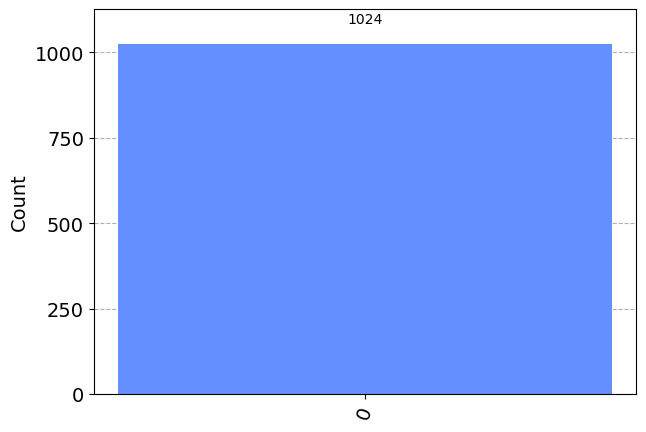

In [2]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Define Shor code parameters
n = 9  # Total qubits
k = 1  # Logical qubits (information qubits)

# Create a quantum circuit
shor_circuit = QuantumCircuit(n, k)

# Apply Hadamard gate to all qubits
shor_circuit.h(range(n))

# Error introduction simulation
# For simplicity, we introduce a bit-flip error on the first qubit
shor_circuit.x(0)  # Bit-flip error on the first qubit

# Apply CNOT gates for entanglement
for i in range(n - k):
    shor_circuit.cx(i, i + k)  # Fix indexing here

# Apply Hadamard gate to the first k qubits (logical qubits)
shor_circuit.h(range(k))

# Measure the first k qubits
shor_circuit.measure(range(k), range(k))

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(shor_circuit, simulator).result()
counts = result.get_counts(shor_circuit)

# Print and plot the results
print("Measurement results:", counts)
plot_histogram(counts)


C:\Users\yashr\AppData\Local\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


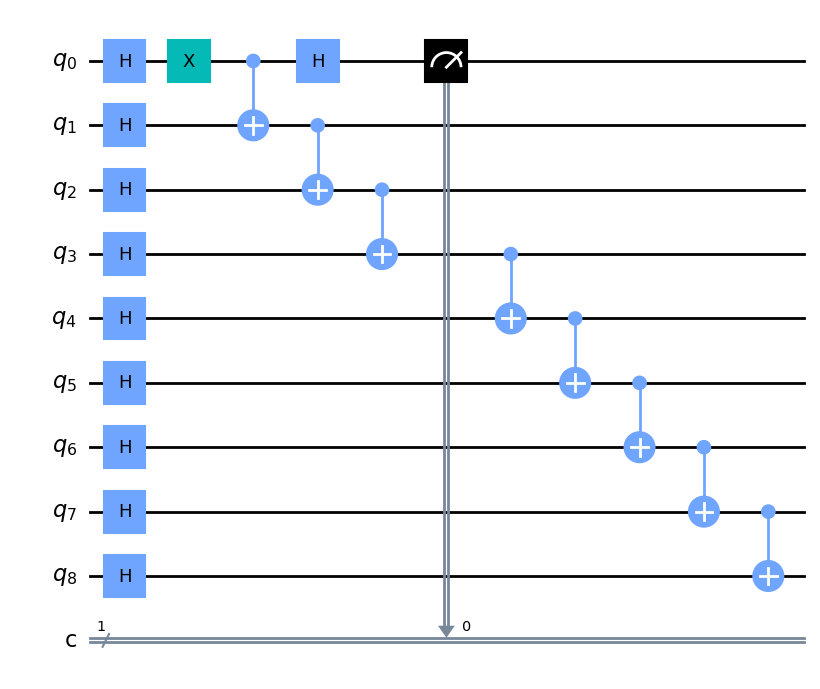

In [3]:
shor_circuit.draw("mpl")

# QKD Standardization:

Efforts to standardize QKD protocols to promote interoperability and facilitate the widespread adoption of quantum-safe cryptographic systems.

QKD Standardization: Paving the Way for Quantum-Safe Communication
Quantum key distribution (QKD) offers a revolutionary approach to cryptography, promising unbreakable communication even against future advancements in quantum computing. However, widespread adoption of this technology hinges on standardization, which ensures interoperability and facilitates implementation across diverse networks and devices. 

Current Standardization Landscape:

Several organizations are actively involved in QKD standardization efforts, each focusing on different aspects:

International Telecommunication Union (ITU-T): Develops recommendations for QKD network systems, covering functionalities, network architectures, and security requirements. Key recommendations include Y.3800 (framework for QKD network systems) and Y.3801 (functional requirements for QKD networks).
International Organization for Standardization (ISO): Focuses on QKD security requirements, including component level security and protocols. Their recently released ISO/IEC 22810 series defines a common set of security functional requirements (SFRs) for QKD modules.
European Telecommunications Standards Institute (ETSI): Develops QKD use cases, application interfaces, and device characterization methodologies. Their work aims to stimulate QKD market growth and ensure safe and secure implementations.
Benefits of Standar
ization:

Standardization offers numerous benefits for QKD adoption and development:

Interoperability: Enables seamless integration of QKD solutions from different vendors, allowing for flexible network deployments.
Security: Provides a common baseline for security requirements, ensuring robust protection against potential vulnerabilities.
Market Growth: Fosters confidence in QKD technology, encouraging investment and accelerating market adoption.
Reduced Development Costs: Standardizing common functionalities reduces redundant development efforts, lowering costs for vendors and operators.
Challenges and Future Directions:

Despite significant progress, QKD standardization faces some challenges:

Rapidly Evolving Technology: Keeping standards current with the fast pace of QKD development can be challenging.
Diversity of Implementations: Different hardware platforms and protocols introduce complexity in defining generic standards.
Balancing Security and Performance: Achieving robust security without sacrificing efficiency and performance requires careful consideration.
Future efforts will focus on:

Addressing evolving threats: Continuously update standards to encompass new attack vectors and vulnerabilities.
Standardizing specific protocols: Develop standards for specific QKD protocols like BB84 or Measurement-Device-Independent QKD (MDI-QKD).
Encouraging innovation: Maintain flexibility in standards to allow for innovative solutions while ensuring core security principles.
Equations and Information:

Understanding QKD standardization requires knowledge of:

Quantum Cryptography Principles: Basic concepts like quantum superposition, entanglement, and Bell's inequality.
Security Protocols: Details of specific QKD protocols like BB84, MDI-QKD, and their security proofs.
Quantum Network Architectures: Different network configurations and functionalities for secure QKD communication.
Resources like the ITU-T QKD recommendations and ISO/IEC 22810 series provide detailed technical specifications and equations for
those seeking deeper understanding.

Conclusion:

QKD standardization is crucial for unlocking the potential of quantum-safe communication. By addressing the challenges and embracing innovation, we can pave the way for a future where secure communication remains unbreakable, even in the face of quantum computing advancements.

Remember, QKD standardization is a complex and ongoing process. As you delve deeper, utilize available resources, stay updated on the latest developments, and contribute to shaping the future of quantum-safe communication.

In [2]:
from qiskit import QuantumCircuit, Aer, execute

def create_bbm92_circuit():
    # Create a quantum circuit with 2 qubits and 2 classical bits
    circuit = QuantumCircuit(2, 2)

    # Prepare an initial state (Alice's qubits)
    circuit.h(0)
    circuit.h(1)
    circuit.barrier()

    # Apply a controlled-X gate (CNOT) to create entanglement
    circuit.cx(0, 1)
    circuit.barrier()

    # Apply Hadamard gate to the first qubit (Alice's measurement)
    circuit.h(0)
    circuit.barrier()

    # Measure qubits and store results in classical bits
    circuit.measure([0, 1], [0, 1])

    return circuit

def simulate_bbm92_circuit(circuit):
    # Use Aer simulator for simulation
    simulator = Aer.get_backend('qasm_simulator')

    # Simulate the circuit
    result = execute(circuit, simulator, shots=1).result()

    # Get the counts from the result
    counts = result.get_counts(circuit)

    return counts

def main():
    # Create BBM92 QKD circuit
    bbm92_circuit = create_bbm92_circuit()

    # Simulate the circuit
    counts = simulate_bbm92_circuit(bbm92_circuit)

    # Display the results
    print("Qubit measurement results:", counts)

if __name__ == "__main__":
    main()


Qubit measurement results: {'00': 1}


# QKD Implementations in Quantum Computing Platforms:

Integrating QKD with emerging quantum computing technologies for enhanced security in quantum networks.

Quantum Key Distribution (QKD) is a cryptographic technique that uses the principles of quantum mechanics to secure communication by enabling two parties to produce a shared random secret key. This key can then be used for encrypting and decrypting messages, providing a secure means of communication. Integrating QKD with emerging quantum computing technologies enhances security in quantum networks, ensuring that cryptographic keys remain secure even in the era of powerful quantum computers that could potentially break classical encryption algorithms.

Let's delve into the key aspects of QKD implementations in quantum computing platforms, covering relevant equations and information in quantum computing:

### Basics of Quantum Key Distribution (QKD):

1. **Quantum Key Distribution Protocol:**

   The most common QKD protocol is the BBM92 (Bennett-Brassard-Mermin 1992) protocol, which involves the following steps:

   a. **Key Generation:** The sender (Alice) encodes bits using quantum states (e.g., polarized photons), and the receiver (Bob) measures these quantum states.

   b. **Quantum Measurement:** Bob measures the received quantum states using a compatible basis.

   c. **Public Discussion:** Alice and Bob publicly discuss the basis used for encoding and measuring each bit without revealing the actual bits.

   d. **Error Correction and Privacy Amplification:** Through classical communication, Alice and Bob perform error correction and privacy amplification to obtain a final secure key.

2. **Key Parameters in QKD:**

   a. **Qubit States:** Commonly used qubit states for encoding information include polarized photons (e.g., in BBM92 protocol).

   b. **Basis Choices:** Alice and Bob choose the basis for encoding and measuring qubits, respectively. They later disclose this information to detect and correct errors.

   c. **Quantum Bit Error Rate (QBER):** The error rate due to discrepancies in basis choices and measurement outcomes.

   d. **Distillation:** The process of distilling a shorter, more secure key from a longer raw key by removing errors.

### Integrating QKD with Quantum Computing:

1. **Quantum-Safe Cryptography:**

   a. **Post-Quantum Cryptography:** Using cryptographic algorithms that are believed to be secure against attacks by quantum computers.

   b. **Hybrid Cryptography:** Combining classical and quantum-safe encryption methods.

2. **Quantum Processing Units (QPUs):**

   a. **Quantum Circuits for QKD:** Designing quantum circuits that can efficiently execute QKD protocols.

   b. **Quantum Entanglement for QKD:** Utilizing entangled qubits to enhance the security and efficiency of QKD.

3. **Quantum Network Topologies:**

   a. **Quantum Repeaters:** Extending the range of quantum communication over longer distances.

   b. **Quantum Memories:** Storing and retrieving quantum states for efficient information transfer.

### Relevant Equations:

1. **Quantum State Representation:**

   The state of a qubit can be represented using the Bloch sphere, with the state vector |ψ⟩ = α|0⟩ + β|1⟩.

2. **Bell State Measurement (BSM):**

   The measurement of entangled qubits can be described using Bell states, such as the maximally entangled state |Φ⁺⟩ = (|00⟩ + |11⟩)/√2.

3. **Quantum Key Rate (QKR):**

   The QKR depends on factors like the QBER and the efficiency of error correction. It is often represented by equations specific to the chosen QKD protocol.

4. **Security Parameters:**

   Security parameters, such as the length of the final secure key and the level of privacy amplification, are integral to QKD protocols.

### Challenges and Future Directions:

1. **Technological Challenges:**

   a. **Quantum Error Correction:** Mitigating errors introduced during quantum computations.

   b. **Quantum Communication Infrastructure:** Developing robust quantum communication channels.

2. **Quantum Network Security:**

   a. **Secure Quantum Repeaters:** Addressing security concerns in long-distance quantum communication.

   b. **Scalability:** Ensuring QKD scalability for large-scale quantum networks.

3. **Quantum Hacking and Countermeasures:**

   a. **Quantum Key Distribution Hacking:** Investigating potential vulnerabilities and developing countermeasures.

   b. **Quantum-Secure Protocols:** Ongoing research to enhance the security of QKD in the face of evolving quantum technologies.

In summary, integrating QKD with emerging quantum computing platforms involves combining quantum communication principles with quantum-safe cryptographic methods. The choice of quantum protocols, network topologies, and processing units is crucial for achieving secure quantum communication in the era of powerful quantum computers. Continuous research and advancements are essential to address challenges and ensure the robustness of quantum key distribution implementations.

In [7]:
# Begin by importing some necessary modules
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes

#Helper function that returns the number of characters different in two strings
def char_diff(str1, str2):
    return sum ( str1[i] != str2[i] for i in range(len(str1)) )

# Messages to be hashed
message_1 = b"Buy 10000 shares of WXYZ stock now!"
message_2 = b"Buy 10000 shares of VXYZ stock now!"

print(f"The two messages differ by { char_diff(message_1, message_2)} characters")

The two messages differ by 1 characters


In [8]:
# Create new SHA-256 hash objects, one for each message
chf_1 = hashes.Hash(hashes.SHA256(), backend=default_backend())
chf_2 = hashes.Hash(hashes.SHA256(), backend=default_backend())

# Update each hash object with the bytes of the corresponding message
chf_1.update(message_1)
chf_2.update(message_2)

# Finalize the hash process and obtain the digests
digest_1 = chf_1.finalize()
digest_2 = chf_2.finalize()

#Convert the resulting hash to hexadecimal strings for convenient printing
digest_1_str = digest_1.hex()
digest_2_str = digest_2.hex()

#Print out the digests as strings 
print(f"digest-1: {digest_1_str}")
print(f"digest-2: {digest_2_str}")

print(f"The two digests differ by { char_diff(digest_1_str, digest_2_str)} characters")

digest-1: 6e0e6261b7131bd80ffdb2a4d42f9d042636350e45e184b92fcbcc9646eaf1e7
digest-2: 6b0abb368c3a1730f935b68105e3f3ae7fd43d7e786d3ed3503dbb45c74ada46
The two digests differ by 57 characters


In [9]:
# Install the library if needed
%pip install secretpy

# import the required crypto functions which will be demonstrated later
from secretpy import Caesar
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from functools import reduce
import numpy as np

# Set the plaintext we want to encrypt
plaintext=u"this is a strict top secret message for intended recipients only"
print(f"\nGiven plaintext: {plaintext}")

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: secretpy in c:\users\yashr\appdata\local\anaconda3\lib\site-packages (0.12.0)


Given plaintext: this is a strict top secret message for intended recipients only


In [10]:
# initialize the required python object for doing Caesar shift encryption
caesar_cipher = Caesar()

# Define the shift, ie the key
caesar_key = 5 
print(f"Caesar shift secret key: {caesar_key}")

# Define the alphabet
alphabet=('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ')
print(f"alphabet: {alphabet}")

Caesar shift secret key: 5
alphabet: ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ')


In [11]:
caeser_ciphertext = caesar_cipher.encrypt(plaintext, caesar_key, alphabet)
print(f"Encrypted caeser shift ciphertext: {caeser_ciphertext}")

Encrypted caeser shift ciphertext: ymnxenxefexywnhyeytuexjhwjyerjxxfljektwensyjsijiewjhnunjsyxetsqc


In [12]:
caeser_plaintext = caesar_cipher.decrypt(caeser_ciphertext, caesar_key, alphabet)
print(f"Decrypted caeser shift plaintext: {caeser_plaintext}\n")

Decrypted caeser shift plaintext: this is a strict top secret message for intended recipients only



In [13]:
# lamba defines an inline function in this case that takes two values a,b with the resulting expression of a+b
# reduce uses a two-argument function(above), and applies this to all the entries in the list (random alphabet characters) cumulatively
aes_key = reduce(lambda a, b: a + b, [np.random.choice(alphabet) for i in range(16)])

print(f'AES secret key: {aes_key}')

AES secret key: rpmjvk lruqrndfk


In [14]:
aes_initialization_vector = reduce(lambda a, b: a + b, [np.random.choice(alphabet) for i in range(16)])
print(f"AES initialization vector: {aes_initialization_vector}")

AES initialization vector: gcyasgslaifjj nw


In [15]:
# The encryptor is setup using the key & CBC. In both cases we need to convert the string (utf-8) into bytes
sender_aes_cipher = Cipher(algorithms.AES(bytes(aes_key, 'utf-8')), modes.CBC(bytes(aes_initialization_vector, 'utf-8')))
aes_encryptor = sender_aes_cipher.encryptor()

# update can add text to encypt in chunks, and then finalize is needed to complete the encryption process
aes_ciphertext = aes_encryptor.update(bytes(plaintext, 'utf-8')) + aes_encryptor.finalize()

# Note the output is a string of bytes
print(f"Encrypted AES ciphertext: {aes_ciphertext}")

Encrypted AES ciphertext: b'\x17\xe2\x93\xa2\xac\x15\xf9Fp\xf6\x81\x93\xeb\x96\xa0JbX\x13\xf5,\xa2\xe8=\x91Z\xb9\xe6d\xdd\xbc\xd2\x12\x7f\xca\x04dX\t.\x9a\x97g\xd0D%p\\\x12\xaa\xd9_&\x84\x05\x0ft\x91\xfd\xa7\xa6\xd0\xe8f'


In [16]:
# Similar setup of AES to what we did for encryption, but this time, for decryption
receiver_aes_cipher = Cipher(algorithms.AES(bytes(aes_key, 'utf-8')), modes.CBC(bytes(aes_initialization_vector, 'utf-8')))
aes_decryptor = receiver_aes_cipher.decryptor()

# Do the decryption
aes_plaintext_bytes = aes_decryptor.update(aes_ciphertext) + aes_decryptor.finalize()

# convert back to a character string (we assume utf-8)
aes_plaintext = aes_plaintext_bytes.decode('utf-8')

print(f"Decrypted AES plaintext: {aes_plaintext}")

Decrypted AES plaintext: this is a strict top secret message for intended recipients only


In [17]:
# Example function to compute the gcd (greatest common divisor) 
def gcd(a,b):
    if b==0:
        return a
    else:
        return gcd(b,a%b)
    
# let's calculate some examples using algorithm
n1=gcd(50,10)
n2=gcd(99,33)
n3=gcd(59,9)

# do the same with the python library call
import math
m1=math.gcd(50,10)
m2=math.gcd(99,33)
m3=math.gcd(59,9)

# Confirm they are the same
assert(n1==m1)
assert(n2==m2)
assert(n3==m3)

# They are - print out the values for explanation
print("gcd(50,10) =",m1)
print("gcd(99,1033) =",m2)
print("gcd(59,9) =",m3)

gcd(50,10) = 10
gcd(99,1033) = 33
gcd(59,9) = 1


In [18]:
# Choosing two prime numbers and keep them secret
p = 13
q = 19
print("The secret prime numbers p and q are:", p, q)

The secret prime numbers p and q are: 13 19


In [19]:
# Calculate n which is the modulus for both the public and private keys
n = p * q
print("modulus n (p*q)=",n)

modulus n (p*q)= 247


In [20]:
# Compute Euler's totient function, φ(n) and keep it secret
phi = (p-1) * (q-1)
print("The secret Euler's function (totient) [phi(n)]:",phi)

The secret Euler's function (totient) [phi(n)]: 216


In [21]:
# Choose an integer e such that e and φ(n) are coprime
e = 2
while (e < phi):
    if (math.gcd(e, phi)==1):
        break
    else:
        e += 1
print("Public Key (e):",e)

Public Key (e): 5


In [22]:
# Compute a value for d such that (d * e) % φ(n) = 1
d = 1
while(True):
    if((d*e) % phi == 1):
        break
    else:
        d += 1
print("Private Key (d):",d)

Private Key (d): 173


In [23]:
# Public and Private Key pair
public = (e, n)
private = (d, n)

print(f"The Public key is {public} and Private Key is {private}")

The Public key is (5, 247) and Private Key is (173, 247)


In [24]:
# Encryption function
def encrypt(plain_text):
    return (plain_text ** e) % n

# Decryption function
def decrypt(cipher_text):
    return (cipher_text ** d) % n

# Simple message to encode
msg = 9

# encrypt then decrypt
enc_msg = encrypt(msg)
dec_msg = decrypt(enc_msg)

print("Original Message:",msg)
print("Encrypted Message:",enc_msg)
print("Decrypted Message:",dec_msg)

Original Message: 9
Encrypted Message: 16
Decrypted Message: 9


In [25]:
! pip install cryptography
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.fernet import Fernet
from cryptography.hazmat.primitives import hashes

symmetric_key = Fernet.generate_key()
print(f"\nSymmetric key generated by Alice: {symmetric_key}")


Symmetric key generated by Alice: b'WVtCwYeKVqoe19IxkaYTDl3HRF4DJuhCZDyJIzYaUkI='


In [26]:
# Bob generates a 2048-bit RSA key pair
bob_private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048)
bob_public_key = bob_private_key.public_key()
print(f"Public key broadcast by Bob: {bob_public_key}")
print(f"\nPublic numbers in Bobs' public key: {bob_public_key.public_numbers()}")

Public key broadcast by Bob: <cryptography.hazmat.backends.openssl.rsa._RSAPublicKey object at 0x0000025F65689550>

Public numbers in Bobs' public key: <RSAPublicNumbers(e=65537, n=19413892513831508743095279150587604486092848921788348215622687704074677232629513357810826446791438431469862512303424592590009741753220487060075999712029496920862563465900854407775348398442472332851447406666612079619842173505149679743852340617078867170941133020569076152948006509163004472749282011793807506233790165043758679275801162535465339525103613294287173380526125067140070446460894458726231313467282150821374520513438846229925054584511168397363267438423236043157495454104869878140491946590781337012526841168922856827765494589185407351020852865346520110961518825313611524966863302885847625204995388899523532868513)>


In [27]:
# Encryption
ciphertext = bob_public_key.encrypt(
   symmetric_key,
   padding.OAEP(
       mgf=padding.MGF1(algorithm=hashes.SHA256()),
       algorithm=hashes.SHA256(),
       label=None
   )
)

print("Ciphertext:", ciphertext)

Ciphertext: b"\x05p\xe9\xce\xdf\xf3g;\xb1\x7f'\xc8\xbb0\x9a\x83L\x82\xc3\x92\xdb\xbf\x00\x1f\x1a-\x81\x10\xec\x0e\x1e\xb8V\t\x1f\xc8\xe2\xe1\xc3\xfa\xcdB\x10;\xba_\xec\xbe\x8d=\x1f\x83]\x1e2\x0f\xa4\xe8\x987\xedZz#\x02(\xfaiG\xee\xdaM\xdb\xd3A\xe9@\xf0(Ku\xcc\xa8\xc4\xbdR\x17\x90\x1e\xab\xd01\x97m\x8b\xd6\xf7H\xda\xfcen\xcf\xa2k\x96#\xdc\xd6\xba]AI,\xa5\xf9np\x12\xc0\x8cV\x04\xa0\x90\xcd\xcc,\xdf\x1b\xbb\xcf{\xa8N\xb0Ev.\x0bew\x1dr@\xd5\xe4\xbe\x9c\xb8\x18\xb6\x03\xbe.\x9a8\xc64\x84>\xc5\xfcN\x99\x90\xfe\x8aw\xd9g\x0bF\t\xb2A\xdc\xc3y\xa0\x84\xfd\xfb\xd2w\x1d#\xbd|w\xee\xc5\x1e\x8c\x84|\x82\xc2\x99\xf0CMT\x89\x8f\x18K\xf7\xe1\xd7\xa9\x058\x9b_\xa1\xf47'\xe6\x8a\x9b\x11\xb54z\xfb\xd3\x978\xe68 9\xcf\xd7w\xd9\xa9\xa8k\xe8j\x9b\x16a\xcf\x04\x92\xcb\x1dh\xcc\x9eff"


In [28]:
# Bob decrypts ciphertext to access the symmetric key
decrypted_symmetric_key = bob_private_key.decrypt(
   ciphertext,
   padding.OAEP(
       mgf=padding.MGF1(algorithm=hashes.SHA256()),
       algorithm=hashes.SHA256(),
       label=None
   )
)

print("Decrypted key:", decrypted_symmetric_key)
assert decrypted_symmetric_key == symmetric_key

Decrypted key: b'WVtCwYeKVqoe19IxkaYTDl3HRF4DJuhCZDyJIzYaUkI='


In [29]:
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives import hashes, serialization
from os import urandom

# Bob's RSA key pair
private_key_Bob = rsa.generate_private_key(public_exponent=65537, key_size=2048)
public_key_Bob = private_key_Bob.public_key()

print("Bob's private and public keys created")

Bob's private and public keys created


In [30]:
Alice_long_secret = urandom(160)  # A 160 byte or 1280 bit random message
print("Alice's secret created")

Alice's secret created


In [31]:
Alice_encrypted_secret = public_key_Bob.encrypt(
    Alice_long_secret,
    padding.OAEP(
        mgf=padding.MGF1(algorithm=hashes.SHA256()),
        algorithm=hashes.SHA256(),
        label=None
    )
)
print("Alice's secret encrypted")

Alice's secret encrypted


In [32]:
Bob_decrypted_secret = private_key_Bob.decrypt(
    Alice_encrypted_secret,
    padding.OAEP(
        mgf=padding.MGF1(algorithm=hashes.SHA256()),
        algorithm=hashes.SHA256(),
        label=None
    )
)

assert Alice_long_secret == Bob_decrypted_secret, "Secrets do not match!"

# if we get here they match
print("Secrets match")

Secrets match


In [33]:
def key_derivation_function(secret, salt):
    hkdf = HKDF(
        algorithm=hashes.SHA256(),
        length=32,  # Desired key length
        salt=salt,
        info=None,
        backend=None
    )
    return hkdf.derive(secret)

common_salt = urandom(16)  # Random salt accessible to both Alice and Bob

symmetric_key_Alice = key_derivation_function(Alice_long_secret, common_salt)
symmetric_key_Bob = key_derivation_function(Bob_decrypted_secret, common_salt)

assert symmetric_key_Alice == symmetric_key_Bob, "Derived keys do not match!"
print(f"A symmetric key of length {len(symmetric_key_Alice)*8} bits was successfully derived by both Alice and Bob!")

A symmetric key of length 256 bits was successfully derived by both Alice and Bob!


In [34]:
from cryptography.hazmat.primitives import hashes, serialization
from cryptography.hazmat.primitives.asymmetric import padding, rsa
from cryptography.hazmat.primitives.asymmetric.utils import Prehashed

# Generate keys for Bob
bob_private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048)
bob_public_key = bob_private_key.public_key()

# Generate keys for Alice
alice_private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048)
alice_public_key = alice_private_key.public_key()

print("Private and Public keys generated for Bob and Alice.")

Private and Public keys generated for Bob and Alice.


In [35]:
# Alice encrypts the message using Bob's public key
ciphertext = bob_public_key.encrypt(
    symmetric_key,
    padding.OAEP(
        mgf=padding.MGF1(algorithm=hashes.SHA256()),
        algorithm=hashes.SHA256(),
        label=None
    )
)

print("ciphertext of symmetric key: ",ciphertext)

ciphertext of symmetric key:  b'\x16\xd5W\xea\xc1\x8c\x80GEn\x8b\x95\x15\xf4\x9e\x997\xf8y|\xb46\x8dw\xe1~\xf8\xe2c\xce\xd2\xf8\x9e\xd8\x1cgg\x92\x02~h\x7f\xaa\xf6FD\xc6\x11\x90\xc0\x1b\x99r\xff\xe4K\xc1\x01\x87\x1d\xba\xfd\xd6#eu\xe4\xb2\xd3\xc2H\';\x85\x0bD-P9\x1ff\xd4\x7f-\x99\xfe\xf5\xfdd\x81i\xd1?{\xa3W\xcaY?\x95{\xcd\x12\x10\xb3m\x811y\x9a2\xe2\x08\xa47\xd5B,\x05p\x85\xc9`\xef\xd0^<\xd2\x98\x87\xf0\xe3\xac\x97\xc9\x15\x0cP\x05\xf7r\xd7U6\xb6l\x02o\xc5\xd1\xb5\xaa\x92\xfb\xb9\x8f\xd4\x83\xbe\xb9o\x1f\xfch\xf9D\x7f\x90P\xe7\xf2qHt\x8d\x98\xd9\x02p\xf7y\x1d\xa5\xb4\x99\x05\xe3\x99\x12\x82I\xf3\xa1{}\xa3\xe4\xb6:\x1c"\x11D}H\xa2_k\x19\xc1xW\xfaQ2eJ\x8b\xc0j\t\xd3\xd6\x0cHSXF:\xfbg\x1c\xb2\xf9\nm"\xa3q\xd1\xe2iJ\xb7t\x977\xc8)\x00\xbfj\xf3\xa3\xc5\x06'


In [36]:
# Alice signs the ciphertext using her private key
digest = hashes.Hash(hashes.SHA256())
digest.update(ciphertext)
hash_to_sign = digest.finalize()

signature = alice_private_key.sign(
    hash_to_sign,
    padding.PSS(
        mgf=padding.MGF1(hashes.SHA256()),
        salt_length=padding.PSS.MAX_LENGTH
    ),
    Prehashed(hashes.SHA256())
)

print("signature: ",signature)

signature:  b'\\\x1aF\xfb\x14\xc0\xadg}\xb5\xfa\xd2\xd7\x9d\x95\xe6l\x8dD\xd6\xb7\xf0\xd1q/g7\xbd\xf7z\x17_t\xec\xd1PQm\xecm:\xd9\x07[\x07YP\x07Z\x90E\xf8\x1cl$\x12\xa7\x88^@j\x9f\x89E\xe9I~\xf9\xe0\xf2\xc0=\x05\x1br\x1f\xdc\x1bb3\x8b\x1dp,\xd3\x9fY\xff\xc5"-\xcb&\xc8s\x05f\'\x906<\xa1\xa1=)\xf66at$\x0c{\xa5+\xaa\r\xd3<\xefY\x030q\xa0\xd5\x90\xf7\xf8\xe0\xb8\xd7\xed\xe0\xd0\xf8\x02\xba\x99\xacX\x96\t\xc2\xb4\xacM(>\xaaM\x04\x8c\x1e\x13\x8b\x14\xfc\x8b\xd2H\x01\xdb\xadq>\xd1f\tb\xd4\xf1\x15x\x1e\xc7\xe5\x99R\xa5\x0b(\xba\xbc\xa9:\xd91pz@\xda\r\xb1\xe2\xf3\x15+BZ\x93\xf4\x92\x13&*\x84\xef\x83nV\x15\x10c{l?cd\x86\x9c\xda\x90\xaef0\x9f\xc3e>.\x06\xb2dd\xc4\xa2\xa5-;\xc4\x87\\\xc7I_\xe2\xb9\xcaq`\xfcv\xcc\xbb\xedP'


In [37]:
# Bob receives the ciphertext and signature
received_ciphertext = ciphertext
received_signature = signature

# Send signature and ciphertext here
print("Sending ciphertext and signature.....")

Sending ciphertext and signature.....


In [38]:
#Bob creates a hash of the ciphertext using the same algorithm used by Alice
digest = hashes.Hash(hashes.SHA256())
digest.update(received_ciphertext)
hash_to_verify = digest.finalize()

print("hash to verify: ",hash_to_verify)

hash to verify:  b'\xf6G\xc3tbd\x10\xc6\xc0\x17X \x88\xc5r\x8f5+\xea\rU\xb0%\xeci\x98\xb1\xe2\xe1\xd8=\x98'


In [39]:
# Bob verifies the signature using Alice's public key
try:
    alice_public_key.verify(
        received_signature,
        hash_to_verify,
        padding.PSS(
            mgf=padding.MGF1(hashes.SHA256()),
            salt_length=padding.PSS.MAX_LENGTH
        ),
        Prehashed(hashes.SHA256())
    )
    print("The signature is valid.")
except:
    print("The signature is not valid.")

The signature is valid.


In [40]:
# Bob decrypts the message using his private key
decrypted_message = bob_private_key.decrypt(
    received_ciphertext,
    padding.OAEP(
        mgf=padding.MGF1(algorithm=hashes.SHA256()),
        algorithm=hashes.SHA256(),
        label=None
    )
)

print("Decrypted message:", decrypted_message.decode())

Decrypted message: WVtCwYeKVqoe19IxkaYTDl3HRF4DJuhCZDyJIzYaUkI=


In [41]:
n = 247  # the modulus
e = 5    # public key number
a = 6    # an integer coprime to n
assert gcd(a, n) == 1
print(f"Checked {n} and {a} are coprime")

Checked 247 and 6 are coprime


In [42]:
r=0
rem = 100
while(rem != 1):
    r += 1
    rem = (a**r) % n
    
print(f'period r is: {r}')
assert a**r % n == 1

print(f"Checked {a}^{r} mod {n} is 1")

period r is: 36
Checked 6^36 mod 247 is 1


In [43]:
# explicitly use as integer
f1 = int ( a**(r/2) - 1)
f2 = int ( a**(r/2) + 1)

print(f"f1 = {f1}")
print(f"f2 = {f2}")

f1 = 101559956668415
f2 = 101559956668417


In [44]:
q_found = gcd(f1, n)
print(f'One possible prime factor of n ({n}) is: {q_found}')

# explicit int (to avoid floating point)
p_found = int ( n/q_found )
print(f'The second prime factor of n ({n}) is: {p_found}')

assert n == p_found * q_found

One possible prime factor of n (247) is: 19
The second prime factor of n (247) is: 13


In [45]:
#Compute the totient
phi_found = ( p_found -1 ) * ( q_found - 1 ) 
print(f'The totient is: {phi_found}')

#Recover the private key number d_found by satisfying (d_found * e) % phi_found = 1
d_found = 1
while(True):
    if((d_found*e) % phi_found == 1):
        break
    else:
        d_found += 1
print("Private Key number:",d_found)

The totient is: 216
Private Key number: 173


In [46]:
#Step 1: Choose a prime `p` and a primitive root `a`
p = 11
a = 7

print(f"prime: {p}")
print(f"primitive root: {a}")

prime: 11
primitive root: 7


In [47]:
k_A = 4  #Alice's private key
h_A = (a**(k_A)) % p #Alice's public key

print(f"Alice's private key is {k_A} and public key is {h_A}")

k_B = 8  #Bob's private key
h_B = (a**(k_B)) % p #Bob's public key

print(f"Bob's private key is {k_B} and public key is {h_B}")

Alice's private key is 4 and public key is 3
Bob's private key is 8 and public key is 9


In [48]:
secret_key_alice  = h_B**k_A % p
secret_key_bob = h_A**k_B % p 
assert secret_key_alice == secret_key_bob
print(f'The shared secret key is: {secret_key_bob}')

The shared secret key is: 5


In [49]:
from random import randint

# parameter generation: select the primes q, p and generator g:
# EXPERIMENT with the values, they must meet certain rules
# this example code does not verify p,q are prime

q = 11
p = 23
g = 4

assert( (p-1) % q  == 0 )
assert( g>=2)
assert( g <= (p-2) )
assert( ( pow(g,(p-1)/q) % p) != 1)

print(f"Public information is good: q={p}, p={q}, g={g}")

Public information is good: q=23, p=11, g=4


In [50]:
# Alice chooses an integer randomly from {2..q-1}
# EXPERIMENT with the values

alice_private_key = randint(2, q-1)
#alice_private_key =  

assert(alice_private_key >= 2)
assert(alice_private_key <= (q-1) ) 

print(f"Alice's private key is {alice_private_key}")

Alice's private key is 3


In [51]:
alice_public_key = pow(g,alice_private_key,p)
# Alternatively can use (g ** alice_private_key) % p

print(f"Alice's public key is {alice_public_key}")

Alice's public key is 18


In [52]:
hash_dict={}
def mock_hash_func(inp):
    print(inp)
    if not inp in hash_dict:
        hash_dict[inp] = randint(1,q)
    return hash_dict[inp]

alice_message = "Inspection tomorrow!"
alice_hash = mock_hash_func(alice_message)  # In reality, you'd use a hash function
print(f"Alice's message hash is: {alice_hash}")

Inspection tomorrow!
Alice's message hash is: 1


In [53]:
# brute-force implementation to find modular inverse
def modular_inverse(k, q):
    for i in range(0, q):
        if (k * i) % q == 1:
            return i
    print(f'error! no inverse found! for {k},{q}')
    return 0 
  
# Let's compare this algorithm with the standard python 'pow' function

n1=modular_inverse(3,7)
n2=modular_inverse(4,11)
n3=modular_inverse(7,5)
m1=pow(3,-1,7)
m2=pow(4,-1,11)
m3=pow(7,-1,5)

assert(n1==m1)
assert(n2==m2)
#assert(n3==m3)

print (f"modular_inverse(3,7) = {m1}")
print (f"modular_inverse(4,11) = {m2}")
print (f"modular_inverse(7,5) = {m3}")


# Some numbers don't have modular inverses - our function throws an error
n4=modular_inverse(2,6)

# The python library will throw an exception, which must be caught
try:
  m4=pow(2,-1,6)
except:
  print("Exception from pow() - no modular inverse found!")

modular_inverse(3,7) = 5
modular_inverse(4,11) = 3
modular_inverse(7,5) = 3
error! no inverse found! for 2,6
Exception from pow() - no modular inverse found!


In [54]:
signed=False
while( signed==False ):
    k = randint(1, q-1)  # Should be different for every message
    print("Using random k =",k)
    r = pow(g,k,p) % q
    if (r == 0):
      print(f"{k} is not a good random value to use to calculate r. Trying another k")
      continue
    # must restart algorithm if we get a 0 value for s (see above)
    s = (pow(k,-1,q) * (alice_hash + alice_private_key * r)) % q  
    if (s == 0):
      print(f"{k} is not a good random value to use to calculate s. Trying another k")
      continue  
    signed=True
    
signature = (r, s)
print(f"Alice's signature is : {(r,s)}")

Using random k = 8
Alice's signature is : (9, 9)


In [55]:
# Bob re-generates message hash using Alice's broadcast message
bob_hash = mock_hash_func(alice_message) 

#Bob computes auxiliary quantities w (using modular inverse), u1, u2 and v
w = (pow(s,-1,q)) % q  
u1 = (bob_hash * w) % q
u2 = (r * w) % q
v = ((g**u1 * alice_public_key**u2) % p) % q

if v == r:
    print("Signature is valid!")
else:
    print("Signature is invalid!")

Inspection tomorrow!
Signature is valid!


In [56]:
#import necessary library modules
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import dh, dsa
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives import serialization

# Generate DH parameters
parameters = dh.generate_parameters(generator=2, key_size=2048)

# Generate Alice's DH private key and public key
alice_dh_private_key = parameters.generate_private_key()
alice_dh_public_key = alice_dh_private_key.public_key()

# Generate Bob's DH private key and public key
bob_dh_private_key = parameters.generate_private_key()
bob_dh_public_key = bob_dh_private_key.public_key()

print("Public and private keys generated for Bob and Alice")

Public and private keys generated for Bob and Alice


In [57]:
# Generate DSA keys for Alice and Bob
alice_dsa_private_key = dsa.generate_private_key(key_size=2048)
alice_dsa_public_key = alice_dsa_private_key.public_key()
bob_dsa_private_key = dsa.generate_private_key(key_size=2048)
bob_dsa_public_key = bob_dsa_private_key.public_key()

print("Additional key pair generated for signing")

Additional key pair generated for signing


In [58]:
#Alice signs
alice_public_bytes = alice_dh_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo)
alice_signature = alice_dsa_private_key.sign(alice_public_bytes, hashes.SHA256())

print("Alice signed public key")

Alice signed public key


In [59]:
bob_public_bytes = bob_dh_public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo)
bob_signature = bob_dsa_private_key.sign(bob_public_bytes, hashes.SHA256())

print("Bob signed public key")

Bob signed public key


In [60]:
# Alice and Bob verify each other's DH public keys using DSA public keys
# An InvalidSignature exception will occur if they are not valid
alice_dsa_public_key.verify(alice_signature, alice_public_bytes, hashes.SHA256())
bob_dsa_public_key.verify(bob_signature, bob_public_bytes, hashes.SHA256())

print("Signatures are valid")

Signatures are valid


In [61]:
# Perform key exchange
alice_shared_key = alice_dh_private_key.exchange(bob_dh_public_key)
bob_shared_key = bob_dh_private_key.exchange(alice_dh_public_key)

print("Shared secrets generated")

Shared secrets generated


In [62]:
# Derive a shared symmetric key using key-stretching
def derive_key(shared_key):
    return HKDF(
        algorithm=hashes.SHA256(),
        length=32,
        salt=None,
        info=None,
    ).derive(shared_key)

alice_symmetric_key = derive_key(alice_shared_key)
bob_symmetric_key = derive_key(bob_shared_key)

assert alice_symmetric_key == bob_symmetric_key
print("Keys checked to be the same")

Keys checked to be the same


In [63]:
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.primitives import hashes

# Each party generates a private key
private_key1 = ec.generate_private_key(ec.SECP384R1())
private_key2 = ec.generate_private_key(ec.SECP384R1())

# They exchange public keys
public_key1 = private_key1.public_key()
public_key2 = private_key2.public_key()

# Each party uses their own private key and the other party's public key
# to derive the shared secret
shared_key1 = private_key1.exchange(ec.ECDH(), public_key2)
shared_key2 = private_key2.exchange(ec.ECDH(), public_key1)

# The shared secrets are the same
assert shared_key1 == shared_key2
print("Keys checked to be the same")

Keys checked to be the same


In [64]:
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import ec

# Generate a private key for use in the signature
private_key = ec.generate_private_key(ec.SECP384R1())

message = b"A message to be signed"

# Sign the message
signature = private_key.sign(message, ec.ECDSA(hashes.SHA256()))

# Anyone can verify the signature with the public key
public_key = private_key.public_key()
try:
    public_key.verify(signature, message, ec.ECDSA(hashes.SHA256()))
    print("The signature is valid.")
except:
    print("The signature is invalid.")

The signature is valid.


In [65]:
import numpy as np
from matplotlib import pyplot as plt
n=8
q=127
N=int(1.1*n*np.log(q))
sigma=1.0
print(f"n={n},q={q},N={N},sigma={sigma}")

n=8,q=127,N=42,sigma=1.0


In [66]:
def chi(stdev, modulus):
    return round((np.random.randn() * stdev**2))%modulus

# print some examples
sd=2
m=1000
for x in range(10):
  print("chi = ",chi(sd,m))

chi =  4
chi =  2
chi =  4
chi =  0
chi =  998
chi =  993
chi =  998
chi =  3
chi =  996
chi =  0


In [67]:
#Alice's private key
alice_private_key = np.random.randint(0, high=q, size=n)
print(f"Alice's private key: {alice_private_key}")

Alice's private key: [110 116  34  28  70  29  35  32]


In [68]:
#Alice's Public Key
alice_public_key = []

# N is the number of values we want in the key
for i in range(N):
    # Get n random values between 0 and <q
    a = np.random.randint(0, high=q, size=n)
    # get an error to introduce
    epsilon = chi(sigma, q)
    #  calculate dot product (ie like array multiplication)
    b = (np.dot(a, alice_private_key) + epsilon) % q
    # value to be added to the key -
    sample = (a, b)
    alice_public_key.append(sample)
    
print(f"Alice's public key: {alice_public_key}")

Alice's public key: [(array([ 2,  5, 96, 44, 89, 82, 98, 38]), 7), (array([ 14, 100,  87, 114,  78,  66,  89,  36]), 71), (array([37, 23, 59, 90, 21, 25, 79, 91]), 87), (array([ 89, 125, 117,  62,  17, 121,  56,  45]), 2), (array([ 29, 103, 119,  51,  44,  26,  30,  81]), 22), (array([120,  59,  19,  62,  89, 110,  59, 118]), 96), (array([126,  95,  71,  35,  16, 116, 114,  39]), 24), (array([75, 69, 76, 72, 74, 96, 94, 80]), 124), (array([ 79, 112,  14, 122,  78,  57,  67,  22]), 49), (array([105,  42,  80, 103, 118,  17,  52,  44]), 98), (array([38,  3, 61, 17, 76, 76, 10, 61]), 13), (array([102, 115,  42,   2,  28,  11,  34,  23]), 23), (array([ 83,  12,  50,  34,  86, 109, 115, 123]), 89), (array([ 37, 122,  37,  17, 125,  20,  87,   6]), 12), (array([ 29,   1,  69,  27,  37,  51,   0, 114]), 28), (array([ 20,  34, 101,  25, 114,  39,  20, 104]), 48), (array([101,  48, 104,  79,  32,  11,  46, 103]), 45), (array([119,  80,   5,  19,   2,  61,  31, 124]), 63), (array([ 23, 117,  60,

In [69]:
#Encryption
bob_message_bit = 1
print(f"Bob's message bit={bob_message_bit}")

Bob's message bit=1


In [70]:
# a list of N values between 0 and <2 - ie 0 or 1
r = np.random.randint(0, 2, N)
print(r)

[1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 0]


In [71]:
sum_ai=np.zeros(n, dtype=int)
sum_bi=0

for i in range(N):
    sum_ai = sum_ai + r[i] * alice_public_key[i][0]
    sum_bi = sum_bi + r[i] * alice_public_key[i][1]
sum_ai = [ x % q for x in sum_ai ]
# sum_bi = sum_bi 
ciphertext = (sum_ai, (bob_message_bit*int(np.floor(q/2))+sum_bi)%q)
print(f"ciphertext is: {ciphertext}")

ciphertext is: ([101, 33, 119, 116, 8, 34, 43, 118], 38)


In [72]:
#Decryption
adots = np.dot(ciphertext[0], alice_private_key) % q
b_adots = (ciphertext[1] - adots) % q

decrypted_message_bit = round((2*b_adots)/q) % 2

print(f"original message bit={bob_message_bit}, decrypted message bit={decrypted_message_bit}")

assert bob_message_bit == decrypted_message_bit

original message bit=1, decrypted message bit=1


In [73]:
bob_message_bits = np.random.randint(0, 2, 16)
print(f"Bob's message bits are : {bob_message_bits}")
decrypted_bits = []

for ib in range(len(bob_message_bits)):
    bob_message_bit = bob_message_bits[ib]

    r = np.random.randint(0, 2, N)
    
    sum_ai=np.zeros(n, dtype=int)
    sum_bi=0
    for i in range(N):
        sum_ai = sum_ai + r[i] * alice_public_key[i][0]
        sum_bi = sum_bi + r[i] * alice_public_key[i][1]
    sum_ai = [ x % q for x in sum_ai ]

    ciphertext = (sum_ai, (bob_message_bit*int(np.floor(q/2))+sum_bi)%q)

    adots = np.dot(ciphertext[0], alice_private_key) % q
    b_adots = (ciphertext[1] - adots) % q

    decrypted_message_bit = round((2*b_adots)/q) % 2
    assert decrypted_message_bit == bob_message_bit

    decrypted_bits.append(decrypted_message_bit)
    
print(f"Decrypted message bits = {np.array(decrypted_bits)}")

Bob's message bits are : [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1]
Decrypted message bits = [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1]


In [74]:
import warnings
warnings.filterwarnings('ignore')
import oqs
from pprint import pprint

# Practical Considerations and Challenges:

Addressing practical issues such as system stability, error rates, and integration with classical cryptographic protocols.

Practical considerations and challenges in quantum computing are crucial aspects that need to be addressed to make quantum technologies feasible and useful in real-world applications. Here, we'll discuss several practical considerations related to system stability, error rates, and integration with classical cryptographic protocols in the context of quantum computing.

### System Stability:

1. **Decoherence and Quantum Error Correction:**
   Quantum systems are susceptible to environmental factors leading to decoherence, which can cause the loss of quantum information. Quantum error correction (QEC) protocols, such as the surface code, are crucial for mitigating errors caused by decoherence. The QEC process involves encoding quantum information redundantly to detect and correct errors.

   **Equation:**
   The stabilizer formalism used in QEC involves stabilizer generators \(G_i\) satisfying \(G_i \cdot |\psi\rangle = |\psi\rangle\), where \(|\psi\rangle\) is the encoded quantum state.

2. **Gate Fidelity and System Coherence:**
   Achieving high gate fidelities is essential for accurate quantum computations. Quantum gates should be implemented with high accuracy to prevent errors. Techniques such as pulse shaping and dynamic decoupling are employed to improve gate fidelities and increase system coherence times.

   **Equation:**
   Gate fidelity (\(F\)) is often defined as \(F = \frac{\text{Tr}(U^\dagger \cdot \text{Ideal Gate})}{\text{Tr}(U^\dagger \cdot U)}\), where \(U\) is the implemented gate and \(\text{Ideal Gate}\) is the desired gate.

3. **Temperature and Environmental Control:**
   Quantum computers typically operate at extremely low temperatures to reduce thermal noise and prevent decoherence. Dilution refrigerators are commonly used to cool quantum processors close to absolute zero.

### Error Rates:

1. **Quantum Error Rates:**
   The error rates in quantum computers are a critical metric. Lower error rates are desired for reliable quantum computations. Techniques such as error mitigation and error-agnostic algorithms are explored to address high error rates.

   **Equation:**
   The quantum error rate is often defined as the probability of a quantum gate producing an error (\(P_{\text{error}}\)).

2. **Quantum Error Correction Codes:**
   Quantum error correction codes, like the surface code, introduce redundancy to detect and correct errors. The code distance (\(d\)) is a measure of how many errors a code can correct.

   **Equation:**
   The code distance is defined as the minimum number of physical qubits that need to fail before an error cannot be corrected.

### Integration with Classical Cryptographic Protocols:

1. **Quantum Key Distribution (QKD):**
   QKD protocols, like BBM92 and E91, utilize quantum properties to establish secure communication channels. QKD offers the potential for unconditionally secure communication by detecting any eavesdropping attempts.

   **Equation:**
   Security in QKD is often quantified by the violation of Bell's inequality, as discussed earlier.

2. **Post-Quantum Cryptography:**
   The advent of quantum computers poses a threat to widely used classical cryptographic protocols, such as RSA and ECC, due to Shor's algorithm. Post-quantum cryptographic algorithms, resistant to quantum attacks, are being researched and developed.

   **Equation:**
   The security of classical cryptographic protocols is typically based on the complexity of certain mathematical problems, such as factoring large numbers in RSA.

### Additional Challenges:

1. **Quantum Hardware Calibration:**
   Calibration of quantum hardware is challenging due to device-specific imperfections. Calibration routines are essential to characterize and correct for systematic errors in quantum processors.

2. **Quantum Software Development:**
   Developing software for quantum computers requires dealing with the unique features and constraints of quantum hardware. Quantum programming languages, such as Qiskit and Cirq, facilitate quantum software development.

3. **Quantum Communication:**
   Implementing long-distance quantum communication is challenging due to issues such as quantum repeaters, loss of quantum information in communication channels, and maintaining quantum entanglement over large distances.

In conclusion, addressing these practical considerations and challenges is crucial for realizing the full potential of quantum computing in practical applications. Advances in quantum error correction, hardware stability, and integration with classical cryptographic protocols are actively researched areas within the quantum computing community.

In [4]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter, complete_meas_cal

# Define a simple quantum circuit
def create_quantum_circuit():
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    return qc

# Simulate the quantum circuit without error mitigation
def run_quantum_circuit(circuit):
    backend = Aer.get_backend('qasm_simulator')
    shots = 1024
    result = execute(circuit, backend, shots=shots).result()
    counts = result.get_counts(circuit)
    return counts

# Simulate the quantum circuit with error mitigation
def run_quantum_circuit_with_error_mitigation(circuit, calibration_matrix):
    backend = Aer.get_backend('qasm_simulator')
    
    # Apply mitigation to the circuit
    mitigated_circuit = CompleteMeasFitter(calibration_matrix).filter.apply(circuit)
    
    shots = 1024
    result = execute(mitigated_circuit, backend, shots=shots).result()
    counts = result.get_counts(mitigated_circuit)
    return counts

# Perform error mitigation calibration
def perform_error_mitigation_calibration(circuit, qr, cr):
    backend = Aer.get_backend('qasm_simulator')
    cal_circuits, state_labels = complete_meas_cal(qr=qr, cr=cr)
    job_cal = execute(cal_circuits, backend=backend, shots=1024)
    cal_results = job_cal.result()

    meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='measurement_calibration')
    return meas_fitter.cal_matrix

# Simulate Quantum Key Distribution (QKD) using BBM92 protocol
def quantum_key_distribution():
    # Implement the BBM92 QKD protocol (as an example)
    # This involves preparing, measuring, and sharing qubits between Alice and Bob
    # The quantum channel is simulated using quantum circuits

    # Alice generates qubits
    alice_circuit = QuantumCircuit(1, 1)
    alice_circuit.h(0)
    alice_circuit.measure(0, 0)

    # Bob measures qubits
    bob_circuit = QuantumCircuit(1, 1)
    bob_circuit.measure(0, 0)

    # Simulate the quantum circuit without error mitigation
    alice_counts = run_quantum_circuit(alice_circuit)
    bob_counts = run_quantum_circuit(bob_circuit)

    # Print and compare Alice's and Bob's measurement outcomes
    print("Alice's measurements:", alice_counts)
    print("Bob's measurements:", bob_counts)

    # Simulate the quantum circuit with error mitigation
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    calibration_matrix = perform_error_mitigation_calibration(alice_circuit, qr, cr)

    alice_counts_mitigated = run_quantum_circuit_with_error_mitigation(alice_circuit, calibration_matrix)
    bob_counts_mitigated = run_quantum_circuit_with_error_mitigation(bob_circuit, calibration_matrix)

    # Print and compare mitigated Alice's and Bob's measurement outcomes
    print("Mitigated Alice's measurements:", alice_counts_mitigated)
    print("Mitigated Bob's measurements:", bob_counts_mitigated)

# Example usage
quantum_circuit = create_quantum_circuit()
#counts = run_quantum_circuit(quantum_circuit)
#print("Counts without error mitigation:", counts)


C:\Users\yashr\AppData\Local\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


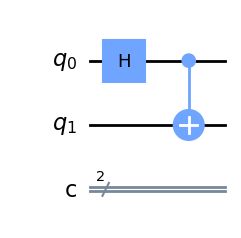

In [9]:
quantum_circuit.draw("mpl")

# Quantum-Secure Communication Protocols:

Exploring broader cryptographic protocols and communication schemes that leverage quantum principles for enhanced security.

Quantum secure communication protocols leverage the principles of quantum mechanics to provide enhanced security guarantees compared to classical cryptographic protocols. These protocols typically use quantum properties such as superposition, entanglement, and uncertainty to ensure the confidentiality and integrity of transmitted information. Here, I'll provide an overview of some important quantum secure communication protocols and the underlying principles they rely on.

1. **Quantum Key Distribution (QKD)**:
   - Quantum key distribution protocols enable two parties, traditionally referred to as Alice and Bob, to establish a secret key for secure communication using quantum channels.
   - The most well-known QKD protocol is the BB84 protocol, proposed by Charles Bennett and Gilles Brassard in 1984. BB84 utilizes the properties of quantum states (usually photons) to create a shared secret key between Alice and Bob.
   - In BB84, Alice prepares a random sequence of qubits (quantum bits) in one of two bases (usually the computational basis or the Hadamard basis) and sends them to Bob. Bob randomly measures the qubits in one of the two bases as well. After the transmission, Alice and Bob exchange information about the bases used, discard mismatched qubits, and use the remaining qubits to generate a shared secret key.
   - Any attempt by an eavesdropper (often called Eve) to intercept or measure the qubits will disturb their quantum states, alerting Alice and Bob to the presence of an attacker.

2. **Quantum-Secure Direct Communication (QSDC)**:
   - Quantum secure direct communication protocols enable two parties to communicate directly with each other without the need for shared secret keys.
   - Unlike QKD, where the focus is on establishing a shared secret key for subsequent classical communication, QSDC protocols transmit the information directly in a secure manner.
   - Various QSDC protocols exist, such as the ping-pong protocol, the three-step quantum secure direct communication protocol, and the entanglement swapping protocol.
   - These protocols often rely on the principles of quantum entanglement and quantum measurement to ensure the security of communication.

3. **Quantum Cryptography**:
   - Quantum cryptography encompasses a broader set of cryptographic techniques beyond just key distribution and direct communication.
   - This includes quantum digital signatures, quantum coin flipping, quantum commitment schemes, and more.
   - Quantum digital signatures, for example, use quantum states to sign messages in such a way that any attempt to tamper with the signature will be detected by the receiver.
   - Quantum coin flipping protocols allow two distrustful parties to agree on a random outcome without either party being able to bias the result in their favor.

Equations in quantum secure communication protocols often involve the principles of quantum mechanics, such as the mathematical formalism of quantum states, quantum operations, and measurements. For example, in the BB84 protocol, the state preparation by Alice, the measurement by Bob, and the reconciliation process involve mathematical operations on quantum states represented by density matrices or state vectors.

However, providing specific equations and mathematical formalisms for these protocols would require delving into the technical details of each protocol, which may vary depending on the specific implementation and mathematical formalism used. If you're interested in specific equations or mathematical details for a particular quantum secure communication protocol, please let me know, and I can provide more detailed information.

In [1]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np

# Define the BB84 quantum key distribution protocol
def bb84_protocol():
    # Alice prepares a random string of bits and bases
    alice_bits = np.random.randint(2, size=10)  # Random bit string
    alice_bases = np.random.randint(2, size=10)  # Random choice of bases (0: computational, 1: Hadamard)

    # Bob also chooses random bases for measurement
    bob_bases = np.random.randint(2, size=10)  # Random choice of bases (0: computational, 1: Hadamard)

    # Initialize quantum circuit
    qc = QuantumCircuit(10, 10)

    # Encoding step: Alice prepares qubits based on her bit string and chosen bases
    for i in range(10):
        if alice_bits[i] == 1:
            qc.x(i)
        if alice_bases[i] == 1:
            qc.h(i)

    # Measurement step: Bob measures qubits based on his chosen bases
    for i in range(10):
        if bob_bases[i] == 1:
            qc.h(i)
        qc.measure(i, i)

    # Execute the circuit on a simulator
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, simulator, shots=1)
    result = job.result()
    counts = result.get_counts(qc)
    
    # Compare bases to establish key
    key = ''
    for i in range(10):
        if alice_bases[i] == bob_bases[i]:
            key += str(int(list(counts.keys())[0][i]))

    return key

# Run the BB84 protocol
key = bb84_protocol()
print("Shared secret key:", key)


Shared secret key: 001
